In [1]:
    def showFit(self, channels = [], cut = [], mode = '', perSat=False): #display graphs of fitted results
        #channels: list of ints; channels to be displayed; shows all channels if empty
        #cut: list of two ints; start and end indices of data/fit to be displayed
        #mode: string; 'phase' makes predictions match data's amplitude, 'amp' displays only magnitude of data and predictions.  Anything else makes it display normally
        #perSat: boolean; if True, displays each satellite's signal individually
        if channels == []:
            channels = self.channels
        if cut == []:
            cut = self.cut
        if mode == '':
            mode = self.mode
        
        if perSat and mode!='phase': #Plot each satellite beam individually
            sats = []
            for ch in channels:
                for i,D in enumerate(self.data):
                    SatOut = {}
                    for j,n in enumerate(self.satNames):
                        prediction = self.output(ch, i, sources=[j])[cut[0]:cut[1]]
                        if mode == 'amp':
                            SatOut[n] = abs(prediction)
                        else:
                            SatOut[n] = prediction
                    sats.append(SatOut)
        
        Dout = []
        Pout = []
        for ch in channels:
            for i,D in enumerate(self.data):
                prediction = self.output(ch, i)[cut[0]:cut[1]]
                data = D[ch][cut[0]:cut[1]]
                if mode == 'amp':
                    Dout.append(abs(data))
                    Pout.append(abs(prediction))
                elif mode == 'phase':
                    pphase = prediction * abs(data)/np.maximum(abs(prediction),1e-20)
                    Dout.append(data)
                    Pout.append(pphase)
                else:
                    Dout.append(data)
                    Pout.append(prediction)
        dat = np.array(Dout)
        fit = np.array(Pout)

        for i in range(len(dat)):
            fig = plt.figure(figsize = (12,5))
            axes = fig.subplots(ncols=2)
            axes[0].plot(dat[i].real,label='Data')
            axes[0].plot(fit[i].real,label='Fit')
            axes[0].text(0.45,1.05,'Real', transform=axes[0].transAxes)

            axes[1].plot(dat[i].imag,label='Data')
            axes[1].plot(fit[i].imag,label='Fit')
            axes[1].text(0.45,1.05,'Imag', transform=axes[1].transAxes)
            
            if perSat and mode!='phase':
                for n in sats[i].keys():
                    if max(abs(sats[i][n] - self.offsets_r[i%len(self.data)][channels[i//len(self.data)]])) > max(abs(fit[i] - self.offsets_r[i%len(self.data)][channels[i//len(self.data)]]))/50:
                        axes[0].plot(sats[i][n].real,label=n)
                        axes[1].plot(sats[i][n].imag,label=n)
            
            fig.text(0.8,1.1,'CH {} Fit - pas/211110_1900 - [{}:{}]'.format(channels[i//len(self.data)], cut[0],cut[1]), transform=axes[0].transAxes) #, i%len(self.data)
            plt.legend()
            plt.show()
        
        return

In [2]:
%reload_ext autoreload
%autoreload 2
import bmxobs
from bmxobs.SingleFreqGeometry import SingleFreqGeometry
from bmxobs.TheoryPredictor import TheoryPredictor
import fitsio
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import j1
from scipy.optimize import least_squares
import copy
from numba import jit
import multiprocessing
import time

pas/211121_1800


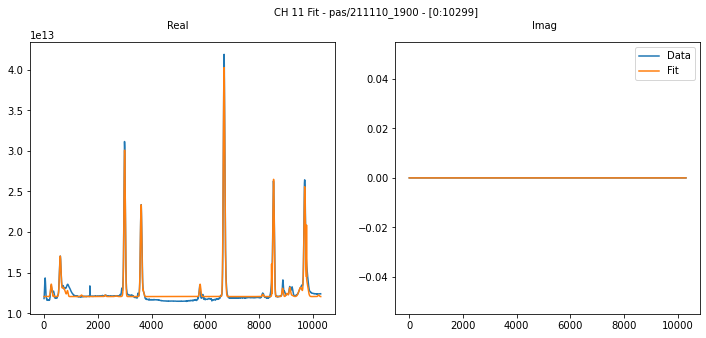

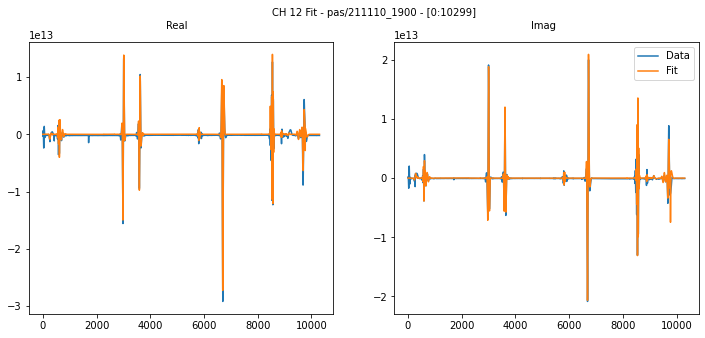

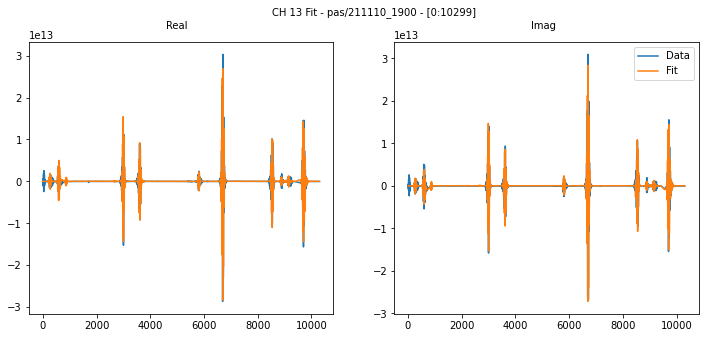

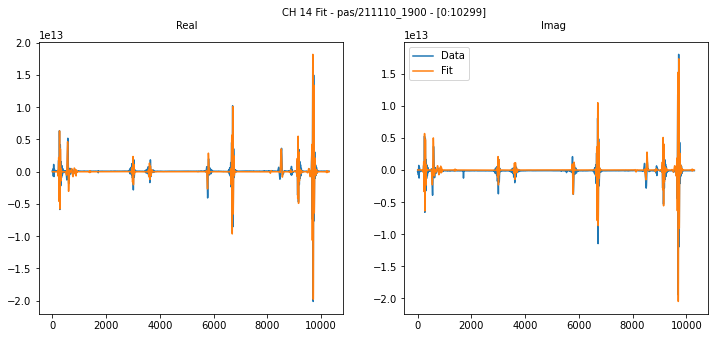

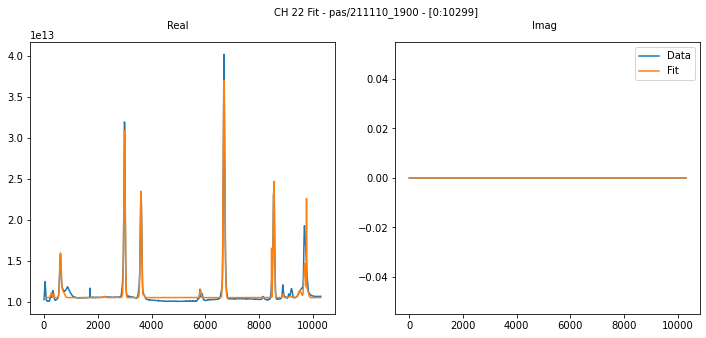

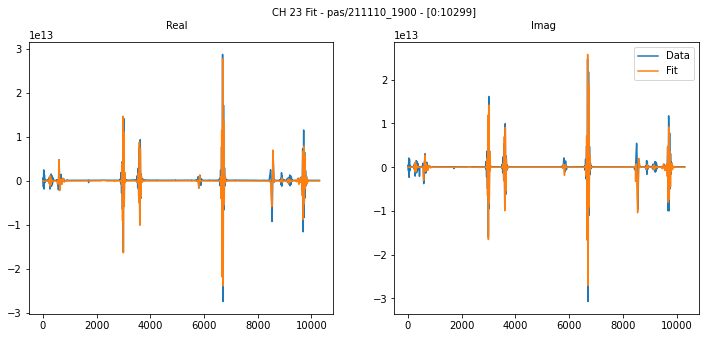

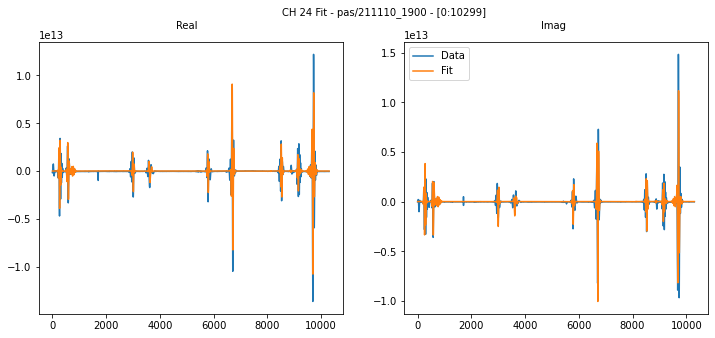

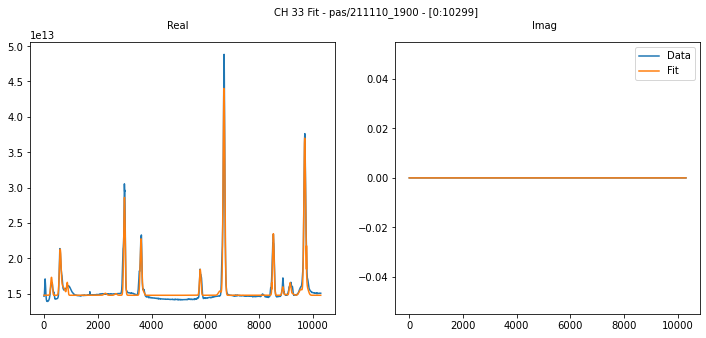

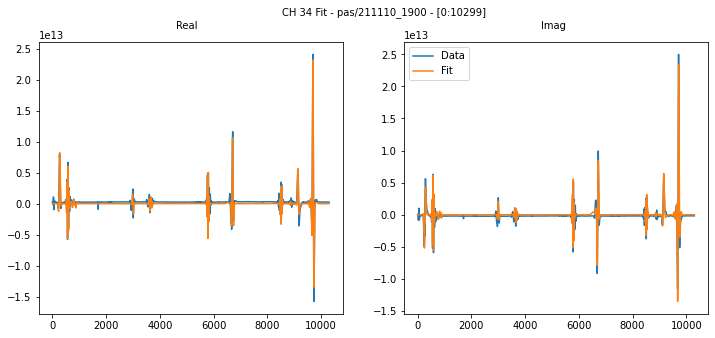

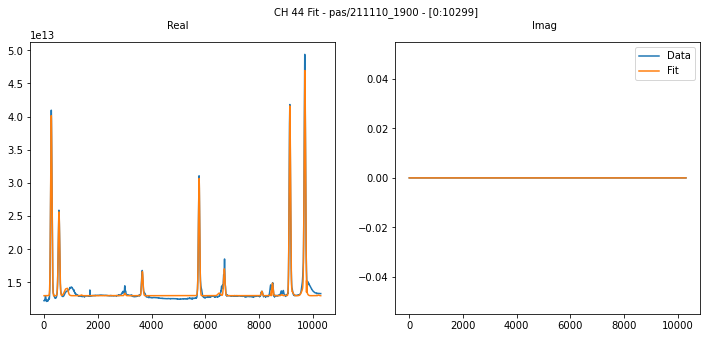

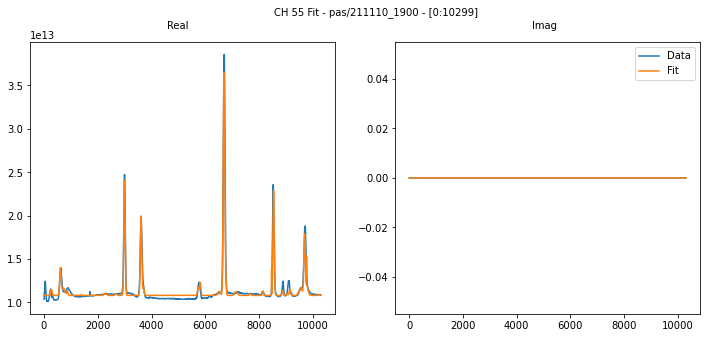

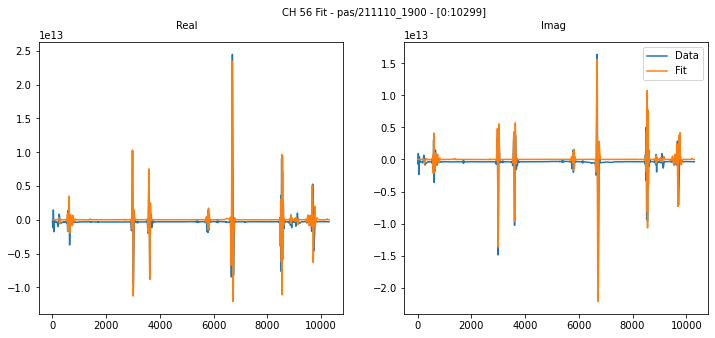

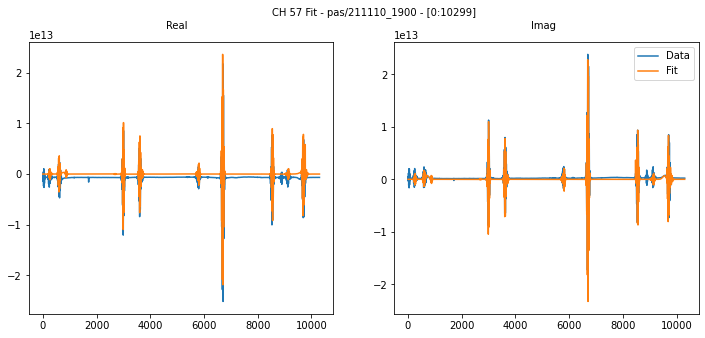

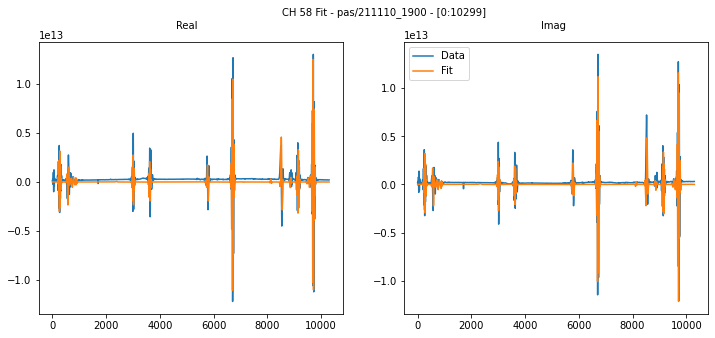

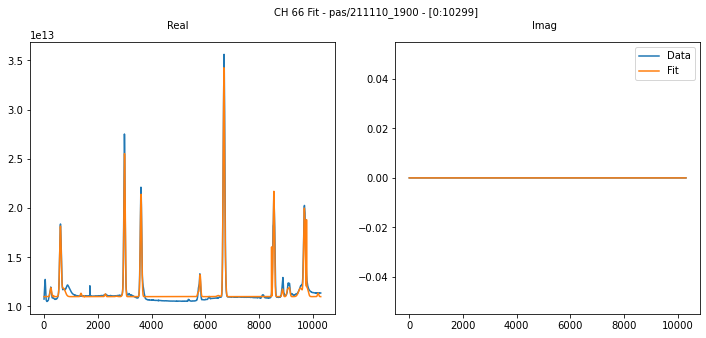

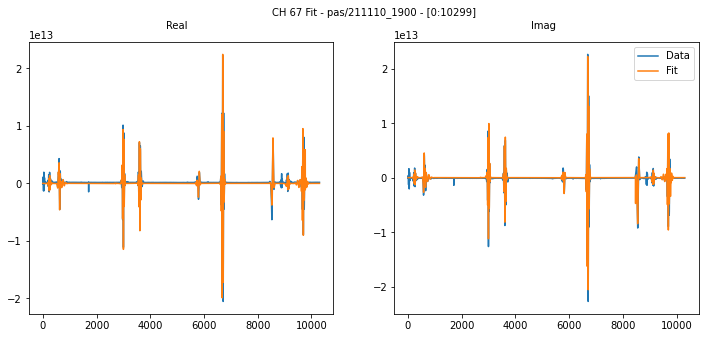

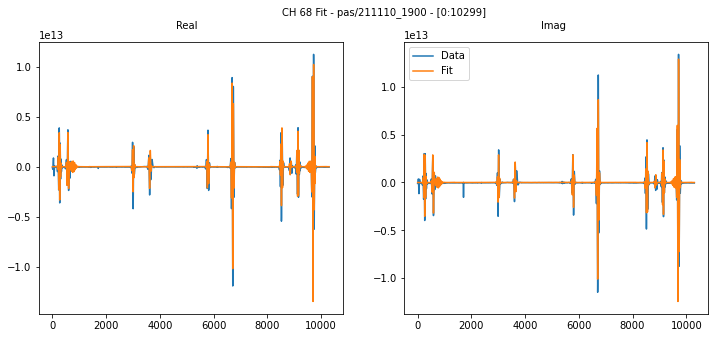

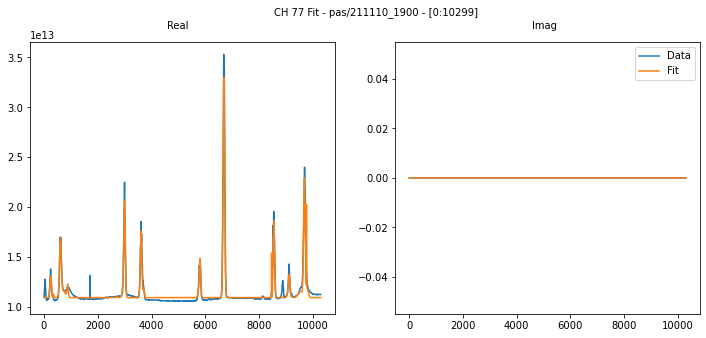

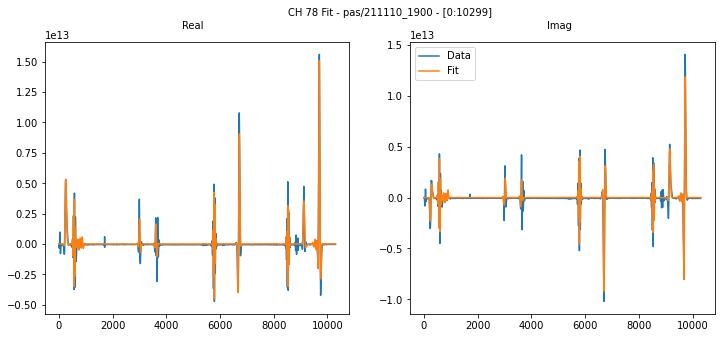

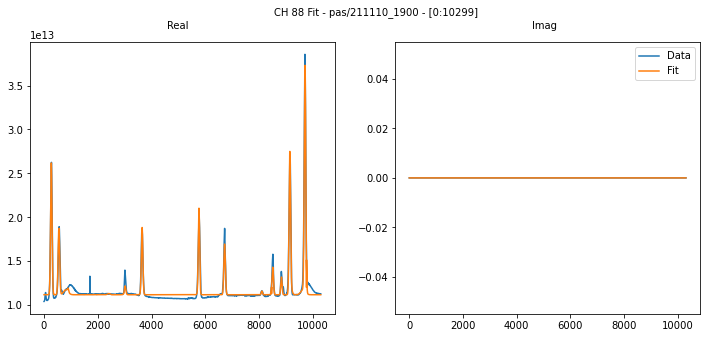

In [3]:
#Loads data and TheoryPredictor class from file in fits folder

fileIn = '15Refit/MEANout.211121_1800Copy.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data
cut=[]
#cut = [0,6500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

fit1210arraydat, fit1210arrayfit=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)



In [4]:
print(fit1210arraydat[0])
#print(fit1210arrayfit)
#print(np.size(fit1210arraydat[0]))

[1.1820159e+13+0.j 1.1843613e+13+0.j 1.1878439e+13+0.j ...
 1.2389090e+13+0.j 1.2389797e+13+0.j 1.2394804e+13+0.j]


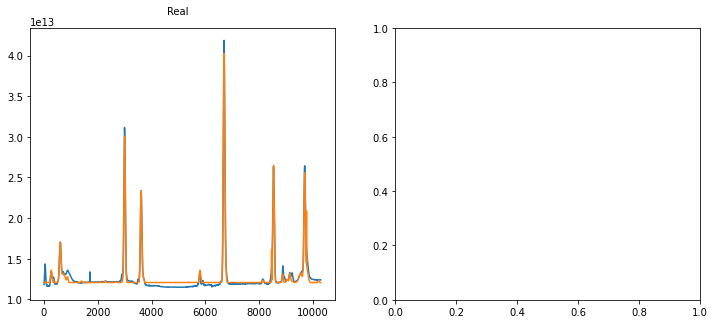

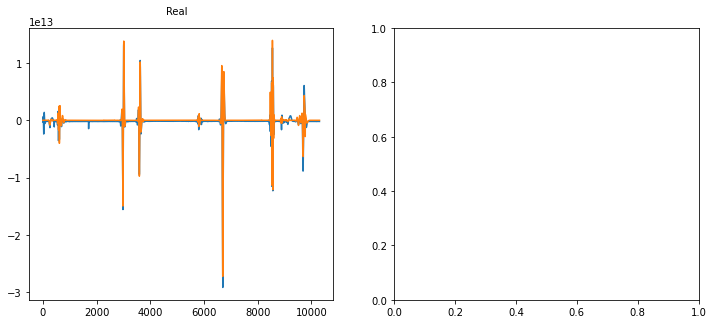

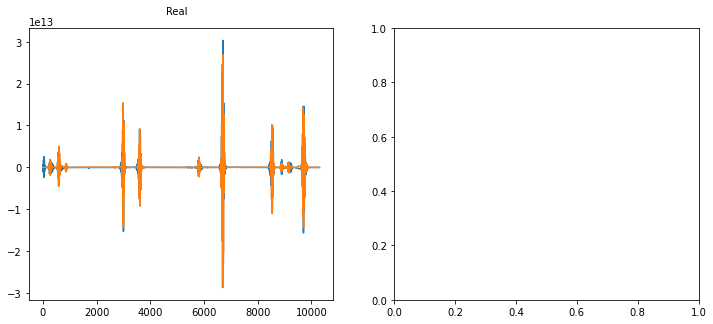

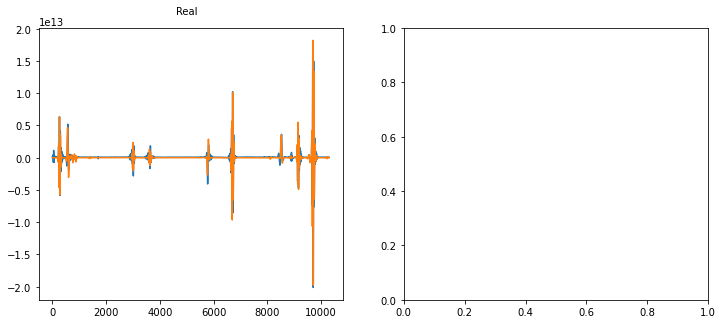

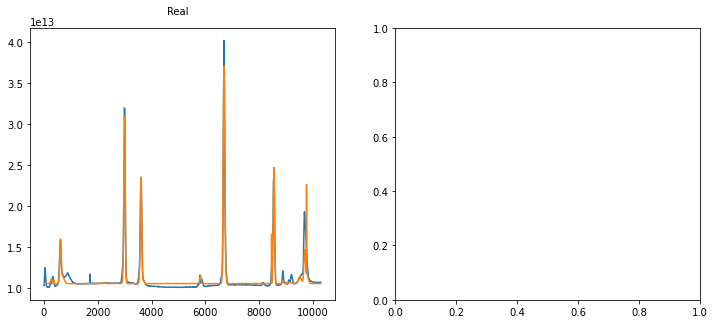

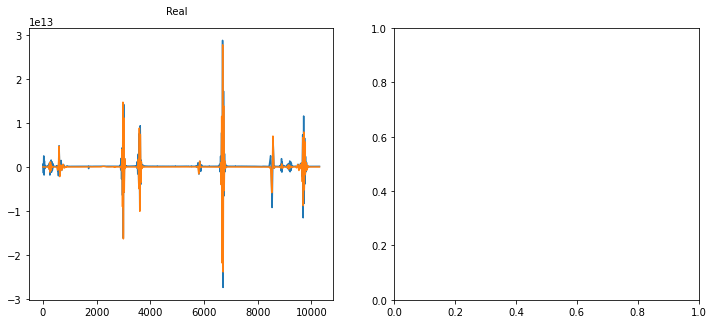

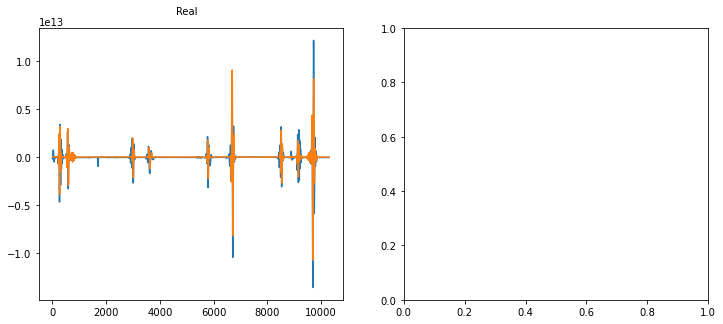

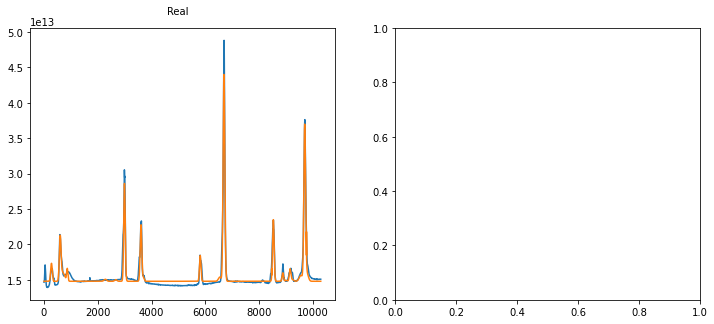

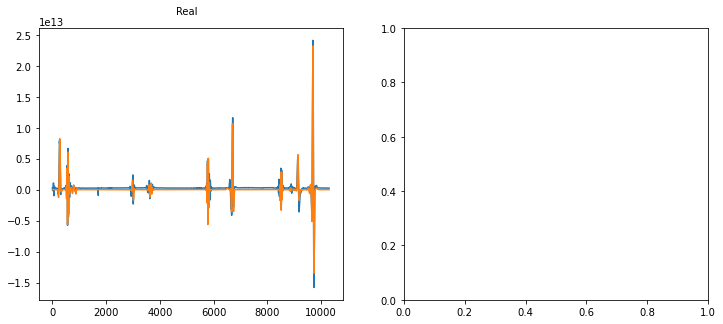

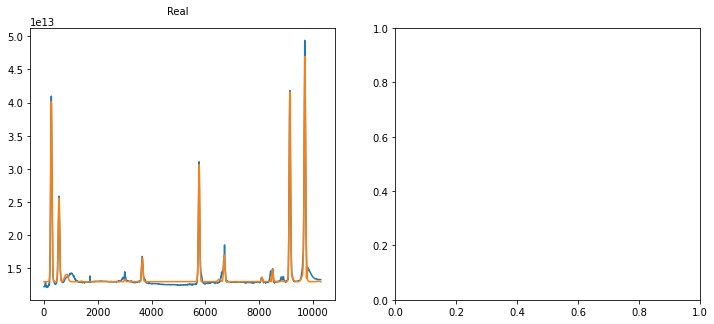

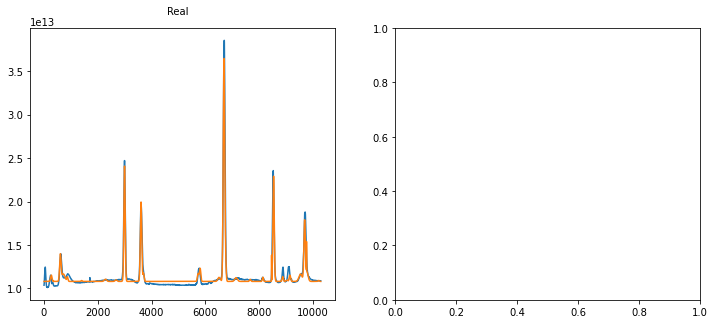

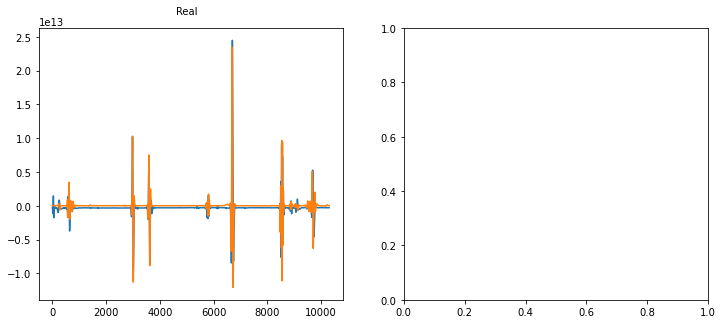

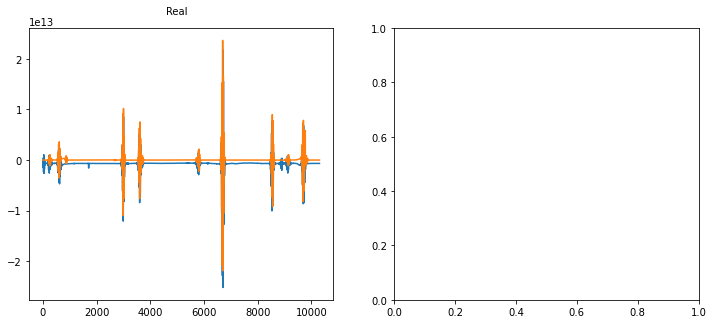

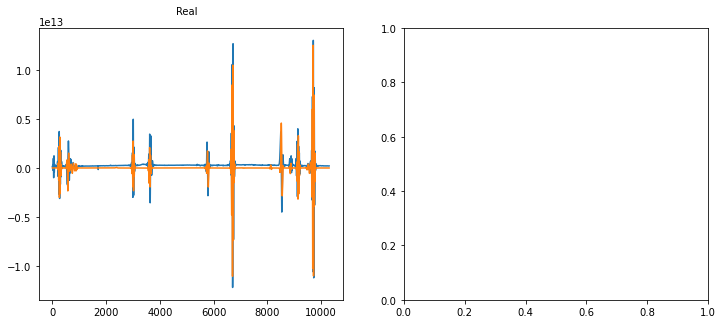

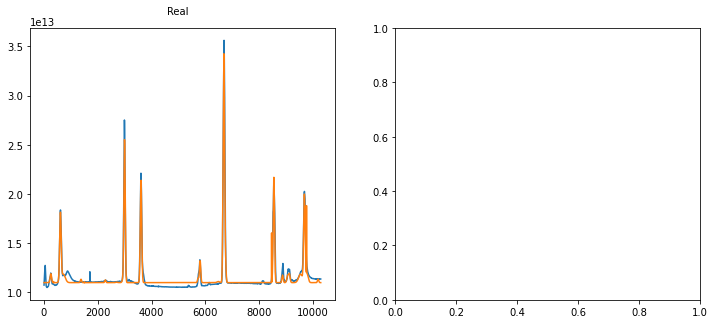

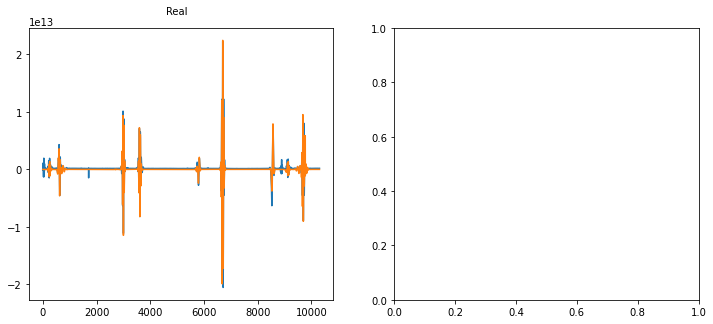

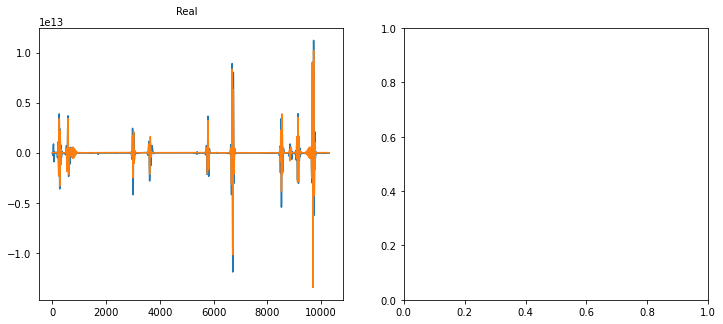

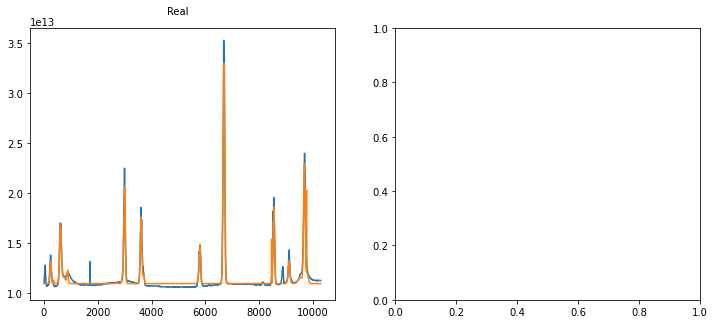

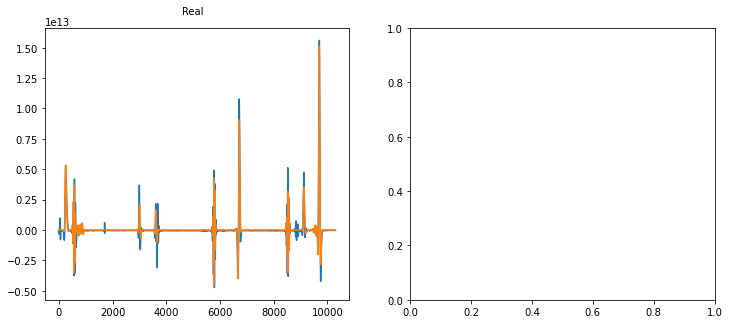

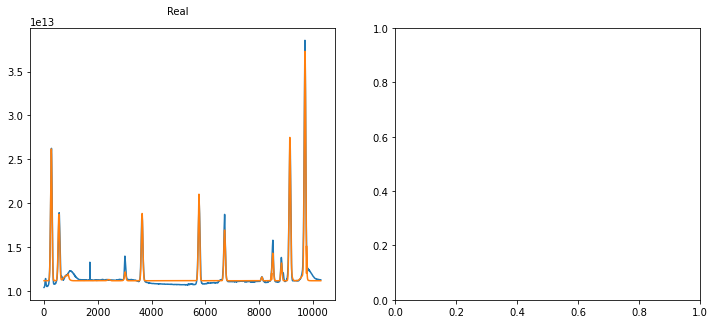

In [5]:
for i in range(len(fit1210arraydat)):
            fig = plt.figure(figsize = (12,5))
            axes = fig.subplots(ncols=2)
            axes[0].plot(fit1210arraydat[i].real,label='Data')
            axes[0].plot(fit1210arrayfit[i].real,label='Fit')
            axes[0].text(0.45,1.05,'Real', transform=axes[0].transAxes)

In [475]:
#fit1210arraydat11=fit1210arraydat[0]
#fit1210arraydat11=fit1210arraydat11.astype('int')
#fit1210arrayfit11=fit1210arrayfit[0]
#fit1210arrayfit11=fit1210arrayfit11.astype('int')

In [74]:
#Convert from complex to int
fit1210arraydat=fit1210arraydat.astype('int')
fit1210arrayfit=fit1210arrayfit.astype('int')
fit1210arraydat = np.array(fit1210arraydat, dtype=np.float64)
fit1210arrayfit = np.array(fit1210arrayfit, dtype=np.float64)

In [75]:
fit1210arraydat

array([[ 2.09926782e+13,  2.10700568e+13,  2.11877049e+13, ...,
         1.21591803e+13,  1.21572006e+13,  1.21556666e+13],
       [ 7.44552976e+12,  7.15258279e+12,  6.80387360e+12, ...,
        -7.82019297e+10, -7.67367578e+10, -7.85259315e+10],
       [-1.41071234e+12, -2.65078764e+10,  1.37806597e+12, ...,
        -3.32076421e+10, -3.10930862e+10, -3.06610156e+10],
       ...,
       [ 1.56280040e+13,  1.58094171e+13,  1.60169114e+13, ...,
         1.14139312e+13,  1.14199070e+13,  1.14156278e+13],
       [-8.93099901e+11, -1.03230649e+12, -1.16990594e+12, ...,
        -8.86261842e+10, -9.20644731e+10, -8.75581194e+10],
       [ 1.17987156e+13,  1.18260037e+13,  1.18453122e+13, ...,
         1.16007046e+13,  1.15999936e+13,  1.15977287e+13]])

In [76]:
#stats.chisquare(fit1210arraydat11,fit1210arrayfit11)

In [77]:
#Chi Square of all 20 in a day
for i in range(len(fit1210arraydat)):
    print(stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i]))

Power_divergenceResult(statistic=794367707095588.2, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=542456571752191.5, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=667465296125185.0, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=333177342790169.1, pvalue=0.0)
Power_divergenceResult(statistic=1656516257035309.0, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=465804838588252.75, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=inf, pvalue=0.0)
Power_divergenceResult(statistic=438800150694059.56, pvalue=0.0)

In [78]:
#Chi Square of all 20 in a day
for i in range(len(fit1210arraydat)):
    a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
    print(a)
    #print(stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i]))

794367707095588.2
inf
inf
inf
542456571752191.5
inf
inf
667465296125185.0
inf
333177342790169.1
1656516257035309.0
inf
inf
inf
465804838588252.75
inf
inf
438800150694059.56
inf
257384140122978.84


In [79]:
fileOut = 'testchioutput.txt'
f = open(fileOut,'w')
for i in range(len(fit1210arraydat)):
    a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
    print(a)
    a=str(a)
    f.write(a + "\n")
f.close()

794367707095588.2
inf
inf
inf
542456571752191.5
inf
inf
667465296125185.0
inf
333177342790169.1
1656516257035309.0
inf
inf
inf
465804838588252.75
inf
inf
438800150694059.56
inf
257384140122978.84


In [80]:
sum((data-expected)**2)/n

NameError: name 'data' is not defined

In [81]:
chitotal=0
chifinal=0
for i in range(len(fit1210arraydat)):
    for j in range(len(fit1210arraydat[i])):
        #a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
        #print(a)
        #a=str(a)
        #f.write(a + "\n")
        chitotal=chitotal+((fit1210arraydat[i][j]-fit1210arrayfit[i][j])**2)
    chifinal=chitotal/len(fit1210arraydat[i])
    print(chifinal)
    chitotal=0
    chifinal=0
#print(len(chifinal))

1.1379077228086815e+24
6.104687139150616e+23
6.329975891548685e+23
4.7208871870703694e+23
8.459394375006481e+23
4.4093322148668124e+23
2.7402597461748216e+23
1.2372729085170804e+24
9.07495637744483e+23
5.1500014160674954e+23
3.1077168554285403e+24
3.173019705750386e+24
2.79428197886815e+24
1.7835423618453672e+24
7.028167851686919e+23
3.276625499815636e+23
3.8601211387580394e+23
6.04881363898223e+23
4.817296368613515e+23
3.4666105428198106e+23


In [82]:
chitotal=0
chifinal=0
#for i in range(len(fit1210arraydat)):
for j in range(len(fit1210arraydat[1])):
    #a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
    #print(a)
    #a=str(a)
    #f.write(a + "\n")
    chitotal=chitotal+((fit1210arraydat[1][j]-fit1210arrayfit[1][j])**2)
chifinal=chitotal/len(fit1210arraydat[1])
print(chifinal)
chitotal=0
chifinal=0
#print(len(chifinal))

6.104687139150616e+23


In [83]:
chitotal=0
chifinal=0
for i in range(len(fit1210arraydat)):
    for j in range(len(fit1210arraydat[i])):
        #a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
        #print(a)
        #a=str(a)
        #f.write(a + "\n")
        chitotal=chitotal+(((fit1210arraydat[i][j]-fit1210arrayfit[i][j])**2)/(fit1210arraydat[i][j])**2)
    chifinal=chitotal/len(fit1210arraydat[i])
    print(chifinal)
    chitotal=0
    chifinal=0
#print(len(chifinal))

0.005883532640406475
190.3464142008907
17129.163727875126
3484.2257586700607
0.0039342235534052
196.0146262264556
126.38522100292965
0.003401523005976433
2140.4610273888334
0.002071216457109596
0.012562196461665138
899.6888593331537
16.620999114753104
29.751802998166376
0.0031165809075988093
116.96979336300356
616.3009795418803
0.0026822987467529564
225.78164987648734
0.0019204886074762823


pas/211210_1700
check2


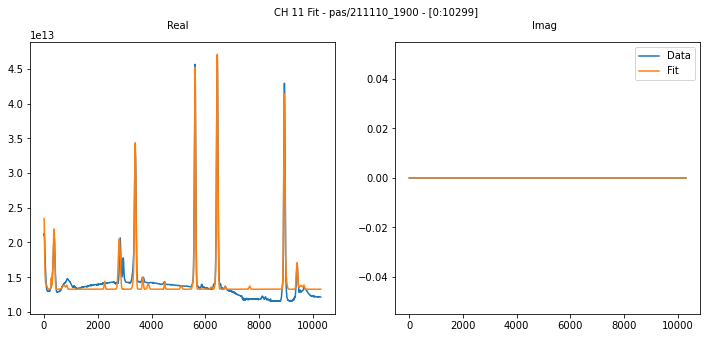

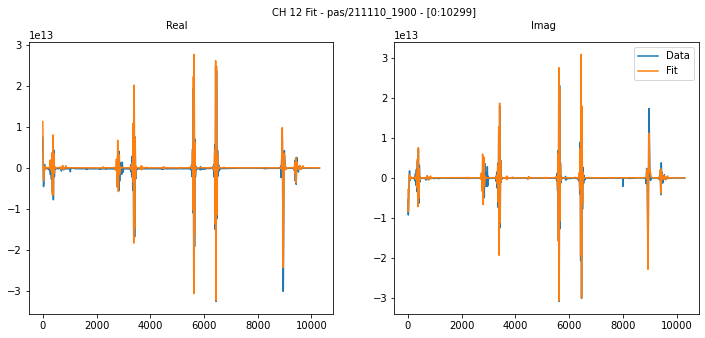

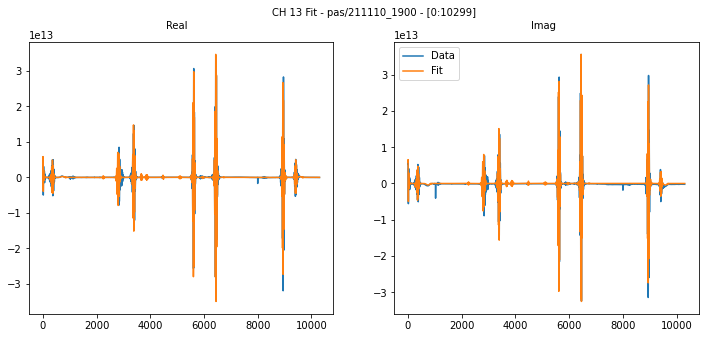

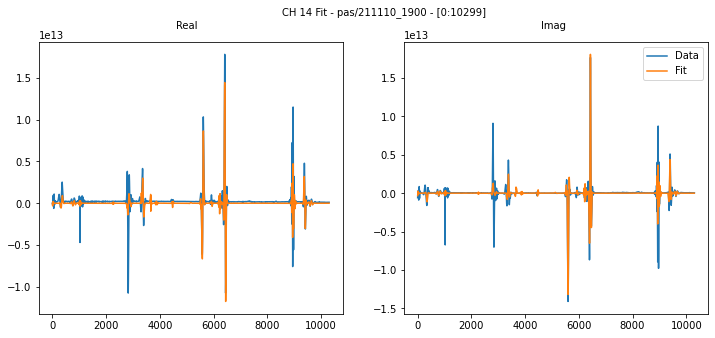

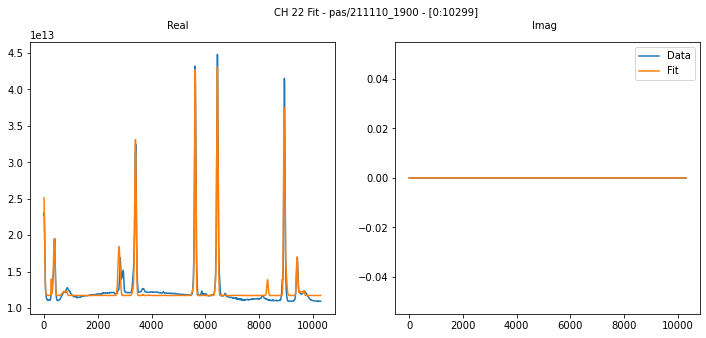

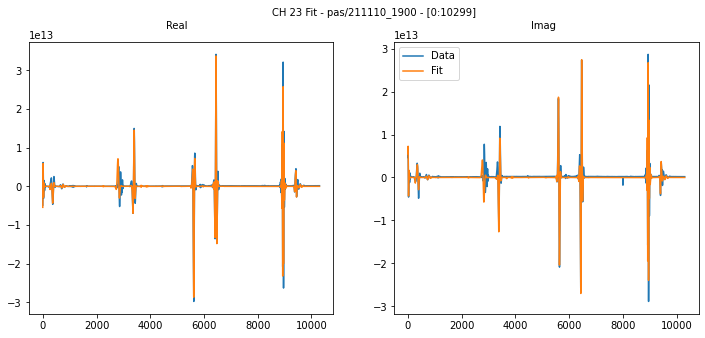

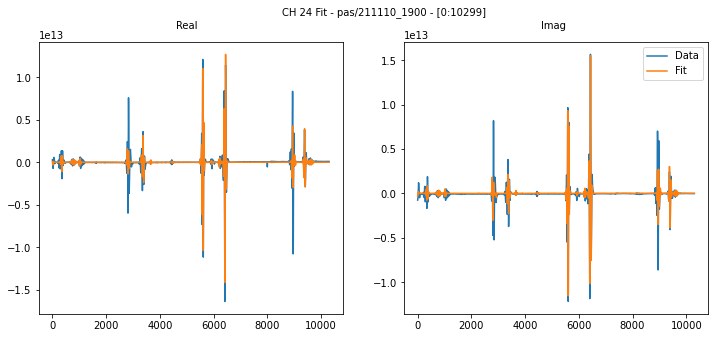

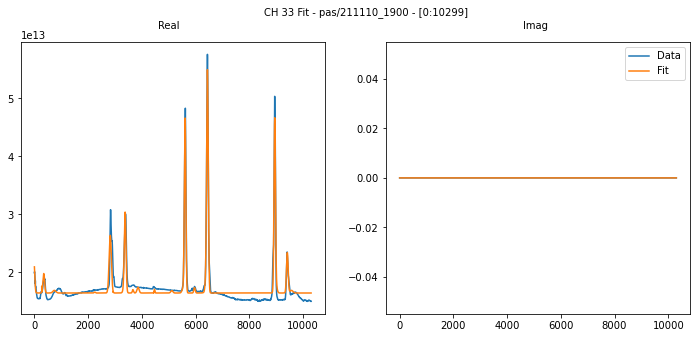

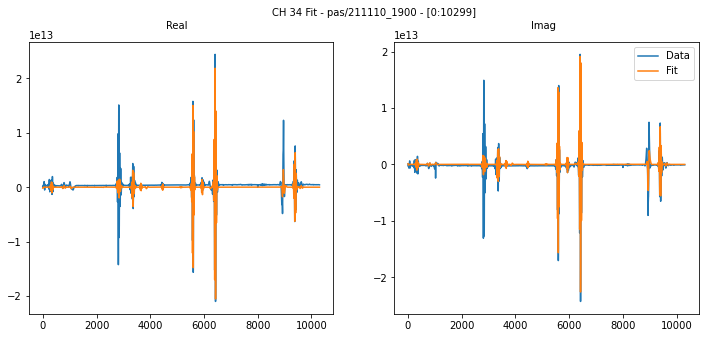

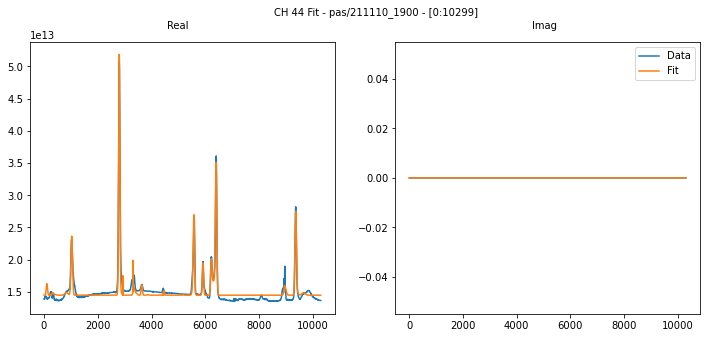

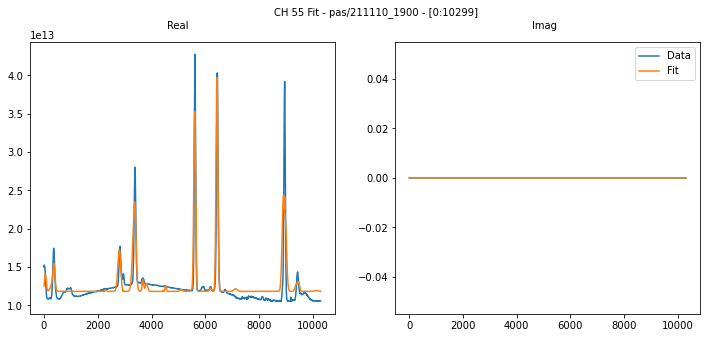

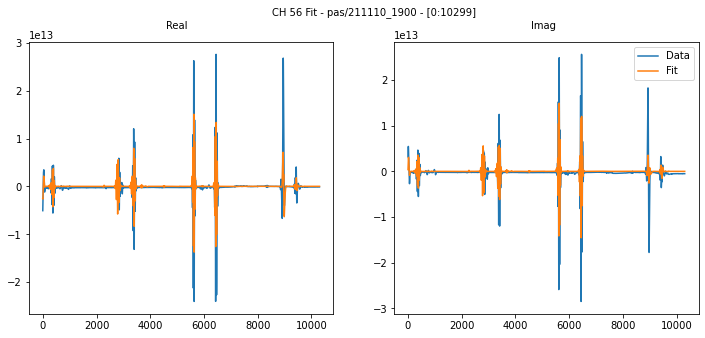

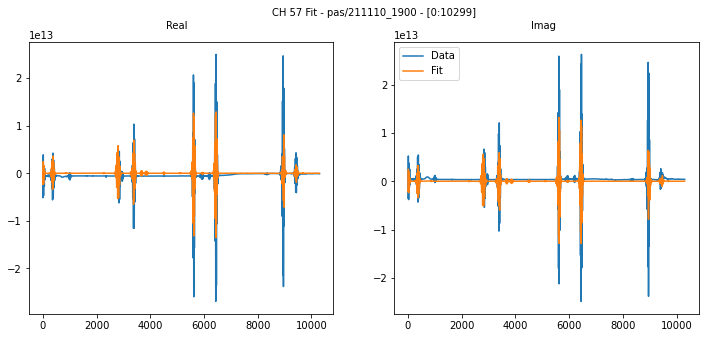

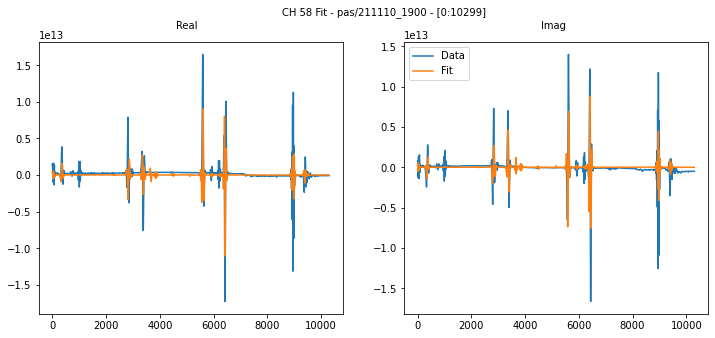

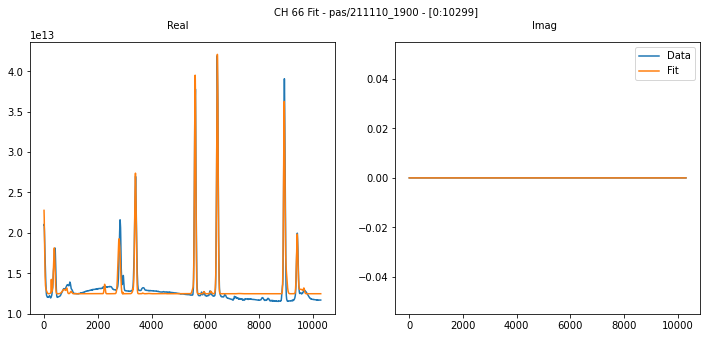

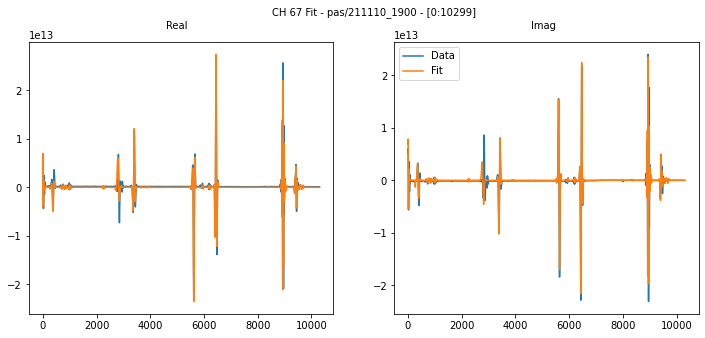

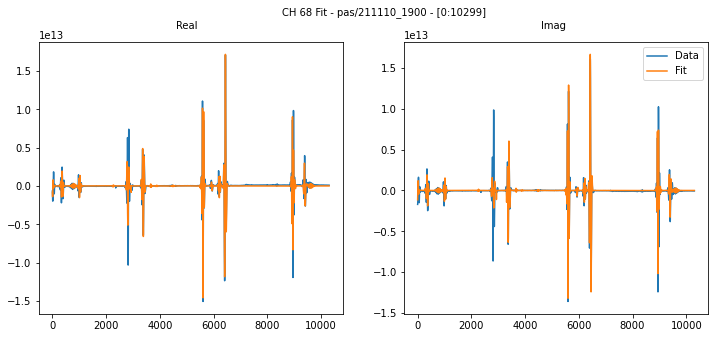

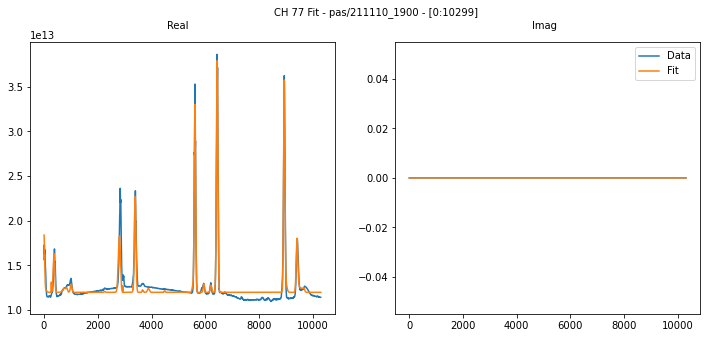

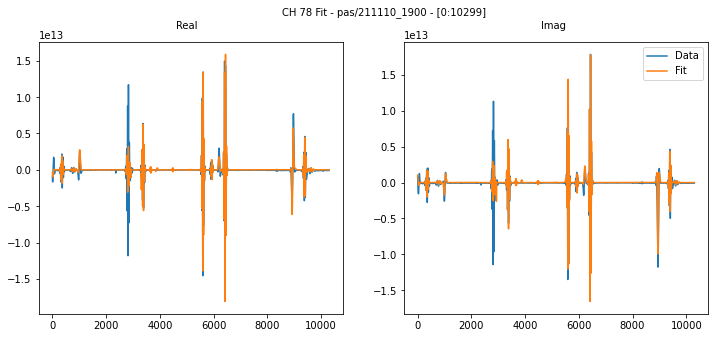

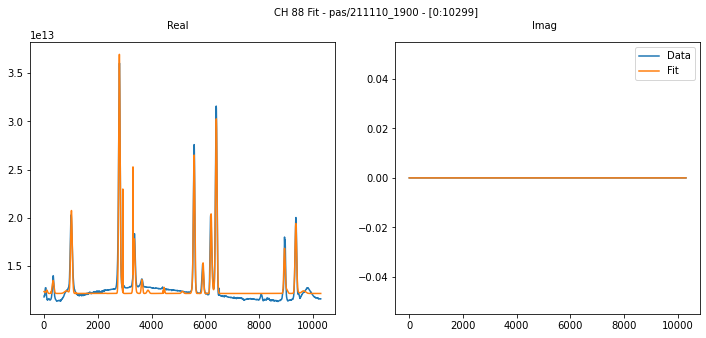

check3
check4
1.1379077228086815e+24


<ipython-input-85-c7d8ad28b3bd>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fitdatearraydat=fitdatearraydat.astype('int')
<ipython-input-85-c7d8ad28b3bd>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  fitdatearrayfit=fitdatearrayfit.astype('int')


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [85]:
#Insert fit code

fileIn = 'fits/211210.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()

exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data

cut = []
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

print("check2")
#Insert code to extract array values

fitdatearraydat, fitdatearrayfit=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)
print("check3")
#print(fitdatearraydat)
#print(fitdatearrayfit)

print("check4")

fitdatearraydat=fitdatearraydat.astype('int')
fitdatearrayfit=fitdatearrayfit.astype('int')
fitdatearraydat = np.array(fitdatearraydat, dtype=np.float64)
fitdatearrayfit = np.array(fitdatearrayfit, dtype=np.float64)


    
fileOut = 'ChiSquared/ChiSquaredout.testone.txt'
f = open(fileOut,'w')
chitotal=0
chifinal=0
for i in range(len(fitdatearraydat)):
    for j in range(len(fitdatearraydat[i])):
        #a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
        #print(a)
        #a=str(a)
        #f.write(a + "\n")
        chitotal=chitotal+((fitdatearraydat[i][j]-fitdatearrayfit[i][j])**2)
    chifinal=chitotal/len(fitdatearraydat[i])
    print(chifinal)
    f.write(chifinal + "\n")
    chitotal=0
    chifinal=0
f.close()   

print("check5")

fileOut = 'ChiSquared/DivChiSquaredout.testtwo.txt'
f = open(fileOut,'w')
chitotal=0
chifinal=0
for i in range(len(fitdatearraydat)):
    for j in range(len(fitdatearraydat[i])):
        #a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
        #print(a)
        #a=str(a)
        #f.write(a + "\n")
        chitotal=chitotal+(((fitdatearraydat[i][j]-fitdatearrayfit[i][j])**2)/(fitdatearraydat[i][j])**2)
    chifinal=chitotal/len(fitdatearraydat[i])
    print(chifinal)
    f.write(chifinal + "\n")
    chitotal=0
    chifinal=0
f.close() 


In [292]:
fitdatearraydat=fitdatearraydat.astype('int')
fitdatearrayfit=fitdatearrayfit.astype('int')
fitdatearraydat = np.array(fitdatearraydat, dtype=np.float64)
fitdatearrayfit = np.array(fitdatearrayfit, dtype=np.float64)


    
fileOut = 'ChiSquared/ChiSquaredout.testone.txt'
f = open(fileOut,'w')
chitotal=0
chifinal=0
for i in range(len(fitdatearraydat)):
    for j in range(len(fitdatearraydat[i])):
        #a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
        #print(a)
        #a=str(a)
        #f.write(a + "\n")
        chitotal=chitotal+((fitdatearraydat[i][j]-fitdatearrayfit[i][j])**2)
    chifinal=chitotal/len(fitdatearraydat[i])
    print(chifinal)
    #print(type(chifinal))
    chifinal=str(chifinal)
    f.write(chifinal + "\n")
    chitotal=0
    chifinal=0
f.close()   

print("check5")

fileOut = 'ChiSquared/DivChiSquaredout.testtwo.txt'
f = open(fileOut,'w')
chitotal=0
chifinal=0
for i in range(len(fitdatearraydat)):
    for j in range(len(fitdatearraydat[i])):
        #a,p=stats.chisquare(fit1210arraydat[i],fit1210arrayfit[i])
        #print(a)
        #a=str(a)
        #f.write(a + "\n")
        chitotal=chitotal+(((fitdatearraydat[i][j]-fitdatearrayfit[i][j])**2)/(fitdatearraydat[i][j])**2)
    chifinal=chitotal/len(fitdatearraydat[i])
    print(chifinal)
    chifinal=str(chifinal)
    f.write(chifinal + "\n")
    chitotal=0
    chifinal=0
f.close() 

1.1379077707812237e+24
6.104687169037492e+23
6.329975868237296e+23
4.720887188314117e+23
8.459394456356507e+23
4.409332180727292e+23
2.740259745723348e+23
1.2372729467539813e+24
9.074956387631683e+23
5.150000948064728e+23
3.1077168842468104e+24
3.1730197035080437e+24
2.794281969065784e+24
1.783542359149192e+24
7.02816805910857e+23
3.2766255154986906e+23
3.8601211370340985e+23
6.048813094375093e+23
4.817296390319119e+23
3.4666107419769676e+23
check5
0.005883533158761115
190.34641683509622
17129.163890542608
3484.2254785314585
0.003934223731749292
196.01462563634297
126.38521818062895
0.0034015230985468266
2140.4611358442903
0.00207121620326955
0.012562196537500177
899.6888226745762
16.620998939933873
29.751803344754933
0.003116581147817562
116.96979081240443
616.3009608962345
0.002682298264938952
225.78164790383937
0.00192048876902101


In [295]:
len(fitdatearraydat[3])

10299

In [127]:
from numpy import loadtxt
lines = loadtxt("ChiSquared/ChiSquaredout.211107_1900.txt", comments="#", delimiter="\n", unpack=False)
print(lines)
type(lines)

[7.17996759e+23 1.45693449e+23 1.07206632e+23 3.88002382e+22
 5.00740986e+23 1.37311363e+23 6.22197473e+22 9.07595778e+23
 1.38173289e+23 6.77625121e+23 6.47127047e+23 2.98935239e+23
 4.26056812e+22 2.10097676e+22 5.65954053e+23 4.42004448e+22
 2.10275375e+22 4.63772656e+23 3.92871012e+23 3.96147287e+23]


numpy.ndarray

In [129]:

#plt.hist(lines, density=True, bins=100)  # density=False would make counts
#plt.ylabel('Probability')
#plt.xlabel('Data');

In [ ]:
len(fit1210arraydat)

In [ ]:
len(fit1210arraydat[i])

In [70]:
type(fit1210arraydat[i][1])

numpy.float64

In [69]:
#fit1210arraydat = np.array(fit1210arraydat, dtype=np.float64)

In [35]:
a,p=stats.chisquare([3,5],[2,4])
print(a,p)

0.75 0.3864762307712325


In [33]:
stats.chisquare([3,5])

Power_divergenceResult(statistic=0.5, pvalue=0.47950012218695337)

pas/211210_1700


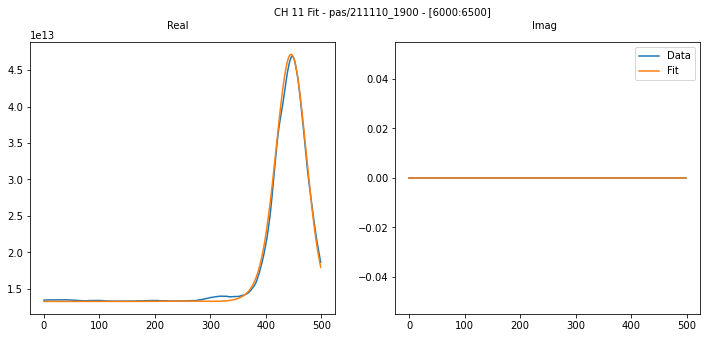

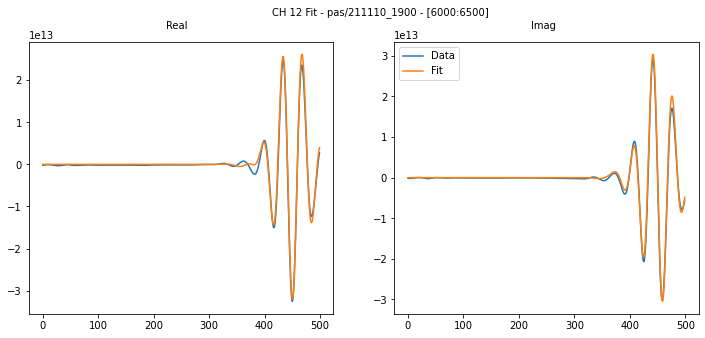

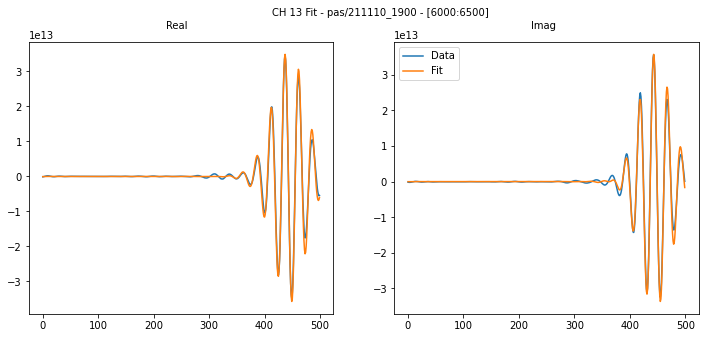

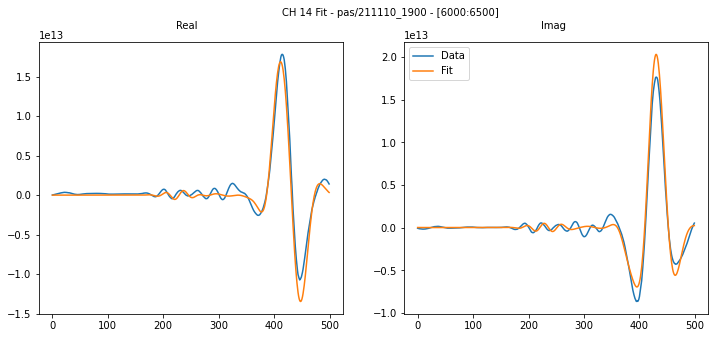

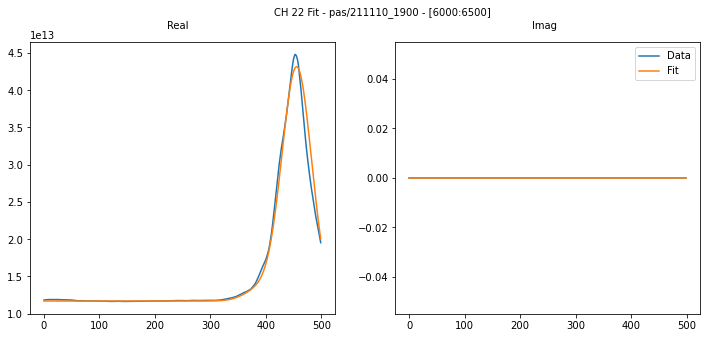

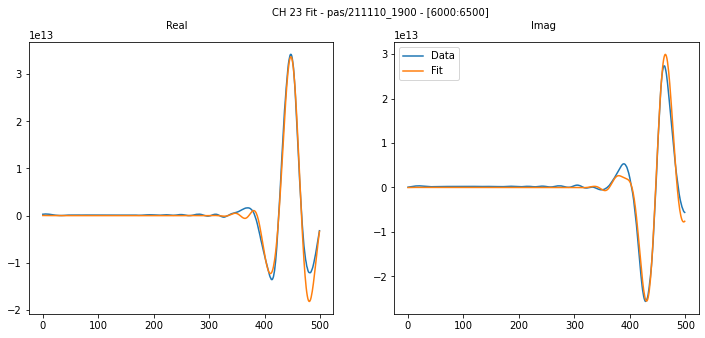

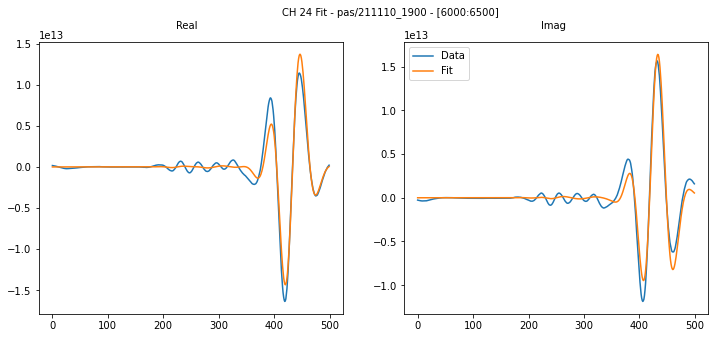

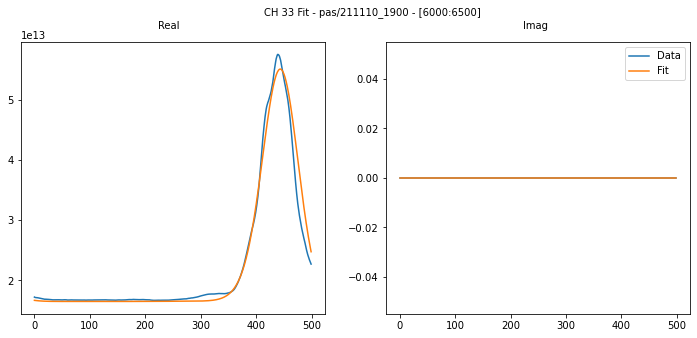

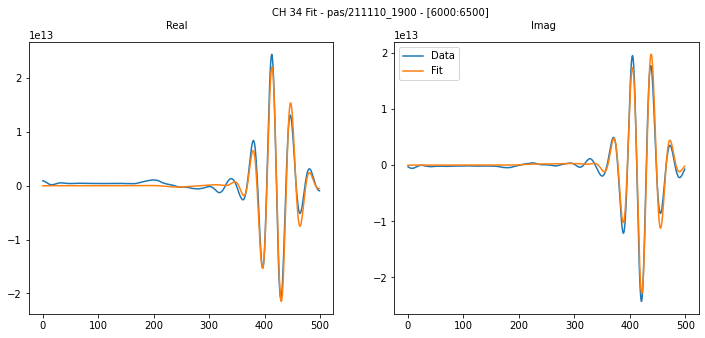

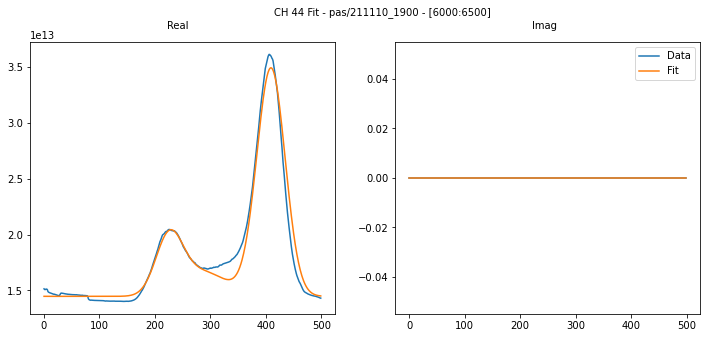

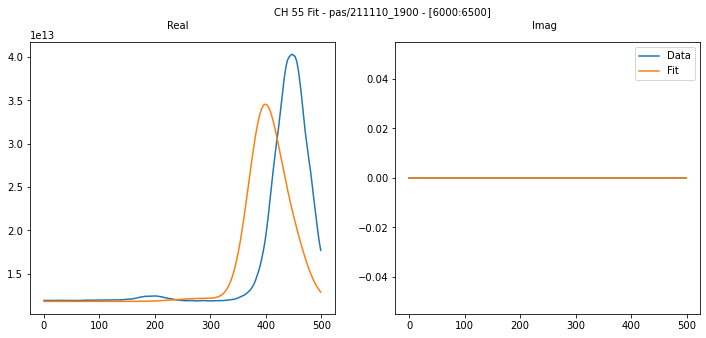

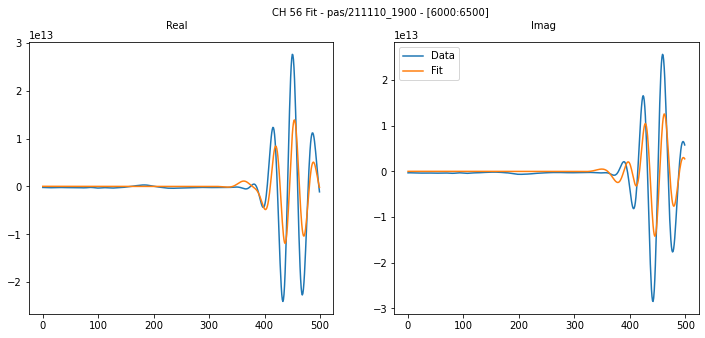

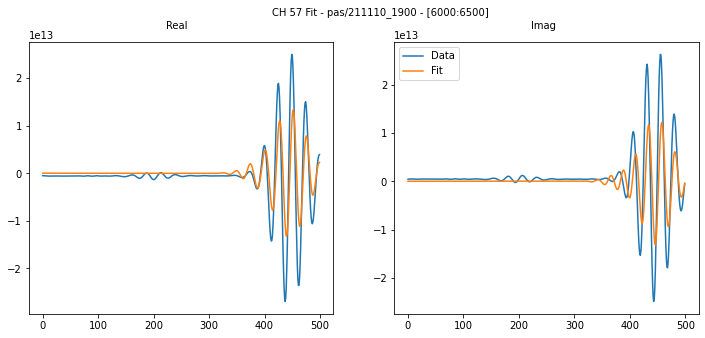

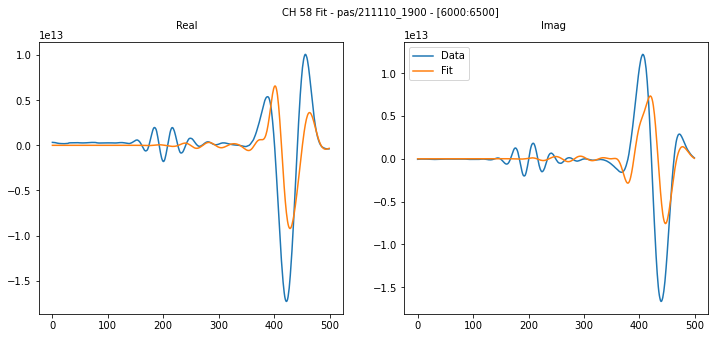

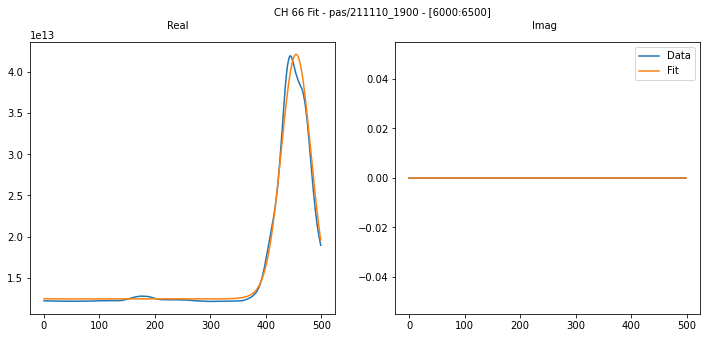

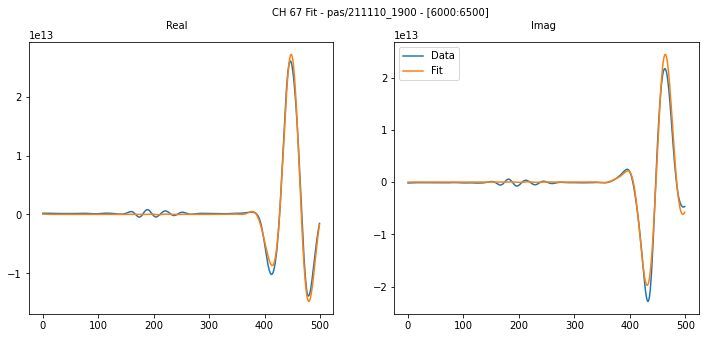

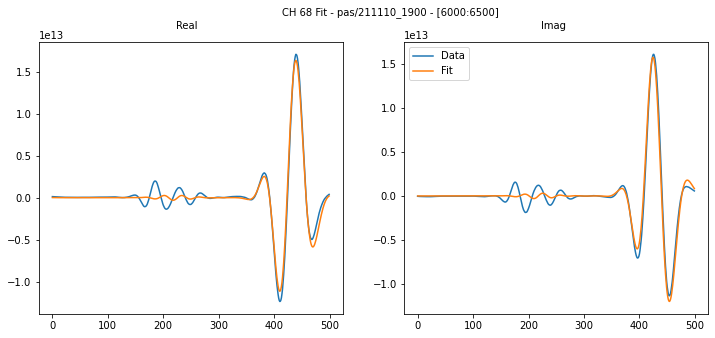

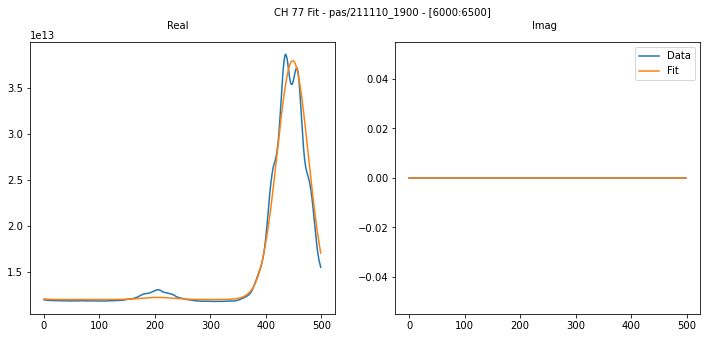

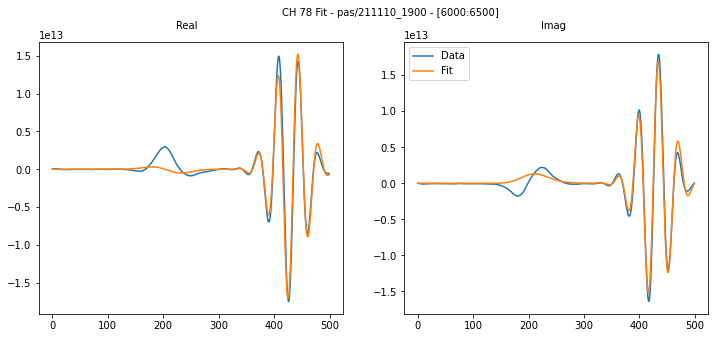

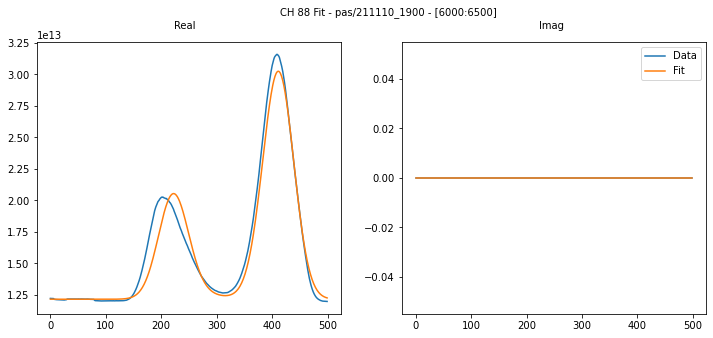

In [26]:
#Loads data and TheoryPredictor class from file in fits folder

fileIn = 'fits/211210-Copy1.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data

cut = [6000,6500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

fit1210meanarray=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)



In [27]:
fit1210meanarray

array([[ 1.32788948e+13+0.00000000e+00j,  1.32783036e+13+0.00000000e+00j,
         1.32777544e+13+0.00000000e+00j, ...,
         1.87093841e+13+0.00000000e+00j,  1.83299235e+13+0.00000000e+00j,
         1.79702619e+13+0.00000000e+00j],
       [-1.85075238e+09-6.54209028e+09j, -5.11676851e+08-6.22081551e+09j,
         6.36402029e+08-5.68402487e+09j, ...,
         2.34291965e+12-6.76107775e+12j,  3.25704247e+12-5.85535626e+12j,
         3.94734861e+12-4.86510448e+12j],
       [-2.99769919e+10-1.75833539e+10j, -2.17489463e+10-2.35792159e+10j,
        -1.28483715e+10-2.66217715e+10j, ...,
        -6.85607246e+12+1.77230582e+12j, -6.64690651e+12-5.07606367e+10j,
        -6.00854655e+12-1.65228204e+12j],
       ...,
       [ 1.20393625e+13+0.00000000e+00j,  1.20328074e+13+0.00000000e+00j,
         1.20267407e+13+0.00000000e+00j, ...,
         1.77227118e+13+0.00000000e+00j,  1.73689348e+13+0.00000000e+00j,
         1.70301557e+13+0.00000000e+00j],
       [ 1.67551574e+10-8.44303488e+09j,  1.

In [31]:
np.set_printoptions(precision=3)
x=fit1210array-fit1210meanarray
x

array([[-1.570e+09+0.000e+00j, -1.492e+09+0.000e+00j,
        -1.414e+09+0.000e+00j, ..., -1.119e+12+0.000e+00j,
        -1.083e+12+0.000e+00j, -1.046e+12+0.000e+00j],
       [ 9.668e+08+2.345e+09j,  4.540e+08+2.350e+09j,
        -2.004e+07+2.252e+09j, ..., -8.545e+11+1.713e+12j,
        -1.096e+12+1.491e+12j, -1.286e+12+1.238e+12j],
       [ 1.352e+09-6.098e+09j,  2.905e+09-4.921e+09j,
         3.920e+09-3.445e+09j, ...,  1.814e+12-4.730e+11j,
         1.808e+12+9.537e+09j,  1.678e+12+4.567e+11j],
       ...,
       [-4.971e+09+0.000e+00j, -4.805e+09+0.000e+00j,
        -4.626e+09+0.000e+00j, ..., -1.982e+12+0.000e+00j,
        -1.897e+12+0.000e+00j, -1.812e+12+0.000e+00j],
       [-5.698e+09-1.762e+10j, -7.759e+09-1.450e+10j,
        -9.051e+09-1.143e+10j, ...,  4.223e+10-3.814e+10j,
         3.342e+10-4.099e+10j,  2.487e+10-4.225e+10j],
       [ 7.025e+09+0.000e+00j,  6.178e+09+0.000e+00j,
         5.422e+09+0.000e+00j, ...,  5.586e+10+0.000e+00j,
         5.106e+10+0.000e+00j,  4.6

/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


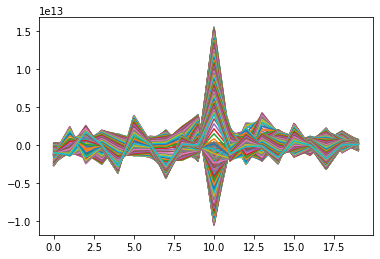

In [36]:
plt.plot(x);

# Historgrams of Chi Squared

In [130]:
import glob

In [146]:
ChiArrayText=glob.glob('ChiSquared/Chi*')

type(ChiArrayText)

list

In [296]:
from numpy import loadtxt

ChiArray = []
for file in ChiArrayText:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArray.append(startData)
ChiArray = np.array(ChiArray)

ChiArray

array([[3.57213564e+23, 2.69238962e+23, 2.31478826e+23, ...,
        5.14385054e+24, 1.64508998e+23, 1.82572305e+23],
       [3.62041187e+23, 2.68039550e+23, 1.92323937e+23, ...,
        3.99205092e+23, 1.96886506e+23, 2.51751628e+23],
       [1.13790751e+24, 6.10468714e+23, 6.32997589e+23, ...,
        6.04881364e+23, 4.81729636e+23, 3.46661054e+23],
       ...,
       [5.31210976e+24, 1.85591354e+24, 1.98408365e+24, ...,
        1.66253763e+24, 3.99940334e+23, 4.75978137e+23],
       [3.46073116e+24, 1.46200157e+24, 1.32668278e+24, ...,
        1.21302791e+24, 7.15991926e+23, 7.66412670e+23],
       [9.60048589e+23, 6.19410518e+23, 7.70955511e+23, ...,
        6.32261856e+23, 5.86549805e+23, 4.47204580e+23]])

In [297]:
len(ChiArray)

60

In [298]:
ChiArray[0]

array([3.57213564e+23, 2.69238962e+23, 2.31478826e+23, 1.73111323e+23,
       1.45499089e+24, 1.75521912e+23, 1.04760274e+23, 5.79529633e+23,
       2.79997718e+23, 3.07623102e+23, 1.22151728e+24, 6.11431968e+23,
       1.34817981e+24, 7.77502263e+23, 3.85486757e+23, 1.73941512e+23,
       1.29519778e+23, 5.14385054e+24, 1.64508998e+23, 1.82572305e+23])

In [299]:
Channel11=[]
Channel12=[]
Channel13=[]
Channel14=[]
Channel22=[]
Channel23=[]
Channel24=[]
Channel33=[]
Channel34=[]
Channel44=[]

Channel55=[]
Channel56=[]
Channel57=[]
Channel58=[]
Channel66=[]
Channel67=[]
Channel68=[]
Channel77=[]
Channel78=[]
Channel88=[]

for i in range(len(ChiArray)):
    Channel11.append(ChiArray[i][0])
    Channel12.append(ChiArray[i][1])
    Channel13.append(ChiArray[i][2])
    Channel14.append(ChiArray[i][3])
    Channel22.append(ChiArray[i][4])
    Channel23.append(ChiArray[i][5])
    Channel24.append(ChiArray[i][6])
    Channel33.append(ChiArray[i][7])
    Channel34.append(ChiArray[i][8])
    Channel44.append(ChiArray[i][9])
    
    Channel55.append(ChiArray[i][10])
    Channel56.append(ChiArray[i][11])
    Channel57.append(ChiArray[i][12])
    Channel58.append(ChiArray[i][13])
    Channel66.append(ChiArray[i][14])
    Channel67.append(ChiArray[i][15])
    Channel68.append(ChiArray[i][16])
    Channel77.append(ChiArray[i][17])
    Channel78.append(ChiArray[i][18])
    Channel88.append(ChiArray[i][19])
AllChannel=[Channel11,Channel12,Channel13,Channel14,Channel22,Channel23,Channel24,Channel33,Channel34,Channel44,Channel55,Channel56,Channel57,Channel58,Channel66,Channel67,Channel68,Channel77,Channel78,Channel88]
AllChannelText=['Channel11','Channel12','Channel13','Channel14','Channel22','Channel23','Channel24','Channel33','Channel34','Channel44','Channel55','Channel56','Channel57','Channel58','Channel66','Channel67','Channel68','Channel77','Channel78','Channel88']

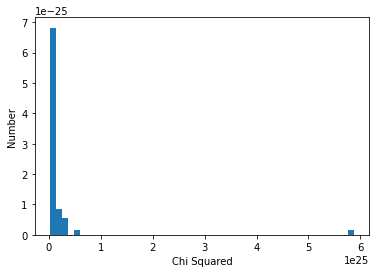

In [300]:
plt.hist(Channel11, density=True, bins=50)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Chi Squared');

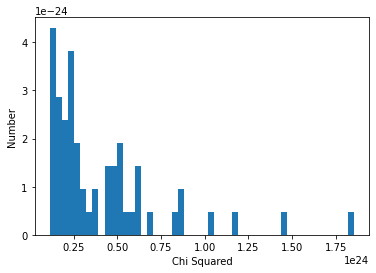

In [301]:
plt.hist(Channel12, density=True, bins=50)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Chi Squared');

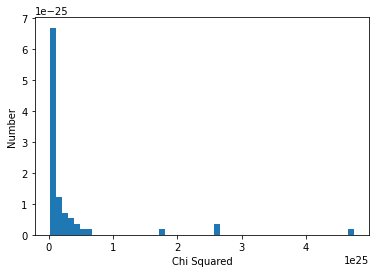

In [302]:
plt.hist(Channel55, density=True, bins=50)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Chi Squared');

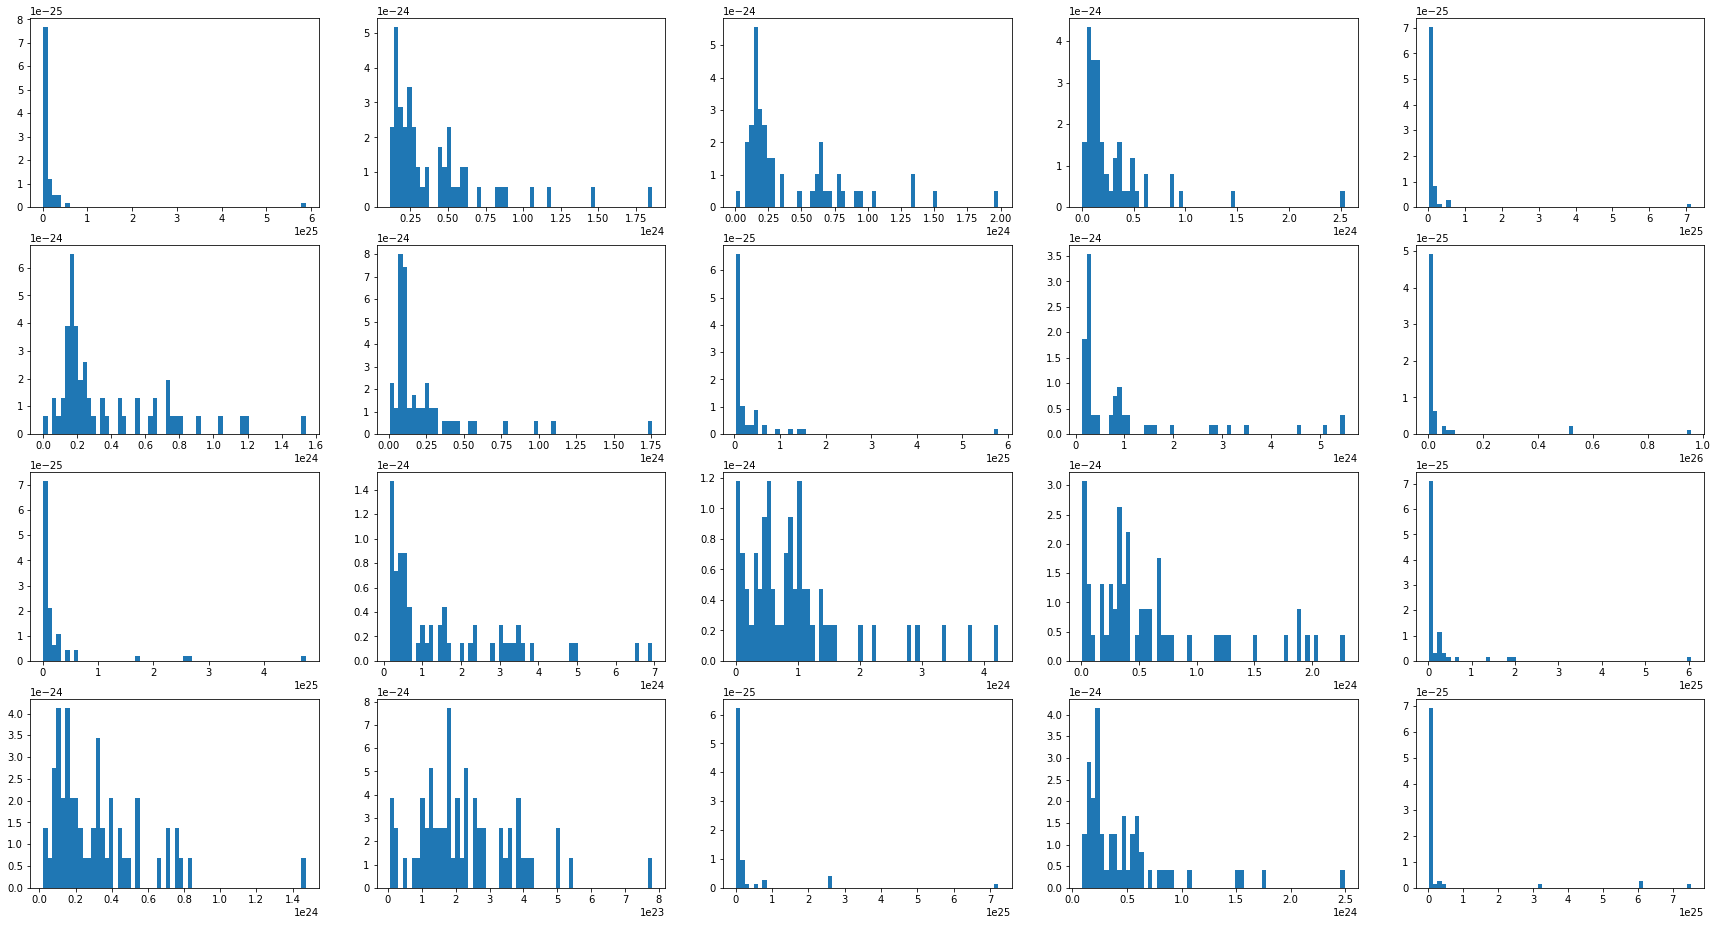

In [246]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist(AllChannel[count], density=True, bins=60)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

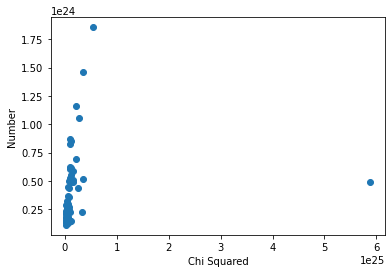

In [247]:
plt.plot(Channel11,Channel12, 'o')  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Chi Squared');

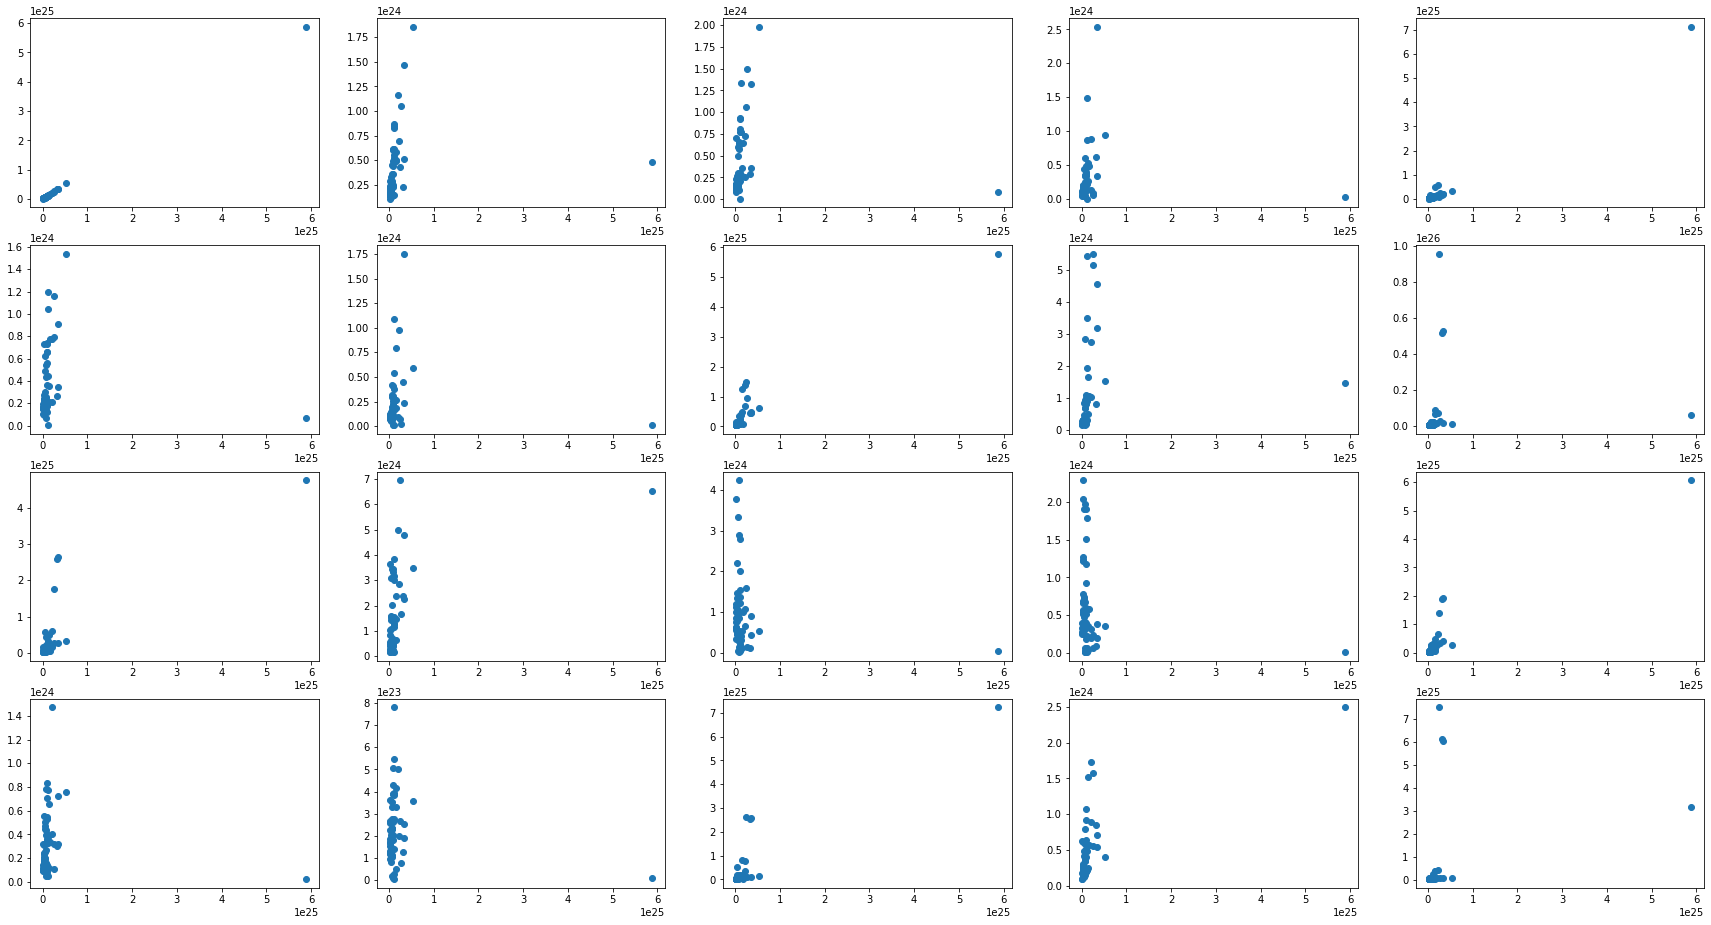

In [308]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].plot(Channel11,AllChannel[count], 'o')
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

### Test code to deem thresholds

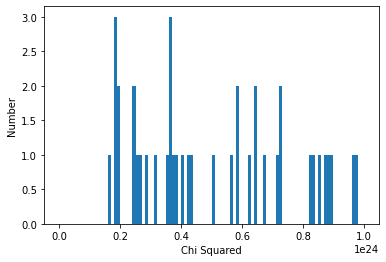

In [257]:
plt.hist(Channel11, range=[0,1e24], density=False, bins=100)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Chi Squared');

In [250]:
len(Channel11)

60

In [304]:
#Channel88.sort()
Channel11

[3.572135638178996e+23,
 3.6204118697601626e+23,
 1.137907507818988e+24,
 4.226963500310105e+23,
 1.0234935280174368e+24,
 4.013230872542622e+23,
 3.871877651066694e+23,
 1.9575353511347576e+23,
 8.962901761252634e+23,
 2.6644658991154495e+23,
 8.363528285580736e+23,
 4.361103827879586e+23,
 2.508162581525711e+23,
 6.446150453798332e+23,
 1.6302342772681737e+23,
 1.4862205134580805e+24,
 6.41908422045736e+23,
 1.1556921949299542e+24,
 2.4036507887701732e+23,
 8.752225388678265e+23,
 3.670040783262626e+23,
 1.977847785370864e+23,
 1.6259504512004387e+24,
 3.1970951568289965e+23,
 6.789346067907809e+23,
 3.734185687560399e+23,
 5.882504665564067e+23,
 9.766080335733103e+23,
 1.8681628055459648e+23,
 1.1686374666891277e+24,
 1.0226700256363235e+24,
 3.2449409348708046e+24,
 1.0340768046948066e+24,
 2.639953922794688e+24,
 1.2138406822211889e+24,
 2.1945728248780624e+24,
 7.280737859990553e+23,
 6.273832287059774e+23,
 5.881892433441073e+25,
 1.0901721354403455e+24,
 2.463570364396006e+23,

## Second Chi Squared Equation

In [222]:
ChiArray2Text=glob.glob('ChiSquared/Div*')

type(ChiArray2Text)

list

In [223]:
ChiArray2 = []
for file in ChiArray2Text:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArray2.append(startData)
ChiArray2 = np.array(ChiArray2)

ChiArray2

array([[2.31317345e-03, 1.51281380e+02, 6.95940435e+02, ...,
        1.91404808e-03, 2.50050226e+01, 1.32802226e-03],
       [5.39712757e-03, 2.66264893e+02, 7.68517767e+00, ...,
        7.38143989e-03, 5.34574797e+01, 4.82858090e-03],
       [3.12098968e-03, 9.30291466e+02, 3.95638557e+01, ...,
        3.74403730e-03, 7.33559448e+03, 2.18450404e-03],
       ...,
       [8.96615469e-04, 3.21503109e+01, 6.20839473e+03, ...,
        8.67841017e-04, 1.95962305e+02, 1.00474120e-03],
       [4.73468447e-03, 1.14590397e+04, 2.92031708e+05, ...,
        3.29089908e-03, 3.87695960e+01, 2.22557572e-03],
       [2.68527133e-03, 1.55929459e+04, 5.18492300e+02, ...,
        2.46390332e-03, 2.06859525e+02, 1.68587843e-03]])

In [277]:
Channel11v2=[]
Channel12v2=[]
Channel13v2=[]
Channel14v2=[]
Channel22v2=[]
Channel23v2=[]
Channel24v2=[]
Channel33v2=[]
Channel34v2=[]
Channel44v2=[]

Channel55v2=[]
Channel56v2=[]
Channel57v2=[]
Channel58v2=[]
Channel66v2=[]
Channel67v2=[]
Channel68v2=[]
Channel77v2=[]
Channel78v2=[]
Channel88v2=[]

for i in range(len(ChiArray2)):
    Channel11v2.append(ChiArray2[i][0])
    Channel12v2.append(ChiArray2[i][1])
    Channel13v2.append(ChiArray2[i][2])
    Channel14v2.append(ChiArray2[i][3])
    Channel22v2.append(ChiArray2[i][4])
    Channel23v2.append(ChiArray2[i][5])
    Channel24v2.append(ChiArray2[i][6])
    Channel33v2.append(ChiArray2[i][7])
    Channel34v2.append(ChiArray2[i][8])
    Channel44v2.append(ChiArray2[i][9])
    
    Channel55v2.append(ChiArray2[i][10])
    Channel56v2.append(ChiArray2[i][11])
    Channel57v2.append(ChiArray2[i][12])
    Channel58v2.append(ChiArray2[i][13])
    Channel66v2.append(ChiArray2[i][14])
    Channel67v2.append(ChiArray2[i][15])
    Channel68v2.append(ChiArray2[i][16])
    Channel77v2.append(ChiArray2[i][17])
    Channel78v2.append(ChiArray2[i][18])
    Channel88v2.append(ChiArray2[i][19])
AllChannel2=[Channel11v2,Channel12v2,Channel13v2,Channel14v2,Channel22v2,Channel23v2,Channel24v2,Channel33v2,Channel34v2,Channel44v2,Channel55v2,Channel56v2,Channel57v2,Channel58v2,Channel66v2,Channel67v2,Channel68v2,Channel77v2,Channel78v2,Channel88v2]
AllChannelText2=['Channel11v2','Channel12v2','Channel13v2','Channel14v2','Channel22v2','Channel23v2','Channel24v2','Channel33v2','Channel34v2','Channel44v2','Channel55v2','Channel56v2','Channel57v2','Channel58v2','Channel66v2','Channel67v2','Channel68v2','Channel77v2','Channel78v2','Channel88v2']

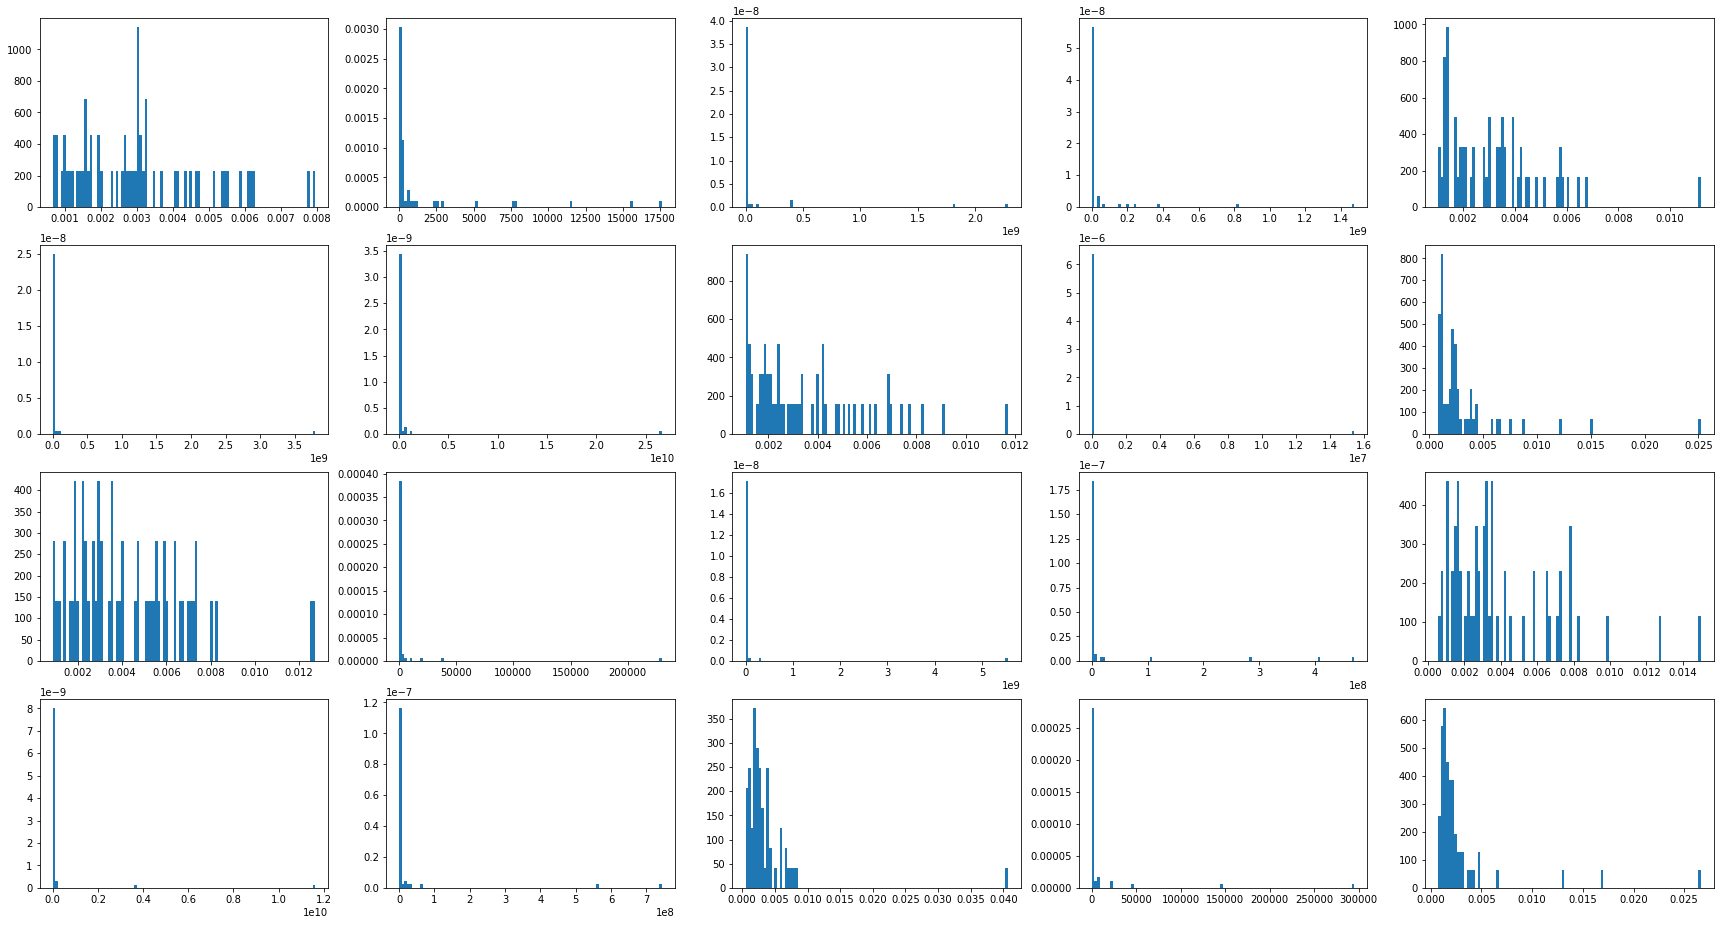

In [229]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist(AllChannel2[count], density=False, bins=100)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

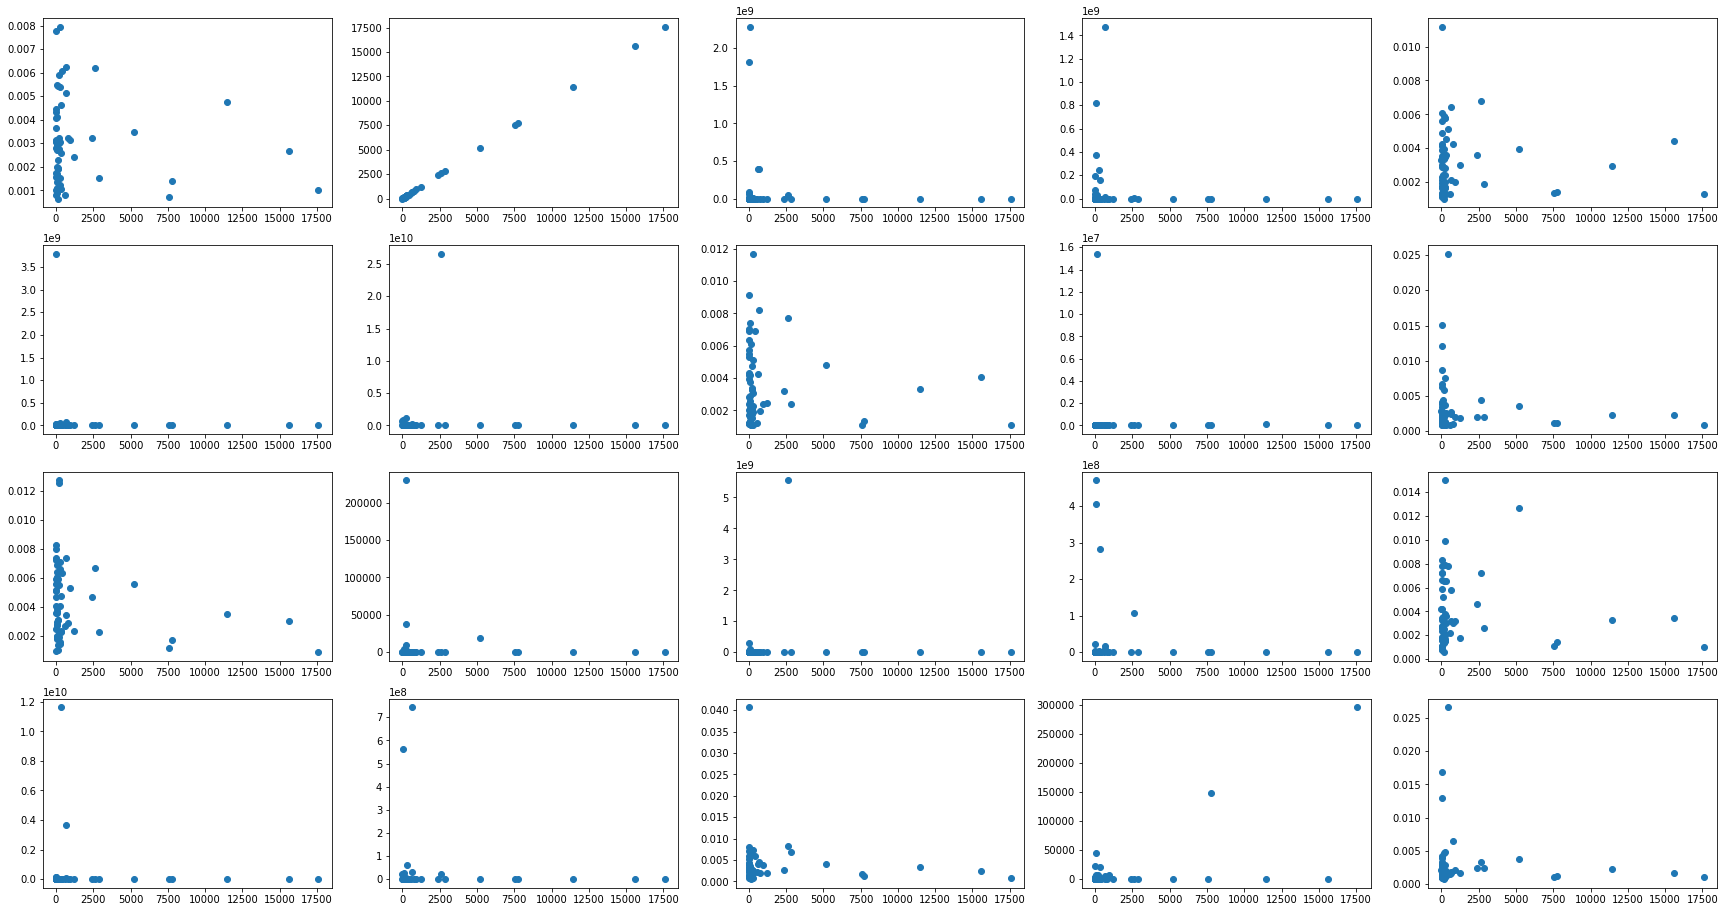

In [227]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].plot(Channel12v2,AllChannel2[count], 'o')
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

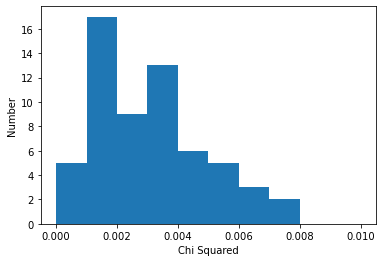

In [282]:
plt.hist(Channel11v2, range=[0,.01], density=False, bins=10)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Chi Squared');

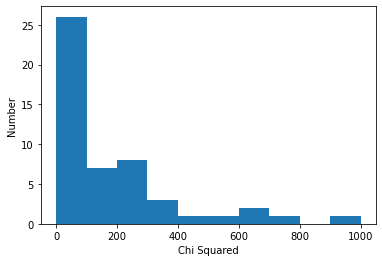

In [289]:
plt.hist(Channel12v2, range=[0,1000], density=False, bins=10)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Chi Squared');

In [286]:
Channel12v2

[151.2813796931665,
 266.26489346431805,
 930.2914661735839,
 147.68390936119025,
 12.250726901528159,
 8.54272043071216,
 66.7862257406358,
 413.1470033425155,
 37.92162067999715,
 16.08146539969759,
 80.23619736621896,
 5195.1706381052445,
 238.55944953192096,
 190.34641395872868,
 46.377171713775084,
 209.69891101253052,
 23.83144556419601,
 69.77461687382574,
 9.211303100669676,
 2396.646260389834,
 126.5317140756553,
 216.14014781372012,
 583.9206962878997,
 2859.300083519362,
 71.03445803339692,
 1231.6127958523418,
 786.6409247443028,
 76.03612128780678,
 228.16598230193668,
 174.5031858429969,
 319.58119412423173,
 27.920109371552645,
 145.15277154754486,
 141.4291869376538,
 26.571076930057384,
 10.671983855688328,
 11.645806303943894,
 236.41825177459185,
 2.8078192943677087,
 81.41824454108603,
 7566.4931031534925,
 26.15711257219499,
 318.30164660315575,
 10.780658093370304,
 7754.481178342389,
 17591.61302285247,
 262.6077680866032,
 643.016164381048,
 256.5223050854594,
 

# Picking Good Days

In [336]:
ChiArrayText
#1 2 7 8 10 13 15 19 21 22 24 26 29 41 49 50 53 54 
#211215, 211213, 211212, 220101, 211225, 211229, 211228, 220103, 211222, 211219, 211227, 211220, 211226, 211130, 211113, 211128, 211129, 211121 

['ChiSquared/ChiSquaredout.211215_1700.txt',
 'ChiSquared/ChiSquaredout.211213_1700.txt',
 'ChiSquared/ChiSquaredout.211210_1700.txt',
 'ChiSquared/ChiSquaredout.211218_1700.txt',
 'ChiSquared/ChiSquaredout.220106_1500.txt',
 'ChiSquared/ChiSquaredout.220105_1500.txt',
 'ChiSquared/ChiSquaredout.211212_1700.txt',
 'ChiSquared/ChiSquaredout.220101_1600.txt',
 'ChiSquared/ChiSquaredout.211217_1700.txt',
 'ChiSquared/ChiSquaredout.211225_1600.txt',
 'ChiSquared/ChiSquaredout.211231_1600.txt',
 'ChiSquared/ChiSquaredout.211221_1600.txt',
 'ChiSquared/ChiSquaredout.211229_1600.txt',
 'ChiSquared/ChiSquaredout.211216_1700.txt',
 'ChiSquared/ChiSquaredout.211228_1600.txt',
 'ChiSquared/ChiSquaredout.220115_1500.txt',
 'ChiSquared/ChiSquaredout.211211_1700.txt',
 'ChiSquared/ChiSquaredout.220116_1500.txt',
 'ChiSquared/ChiSquaredout.220103_1500.txt',
 'ChiSquared/ChiSquaredout.211230_1600.txt',
 'ChiSquared/ChiSquaredout.211222_1600.txt',
 'ChiSquared/ChiSquaredout.211219_1600.txt',
 'ChiSquar

In [310]:
test=np.array(Channel11)
test <=4e23

array([ True,  True, False, False, False, False,  True,  True, False,
        True, False, False,  True, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False])

In [ ]:
#1 2 7 8 10 13 15 19 21 22 24 26 29 41 49 50 53 54 
#211215, 211213, 211212x, 220101, 211225, 211229, 211228, 220103, 211222, 211219x, 211227, 211220, 211226x, 211130, 211113, 211128, 211129, 211121 

pas/211121_1800


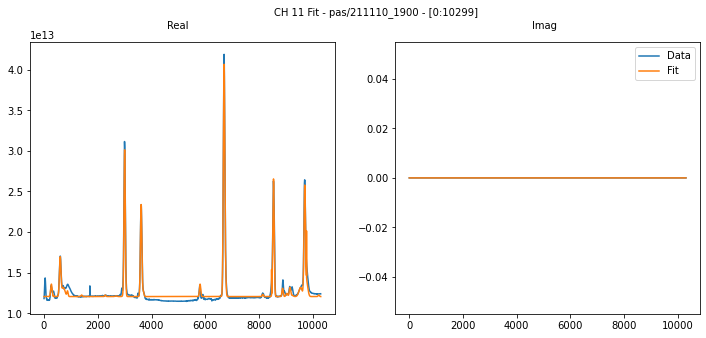

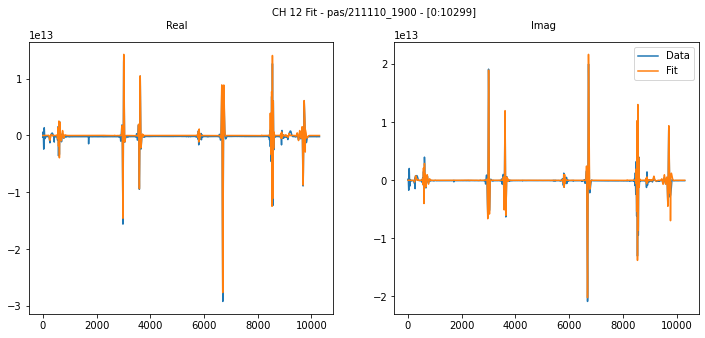

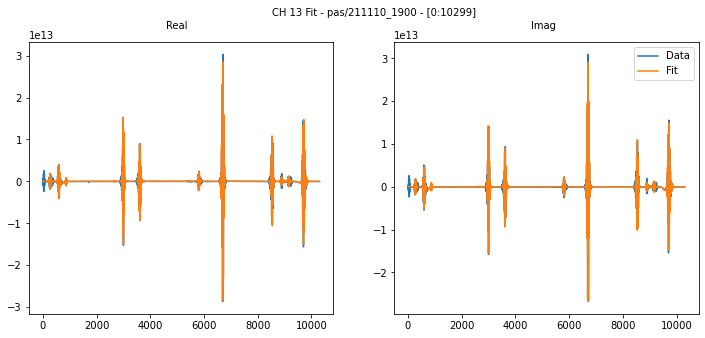

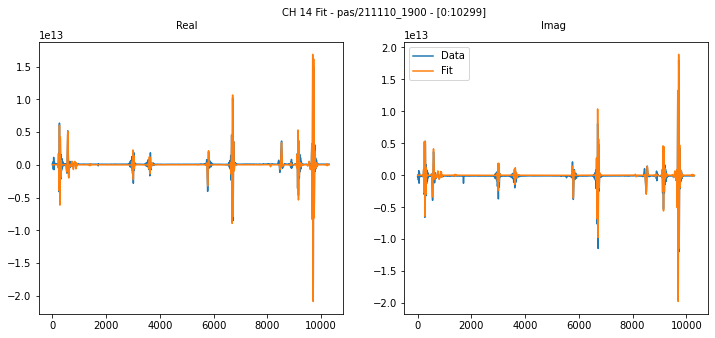

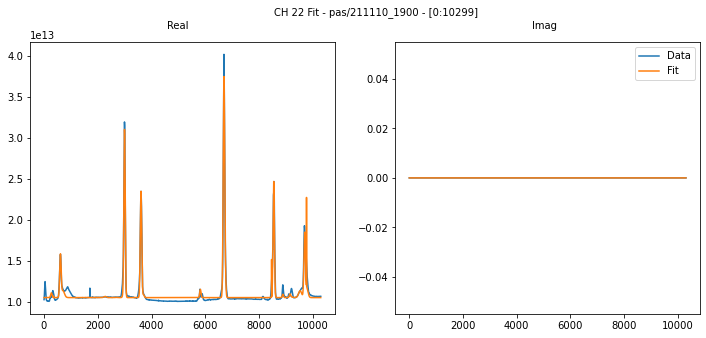

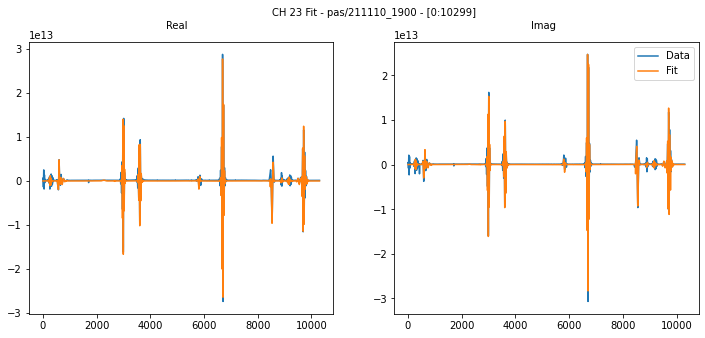

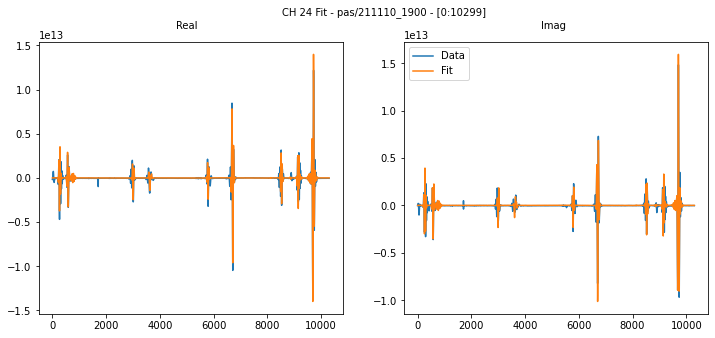

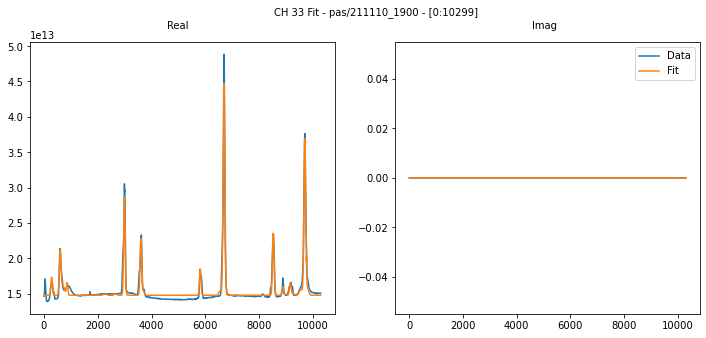

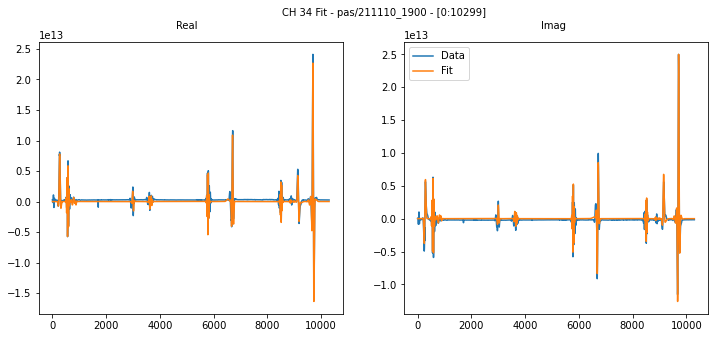

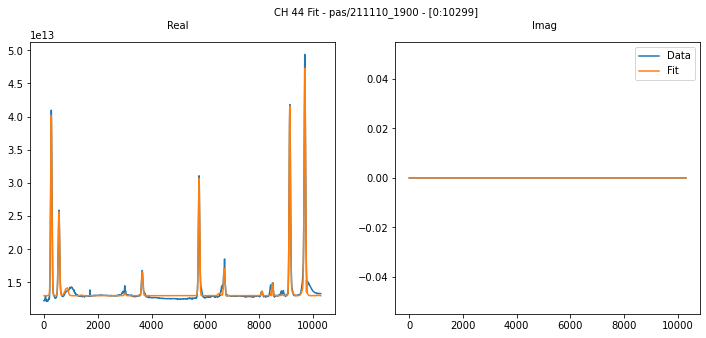

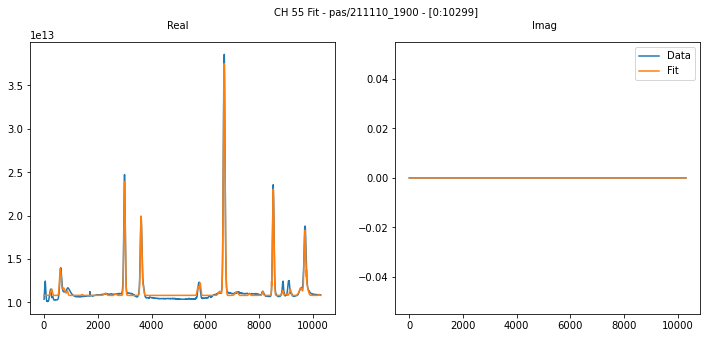

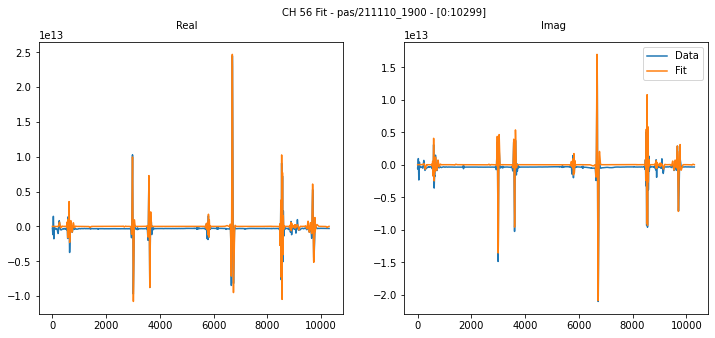

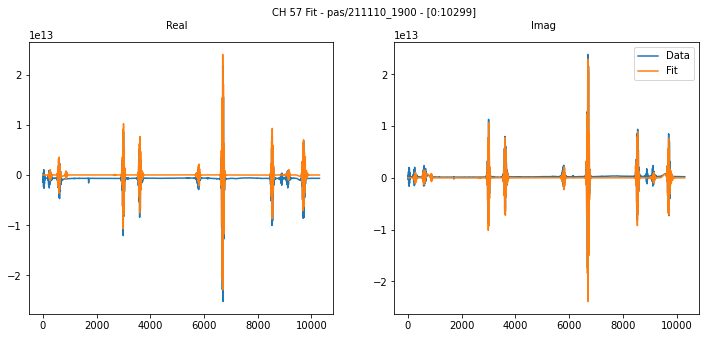

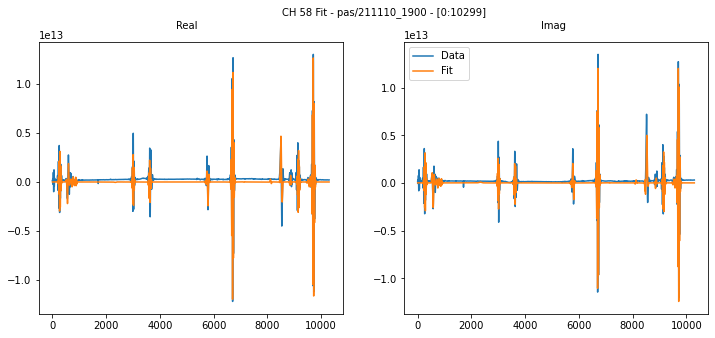

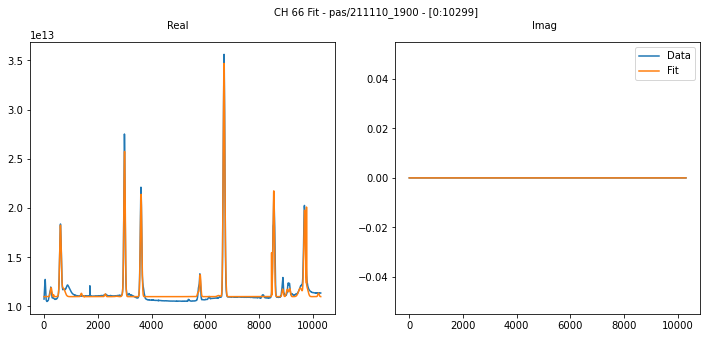

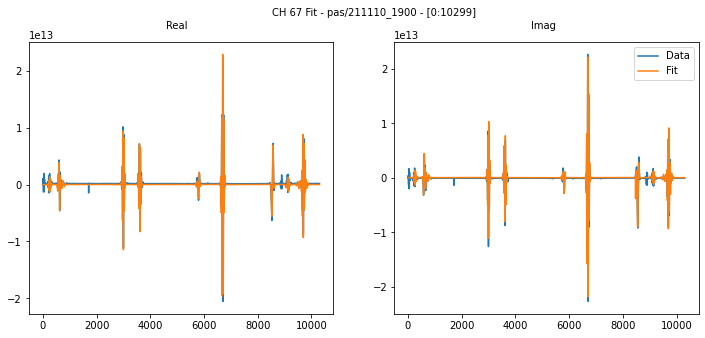

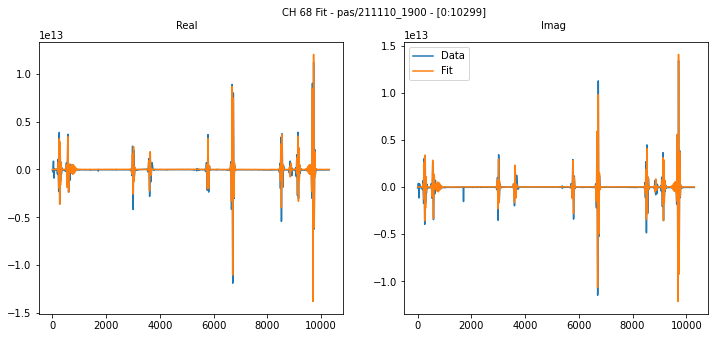

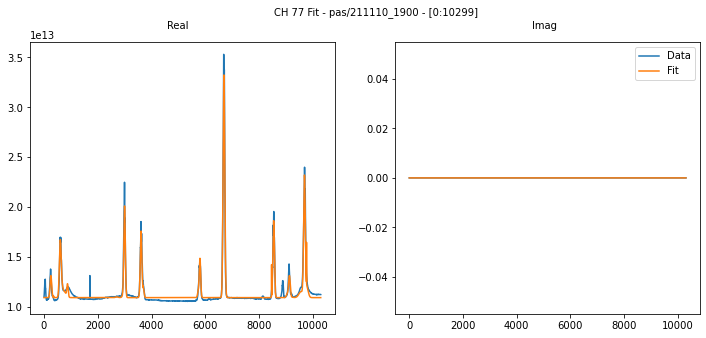

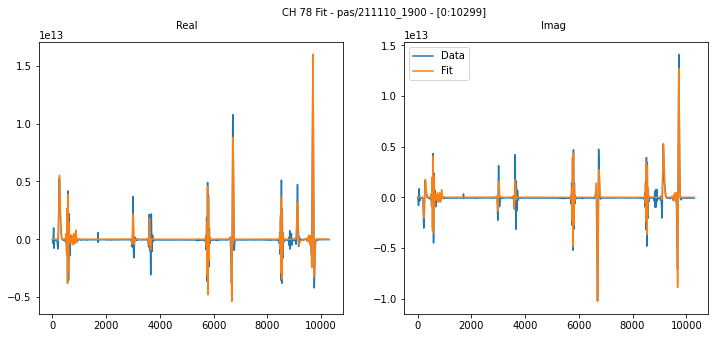

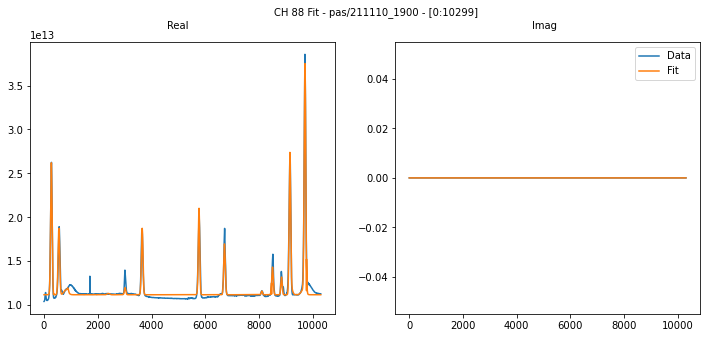

In [351]:
#Loads data and TheoryPredictor class from file in fits folder

fileIn = 'fits/out.211121_1800.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data
cut=[]
#cut = [0,6500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

fit1210arraydat, fit1210arrayfit=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)



In [352]:
#Good days: 211215, 211213, 220101, 211225, 211229, 211228, 220103, 211222, 211227, 211220, 211130, 211113, 211128, 211129, 211121 

In [411]:


keys = ['D{}_pos_x','D{}_pos_y','D{}_phi_0','D{}_beam_center_x','D{}_beam_center_y','D{}_beam_sigma_x','D{}_beam_sigma_y','D{}_beam_smooth_x','D{}_beam_smooth_y']
files = ['211215_1700', '211213_1700', '220101_1600', '211225_1600', '211229_1600', '211228_1600', '220103_1500', '211222_1600', '211227_1600', '211220_1600', '211130_1800', '211113_1900', '211128_1800', '211129_1800', '211121_1800']
params = []
for file in files:
    f = open('fits/out.'+file+'.txt','r')
    startData = f.read()
    f.close()
    exec(startData)
    params.append([[startParams[k.format(j)] for k in keys] for j in range(1,9)])
params = np.array(params)
print(params)
averages = np.mean(params,axis=0)
medians= np.median(params,axis=0)
#print(averages)
avgParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        avgParams[k.format(i)] = averages[i-1,j]
#print(avgParams)
medParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        medParams[k.format(i)] = medians[i-1,j]

[[[ 0.          4.4         0.         ...  0.05        0.04748272
    0.04295763]
  [ 4.43598011 -0.09267281 -0.20578242 ...  0.05        0.04597789
    0.0422013 ]
  [ 0.16584049 -4.42577991  1.26723264 ...  0.05        0.04454582
    0.04548216]
  ...
  [ 4.81704487 -0.35793731 -3.00875188 ...  0.05        0.05964936
    0.04045161]
  [ 0.3354697  -4.9005522  -1.41201536 ...  0.05        0.05122946
    0.0452105 ]
  [-4.44429292 -0.97384681 -3.08195233 ...  0.05        0.070404
    0.04328276]]

 [[ 0.          4.4         0.         ...  0.05        0.04768016
    0.04408305]
  [ 4.45709646 -0.15856207 -0.09410729 ...  0.05        0.04389462
    0.0459722 ]
  [ 0.20008314 -4.42028819  1.33771697 ...  0.05        0.04092717
    0.05006075]
  ...
  [ 4.38612995 -0.08722465 -3.13767923 ...  0.05        0.04607899
    0.04304721]
  [-0.12141966 -4.53353802 -1.59213904 ...  0.05        0.04788584
    0.04489457]
  [-5.41665505 -0.48708152 -3.14065722 ...  0.05        0.05772623
    0.04

In [369]:
len(params[1])

8

In [370]:
D1_pos_x=[]
D1_pos_y=[]
D1_phi_0=[]
D1_beam_center_x=[]
D1_beam_center_y=[]
D1_beam_sigma_x=[]
D1_beam_sigma_y=[]
D1_beam_smooth_x=[]
D1_beam_smooth_y=[]

D2_pos_x=[]
D2_pos_y=[]
D2_phi_0=[]
D2_beam_center_x=[]
D2_beam_center_y=[]
D2_beam_sigma_x=[]
D2_beam_sigma_y=[]
D2_beam_smooth_x=[]
D2_beam_smooth_y=[]

D3_pos_x=[]
D3_pos_y=[]
D3_phi_0=[]
D3_beam_center_x=[]
D3_beam_center_y=[]
D3_beam_sigma_x=[]
D3_beam_sigma_y=[]
D3_beam_smooth_x=[]
D3_beam_smooth_y=[]

D4_pos_x=[]
D4_pos_y=[]
D4_phi_0=[]
D4_beam_center_x=[]
D4_beam_center_y=[]
D4_beam_sigma_x=[]
D4_beam_sigma_y=[]
D4_beam_smooth_x=[]
D4_beam_smooth_y=[]

D5_pos_x=[]
D5_pos_y=[]
D5_phi_0=[]
D5_beam_center_x=[]
D5_beam_center_y=[]
D5_beam_sigma_x=[]
D5_beam_sigma_y=[]
D5_beam_smooth_x=[]
D5_beam_smooth_y=[]

D6_pos_x=[]
D6_pos_y=[]
D6_phi_0=[]
D6_beam_center_x=[]
D6_beam_center_y=[]
D6_beam_sigma_x=[]
D6_beam_sigma_y=[]
D6_beam_smooth_x=[]
D6_beam_smooth_y=[]

D7_pos_x=[]
D7_pos_y=[]
D7_phi_0=[]
D7_beam_center_x=[]
D7_beam_center_y=[]
D7_beam_sigma_x=[]
D7_beam_sigma_y=[]
D7_beam_smooth_x=[]
D7_beam_smooth_y=[]

D8_pos_x=[]
D8_pos_y=[]
D8_phi_0=[]
D8_beam_center_x=[]
D8_beam_center_y=[]
D8_beam_sigma_x=[]
D8_beam_sigma_y=[]
D8_beam_smooth_x=[]
D8_beam_smooth_y=[]

for i in range(len(params)):
    #for j in range(len(params[i])):
        D1_pos_x.append(        params[i][0][0])
        D1_pos_y.append(        params[i][0][1])
        D1_phi_0.append(        params[i][0][2])
        D1_beam_center_x.append(params[i][0][3])
        D1_beam_center_y.append(params[i][0][4])
        D1_beam_sigma_x.append( params[i][0][5])
        D1_beam_sigma_y.append( params[i][0][6])
        D1_beam_smooth_x.append(params[i][0][7])
        D1_beam_smooth_y.append(params[i][0][8])
        
        D2_pos_x.append(        params[i][1][0])
        D2_pos_y.append(        params[i][1][1])
        D2_phi_0.append(        params[i][1][2])
        D2_beam_center_x.append(params[i][1][3])
        D2_beam_center_y.append(params[i][1][4])
        D2_beam_sigma_x.append( params[i][1][5])
        D2_beam_sigma_y.append( params[i][1][6])
        D2_beam_smooth_x.append(params[i][1][7])
        D2_beam_smooth_y.append(params[i][1][8])
        
        D3_pos_x.append(        params[i][2][0])
        D3_pos_y.append(        params[i][2][1])
        D3_phi_0.append(        params[i][2][2])
        D3_beam_center_x.append(params[i][2][3])
        D3_beam_center_y.append(params[i][2][4])
        D3_beam_sigma_x.append( params[i][2][5])
        D3_beam_sigma_y.append( params[i][2][6])
        D3_beam_smooth_x.append(params[i][2][7])
        D3_beam_smooth_y.append(params[i][2][8])
         
        D4_pos_x.append(        params[i][3][0])
        D4_pos_y.append(        params[i][3][1])
        D4_phi_0.append(        params[i][3][2])
        D4_beam_center_x.append(params[i][3][3])
        D4_beam_center_y.append(params[i][3][4])
        D4_beam_sigma_x.append( params[i][3][5])
        D4_beam_sigma_y.append( params[i][3][6])
        D4_beam_smooth_x.append(params[i][3][7])
        D4_beam_smooth_y.append(params[i][3][8])
         
        D5_pos_x.append(        params[i][4][0])
        D5_pos_y.append(        params[i][4][1])
        D5_phi_0.append(        params[i][4][2])
        D5_beam_center_x.append(params[i][4][3])
        D5_beam_center_y.append(params[i][4][4])
        D5_beam_sigma_x.append( params[i][4][5])
        D5_beam_sigma_y.append( params[i][4][6])
        D5_beam_smooth_x.append(params[i][4][7])
        D5_beam_smooth_y.append(params[i][4][8])
         
        D6_pos_x.append(        params[i][5][0])
        D6_pos_y.append(        params[i][5][1])
        D6_phi_0.append(        params[i][5][2])
        D6_beam_center_x.append(params[i][5][3])
        D6_beam_center_y.append(params[i][5][4])
        D6_beam_sigma_x.append( params[i][5][5])
        D6_beam_sigma_y.append( params[i][5][6])
        D6_beam_smooth_x.append(params[i][5][7])
        D6_beam_smooth_y.append(params[i][5][8])
         
        D7_pos_x.append(        params[i][6][0])
        D7_pos_y.append(        params[i][6][1])
        D7_phi_0.append(        params[i][6][2])
        D7_beam_center_x.append(params[i][6][3])
        D7_beam_center_y.append(params[i][6][4])
        D7_beam_sigma_x.append( params[i][6][5])
        D7_beam_sigma_y.append( params[i][6][6])
        D7_beam_smooth_x.append(params[i][6][7])
        D7_beam_smooth_y.append(params[i][6][8])
         
        D8_pos_x.append(        params[i][7][0])
        D8_pos_y.append(        params[i][7][1])
        D8_phi_0.append(        params[i][7][2])
        D8_beam_center_x.append(params[i][7][3])
        D8_beam_center_y.append(params[i][7][4])
        D8_beam_sigma_x.append( params[i][7][5])
        D8_beam_sigma_y.append( params[i][7][6])
        D8_beam_smooth_x.append(params[i][7][7])
        D8_beam_smooth_y.append(params[i][7][8])
    

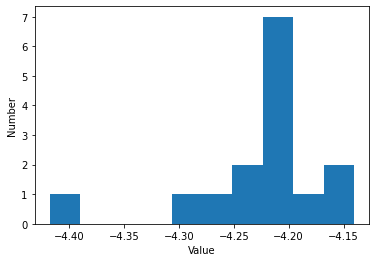

In [390]:
plt.hist(D4_pos_x, density=False, bins=10)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

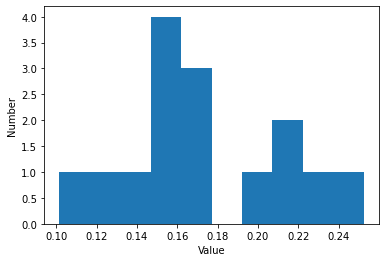

In [391]:
plt.hist(D4_pos_y, density=False, bins=10)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

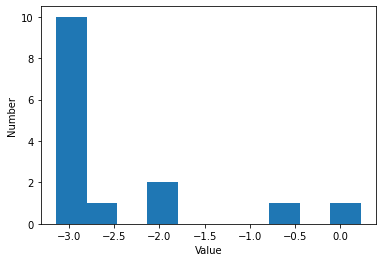

In [405]:
plt.hist(D8_phi_0, density=False, bins=10)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

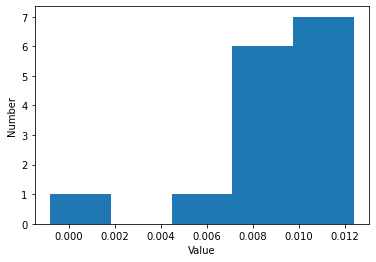

In [399]:
plt.hist(D1_beam_center_x, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');


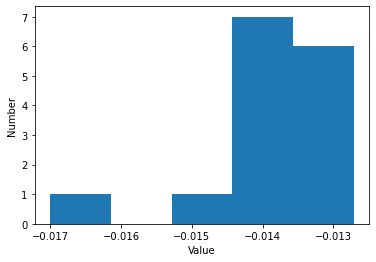

In [377]:
plt.hist(D1_beam_center_y, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');


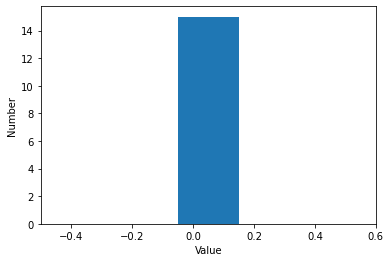

In [378]:
plt.hist(D1_beam_sigma_x, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');


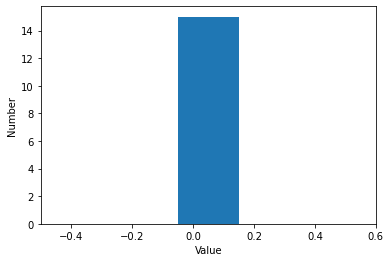

In [379]:
plt.hist(D1_beam_sigma_y, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');


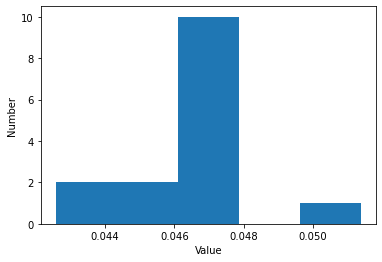

In [396]:
plt.hist(D4_beam_smooth_x, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');


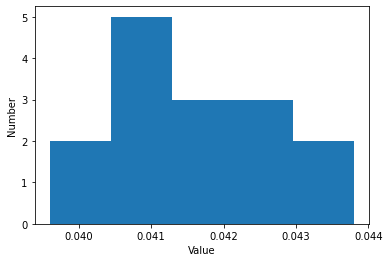

In [397]:
plt.hist(D4_beam_smooth_y, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');


In [407]:
averages

array([[ 0.00000000e+00,  4.40000000e+00,  0.00000000e+00,
         8.67921204e-03, -1.38765933e-02,  5.00000000e-02,
         5.00000000e-02,  4.83261215e-02,  4.40969125e-02],
       [ 4.46583956e+00, -1.23213816e-01, -1.51502693e-01,
         1.62044249e-02, -1.96262373e-02,  5.00000000e-02,
         5.00000000e-02,  4.52353146e-02,  4.49820754e-02],
       [ 2.13310901e-01, -4.42841598e+00,  1.50769787e+00,
         4.65961036e-03, -1.11254855e-02,  5.00000000e-02,
         5.00000000e-02,  4.74956139e-02,  5.13624574e-02],
       [-4.22406549e+00,  1.74431043e-01, -1.11752506e+00,
        -4.67349672e-02,  1.47077694e-02,  5.00000000e-02,
         5.00000000e-02,  4.65249069e-02,  4.15099467e-02],
       [ 0.00000000e+00,  4.40000000e+00,  0.00000000e+00,
         1.04902180e-02, -1.70720681e-02,  5.00000000e-02,
         5.00000000e-02,  4.52658250e-02,  4.33731847e-02],
       [ 4.76371317e+00, -4.11646296e-01, -2.25926315e+00,
         1.77792183e-02, -2.33662354e-02,  5.000000

In [408]:
avgParams

{'D1_pos_x': 0.0,
 'D1_pos_y': 4.3999999999999995,
 'D1_phi_0': 0.0,
 'D1_beam_center_x': 0.008679212037492683,
 'D1_beam_center_y': -0.013876593278946997,
 'D1_beam_sigma_x': 0.05000000000000001,
 'D1_beam_sigma_y': 0.05000000000000001,
 'D1_beam_smooth_x': 0.04832612152543071,
 'D1_beam_smooth_y': 0.04409691245733743,
 'D2_pos_x': 4.465839564830871,
 'D2_pos_y': -0.12321381621677926,
 'D2_phi_0': -0.15150269275792339,
 'D2_beam_center_x': 0.016204424912437725,
 'D2_beam_center_y': -0.019626237255154604,
 'D2_beam_sigma_x': 0.05000000000000001,
 'D2_beam_sigma_y': 0.05000000000000001,
 'D2_beam_smooth_x': 0.045235314562959865,
 'D2_beam_smooth_y': 0.04498207537082468,
 'D3_pos_x': 0.21331090117501195,
 'D3_pos_y': -4.428415977053031,
 'D3_phi_0': 1.5076978726259884,
 'D3_beam_center_x': 0.00465961036369529,
 'D3_beam_center_y': -0.011125485544687752,
 'D3_beam_sigma_x': 0.05000000000000001,
 'D3_beam_sigma_y': 0.05000000000000001,
 'D3_beam_smooth_x': 0.04749561391517934,
 'D3_beam_sm

In [410]:
medians

array([[ 0.00000000e+00,  4.40000000e+00,  0.00000000e+00,
         9.56948093e-03, -1.36258780e-02,  5.00000000e-02,
         5.00000000e-02,  4.78625015e-02,  4.41436022e-02],
       [ 4.45709646e+00, -1.34583335e-01, -1.41365705e-01,
         1.61395948e-02, -1.90504204e-02,  5.00000000e-02,
         5.00000000e-02,  4.55174594e-02,  4.58632037e-02],
       [ 1.97498317e-01, -4.42577991e+00,  1.37539868e+00,
        -3.38050803e-03, -1.06394652e-02,  5.00000000e-02,
         5.00000000e-02,  4.42473202e-02,  5.05607022e-02],
       [-4.20967798e+00,  1.71689212e-01, -1.21879437e+00,
        -4.87678940e-02,  1.57277016e-02,  5.00000000e-02,
         5.00000000e-02,  4.66678555e-02,  4.14208538e-02],
       [ 0.00000000e+00,  4.40000000e+00,  0.00000000e+00,
         1.28474961e-02, -1.38465077e-02,  5.00000000e-02,
         5.00000000e-02,  4.39469447e-02,  4.53291628e-02],
       [ 4.56621475e+00, -8.91142065e-02, -3.13767923e+00,
         1.04916687e-02, -2.28700991e-02,  5.000000

In [427]:
medParams #fits/Good15Days/out-Copy1.* have median values

{'D1_pos_x': 0.0,
 'D1_pos_y': 4.4,
 'D1_phi_0': 0.0,
 'D1_beam_center_x': 0.00956948093007691,
 'D1_beam_center_y': -0.013625878015554474,
 'D1_beam_sigma_x': 0.05,
 'D1_beam_sigma_y': 0.05,
 'D1_beam_smooth_x': 0.04786250147169731,
 'D1_beam_smooth_y': 0.044143602245939766,
 'D2_pos_x': 4.457096459884753,
 'D2_pos_y': -0.13458333452504975,
 'D2_phi_0': -0.14136570477582258,
 'D2_beam_center_x': 0.016139594778037007,
 'D2_beam_center_y': -0.019050420399174806,
 'D2_beam_sigma_x': 0.05,
 'D2_beam_sigma_y': 0.05,
 'D2_beam_smooth_x': 0.04551745943241843,
 'D2_beam_smooth_y': 0.04586320370211924,
 'D3_pos_x': 0.19749831711923968,
 'D3_pos_y': -4.4257799093591546,
 'D3_phi_0': 1.375398678259649,
 'D3_beam_center_x': -0.0033805080277149787,
 'D3_beam_center_y': -0.010639465185451058,
 'D3_beam_sigma_x': 0.05,
 'D3_beam_sigma_y': 0.05,
 'D3_beam_smooth_x': 0.04424732024883369,
 'D3_beam_smooth_y': 0.050560702158029866,
 'D4_pos_x': -4.209677976265762,
 'D4_pos_y': 0.1716892115393719,
 'D4_p

# Chi Squared of Good 15 Days

In [502]:
ChiArrayTextGoodMean15=glob.glob('ChiSquared/ChiSquaredout.out*')

ChiArrayTextGoodMean15

['ChiSquared/ChiSquaredout.out.211213_1700Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211215_1700Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211129_1800Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211229_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211225_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.220101_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211222_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211228_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211220_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211121_1800Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211130_1800Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.220103_1500Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211128_1800Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211227_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211113_1900Copy.txt.txt']

In [503]:
ChiArrayGoodMean15 = []
for file in ChiArrayTextGoodMean15:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArrayGoodMean15.append(startData)
ChiArrayGoodMean15 = np.array(ChiArrayGoodMean15)

ChiArrayGoodMean15

array([[3.20549792e+23, 2.70261816e+23, 4.85001993e+23, 2.58738633e+23,
        3.40927725e+23, 5.47967883e+23, 2.68537736e+23, 9.84899150e+23,
        2.55786804e+23, 3.20847104e+23, 9.04999291e+23, 2.97471546e+24,
        2.88719072e+24, 2.14568792e+24, 4.23938278e+23, 4.27031996e+23,
        2.04957718e+23, 4.21895091e+23, 1.59542138e+23, 2.79126436e+23],
       [9.79623420e+23, 2.55341591e+23, 6.23163162e+23, 1.96679460e+23,
        5.74640541e+23, 4.60044786e+23, 1.47555867e+23, 7.20404404e+23,
        2.66809932e+23, 2.82049114e+23, 8.67581110e+23, 1.62743849e+24,
        2.79564884e+24, 1.51002573e+24, 4.00375899e+23, 3.17591002e+23,
        1.54505656e+23, 4.24839515e+23, 2.07454615e+23, 2.26307640e+23],
       [3.64886840e+23, 2.43731066e+23, 4.85106210e+24, 2.02525291e+24,
        4.20972016e+23, 4.22137006e+24, 1.24792433e+24, 8.01066960e+23,
        2.06092824e+23, 3.76223204e+23, 7.97513732e+23, 2.68250663e+24,
        2.76617255e+24, 2.44546121e+24, 3.81519023e+23, 2.2396

In [504]:
#Means
Channel11v3=[]
Channel12v3=[]
Channel13v3=[]
Channel14v3=[]
Channel22v3=[]
Channel23v3=[]
Channel24v3=[]
Channel33v3=[]
Channel34v3=[]
Channel44v3=[]

Channel55v3=[]
Channel56v3=[]
Channel57v3=[]
Channel58v3=[]
Channel66v3=[]
Channel67v3=[]
Channel68v3=[]
Channel77v3=[]
Channel78v3=[]
Channel88v3=[]

for i in range(len(ChiArrayGood15)):
    Channel11v3.append(ChiArrayGoodMean15[i][0])
    Channel12v3.append(ChiArrayGoodMean15[i][1])
    Channel13v3.append(ChiArrayGoodMean15[i][2])
    Channel14v3.append(ChiArrayGoodMean15[i][3])
    Channel22v3.append(ChiArrayGoodMean15[i][4])
    Channel23v3.append(ChiArrayGoodMean15[i][5])
    Channel24v3.append(ChiArrayGoodMean15[i][6])
    Channel33v3.append(ChiArrayGoodMean15[i][7])
    Channel34v3.append(ChiArrayGoodMean15[i][8])
    Channel44v3.append(ChiArrayGoodMean15[i][9])
    
    Channel55v3.append(ChiArrayGoodMean15[i][10])
    Channel56v3.append(ChiArrayGoodMean15[i][11])
    Channel57v3.append(ChiArrayGoodMean15[i][12])
    Channel58v3.append(ChiArrayGoodMean15[i][13])
    Channel66v3.append(ChiArrayGoodMean15[i][14])
    Channel67v3.append(ChiArrayGoodMean15[i][15])
    Channel68v3.append(ChiArrayGoodMean15[i][16])
    Channel77v3.append(ChiArrayGoodMean15[i][17])
    Channel78v3.append(ChiArrayGoodMean15[i][18])
    Channel88v3.append(ChiArrayGoodMean15[i][19])
AllChannel3=[Channel11v3,Channel12v3,Channel13v3,Channel14v3,Channel22v3,Channel23v3,Channel24v3,Channel33v3,Channel34v3,Channel44v3,Channel55v3,Channel56v3,Channel57v3,Channel58v3,Channel66v3,Channel67v3,Channel68v3,Channel77v3,Channel78v3,Channel88v3]
AllChannelText3=['Channel11v3','Channel12v3','Channel13v3','Channel14v3','Channel22v3','Channel23v3','Channel24v3','Channel33v3','Channel34v3','Channel44v3','Channel55v3','Channel56v3','Channel57v3','Channel58v3','Channel66v3','Channel67v3','Channel68v3','Channel77v3','Channel78v3','Channel88v3']

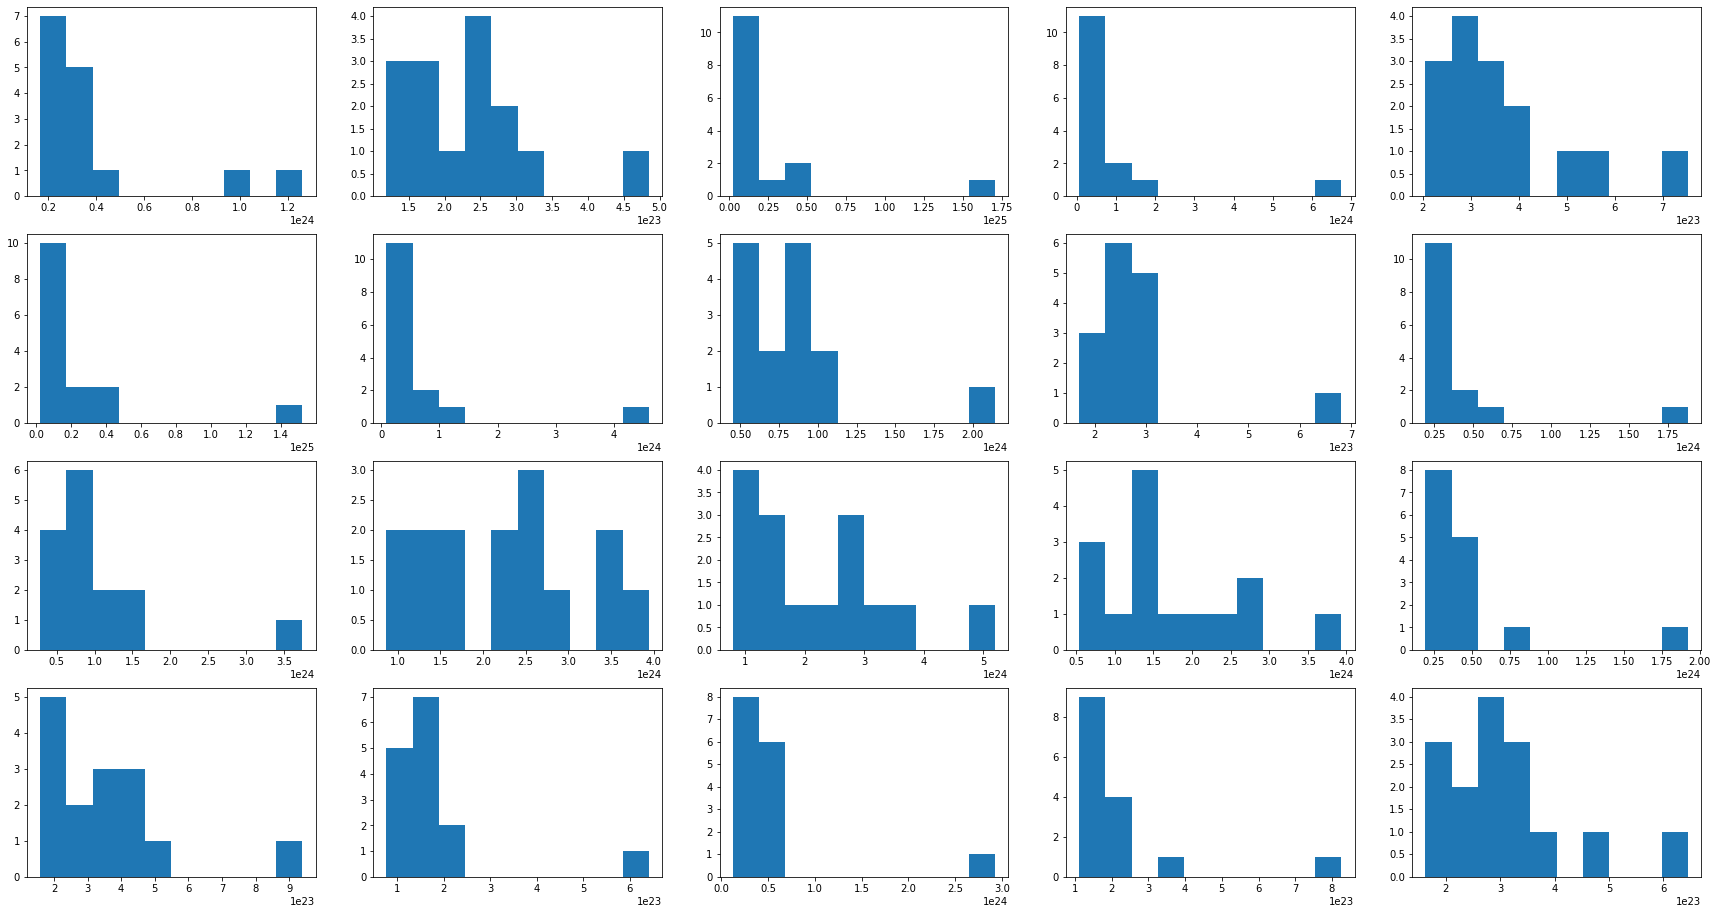

In [505]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist(AllChannel3[count], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [426]:
Channel22v3

[3.4092772495570523e+23,
 5.7464054130978914e+23,
 4.2097201553577285e+23,
 2.626215117970484e+23,
 3.063738439988758e+23,
 2.3188672896161954e+23,
 3.869100693861976e+23,
 2.0565176100233063e+23,
 4.920483342809216e+23,
 2.422596193740369e+23,
 3.6050949404147143e+23,
 3.5193599958212735e+23,
 2.9868874221021895e+23,
 2.686253900728561e+23,
 7.526651643482557e+23]

# Median

In [429]:
ChiArrayTextGoodMedian15=glob.glob('ChiSquared/Median15Chi*')

ChiArrayTextGoodMedian15

['ChiSquared/Median15ChiSquaredout.out-Copy1.211213_1700Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211129_1800Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211113_1900Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211215_1700Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211220_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.220103_1500Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211228_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211229_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211222_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211225_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211130_1800Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.220101_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211128_1800Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211227_1600Copy.txt.txt',
 'ChiS

In [430]:
ChiArrayGoodMedian15 = []
for file in ChiArrayTextGoodMedian15:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArrayGoodMedian15.append(startData)
ChiArrayGoodMedian15 = np.array(ChiArrayGoodMedian15)

ChiArrayGoodMedian15

array([[3.16728877e+23, 2.63932996e+23, 2.12199695e+23, 1.74096550e+23,
        3.34339342e+23, 2.36799296e+23, 1.58263279e+23, 8.07354076e+23,
        2.73778352e+23, 3.27711295e+23, 4.90292068e+23, 3.92047136e+23,
        1.05911322e+24, 4.85282542e+23, 3.64092735e+23, 2.37624385e+23,
        2.04269962e+23, 4.09830166e+23, 1.95239367e+23, 2.51554584e+23],
       [3.62787410e+23, 2.41326534e+23, 6.14539085e+24, 2.40314951e+24,
        4.11560217e+23, 5.40394364e+24, 1.51113084e+24, 6.87021142e+23,
        2.27836543e+23, 3.63762078e+23, 3.86140630e+23, 3.16885380e+23,
        1.07183104e+24, 7.31001145e+23, 3.31040748e+23, 2.70083577e+23,
        2.67289887e+23, 4.88656482e+23, 1.69336554e+23, 2.91266193e+23],
       [1.09979094e+24, 4.20949407e+23, 1.56467893e+25, 6.27280142e+24,
        6.50664397e+23, 1.39604089e+25, 4.35145143e+24, 2.07574082e+24,
        7.32931451e+23, 1.78870662e+24, 8.24794026e+23, 5.47507442e+23,
        1.42870623e+24, 9.00004295e+23, 9.48246808e+23, 1.6705

In [457]:
#Medians
Channel11v4=[]
Channel12v4=[]
Channel13v4=[]
Channel14v4=[]
Channel22v4=[]
Channel23v4=[]
Channel24v4=[]
Channel33v4=[]
Channel34v4=[]
Channel44v4=[]

Channel55v4=[]
Channel56v4=[]
Channel57v4=[]
Channel58v4=[]
Channel66v4=[]
Channel67v4=[]
Channel68v4=[]
Channel77v4=[]
Channel78v4=[]
Channel88v4=[]

for i in range(len(ChiArrayGoodMedian15)):
    Channel11v4.append(ChiArrayGoodMedian15[i][0])
    Channel12v4.append(ChiArrayGoodMedian15[i][1])
    Channel13v4.append(ChiArrayGoodMedian15[i][2])
    Channel14v4.append(ChiArrayGoodMedian15[i][3])
    Channel22v4.append(ChiArrayGoodMedian15[i][4])
    Channel23v4.append(ChiArrayGoodMedian15[i][5])
    Channel24v4.append(ChiArrayGoodMedian15[i][6])
    Channel33v4.append(ChiArrayGoodMedian15[i][7])
    Channel34v4.append(ChiArrayGoodMedian15[i][8])
    Channel44v4.append(ChiArrayGoodMedian15[i][9])
    
    Channel55v4.append(ChiArrayGoodMedian15[i][10])
    Channel56v4.append(ChiArrayGoodMedian15[i][11])
    Channel57v4.append(ChiArrayGoodMedian15[i][12])
    Channel58v4.append(ChiArrayGoodMedian15[i][13])
    Channel66v4.append(ChiArrayGoodMedian15[i][14])
    Channel67v4.append(ChiArrayGoodMedian15[i][15])
    Channel68v4.append(ChiArrayGoodMedian15[i][16])
    Channel77v4.append(ChiArrayGoodMedian15[i][17])
    Channel78v4.append(ChiArrayGoodMedian15[i][18])
    Channel88v4.append(ChiArrayGoodMedian15[i][19])
AllChannel4=[Channel11v4,Channel12v4,Channel13v4,Channel14v4,Channel22v4,Channel23v4,Channel24v4,Channel33v4,Channel34v4,Channel44v4,Channel55v4,Channel56v4,Channel57v4,Channel58v4,Channel66v4,Channel67v4,Channel68v4,Channel77v4,Channel78v4,Channel88v4]
AllChannelText4=['Channel11v4','Channel12v4','Channel13v4','Channel14v4','Channel22v4','Channel23v4','Channel24v4','Channel33v4','Channel34v4','Channel44v4','Channel55v4','Channel56v4','Channel57v4','Channel58v4','Channel66v4','Channel67v4','Channel68v4','Channel77v4','Channel78v4','Channel88v4']

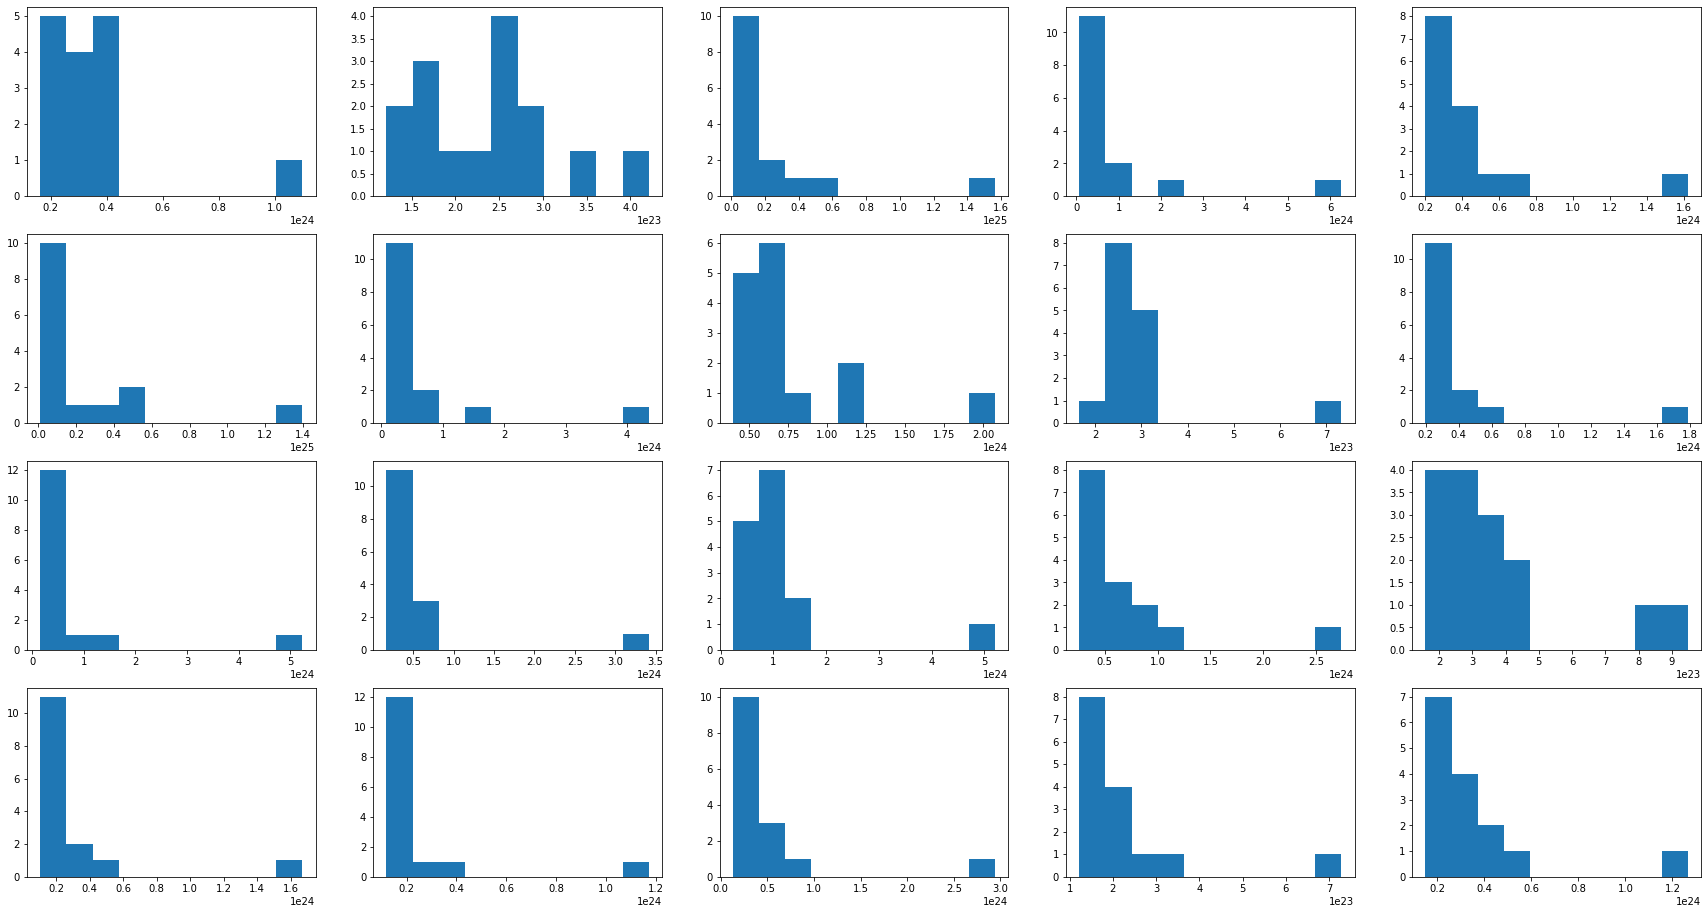

In [432]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist(AllChannel4[count], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [525]:
ChiArrayTextGood15=glob.glob('ChiSquared/ChiSquaredout-Copy*')

ChiArrayGood15 = []
for file in ChiArrayTextGood15:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArrayGood15.append(startData)
ChiArrayGood15 = np.array(ChiArrayGood15)
ChiArrayTextGood15

['ChiSquared/ChiSquaredout-Copy1.211215_1700.txt',
 'ChiSquared/ChiSquaredout-Copy1.211213_1700.txt',
 'ChiSquared/ChiSquaredout-Copy1.220101_1600.txt',
 'ChiSquared/ChiSquaredout-Copy1.211225_1600.txt',
 'ChiSquared/ChiSquaredout-Copy1.211229_1600.txt',
 'ChiSquared/ChiSquaredout-Copy1.211228_1600.txt',
 'ChiSquared/ChiSquaredout-Copy1.220103_1500.txt',
 'ChiSquared/ChiSquaredout-Copy1.211222_1600.txt',
 'ChiSquared/ChiSquaredout-Copy1.211227_1600.txt',
 'ChiSquared/ChiSquaredout-Copy1.211220_1600.txt',
 'ChiSquared/ChiSquaredout-Copy1.211130_1800.txt',
 'ChiSquared/ChiSquaredout-Copy1.211113_1900.txt',
 'ChiSquared/ChiSquaredout-Copy1.211128_1800.txt',
 'ChiSquared/ChiSquaredout-Copy1.211129_1800.txt',
 'ChiSquared/ChiSquaredout-Copy1.211121_1800.txt']

In [507]:
#Original Good 15 days
Channel11Good15=[]
Channel12Good15=[]
Channel13Good15=[]
Channel14Good15=[]
Channel22Good15=[]
Channel23Good15=[]
Channel24Good15=[]
Channel33Good15=[]
Channel34Good15=[]
Channel44Good15=[]

Channel55Good15=[]
Channel56Good15=[]
Channel57Good15=[]
Channel58Good15=[]
Channel66Good15=[]
Channel67Good15=[]
Channel68Good15=[]
Channel77Good15=[]
Channel78Good15=[]
Channel88Good15=[]

for i in range(len(ChiArrayGood15)):
    Channel11Good15.append(ChiArrayGood15[i][0])
    Channel12Good15.append(ChiArrayGood15[i][1])
    Channel13Good15.append(ChiArrayGood15[i][2])
    Channel14Good15.append(ChiArrayGood15[i][3])
    Channel22Good15.append(ChiArrayGood15[i][4])
    Channel23Good15.append(ChiArrayGood15[i][5])
    Channel24Good15.append(ChiArrayGood15[i][6])
    Channel33Good15.append(ChiArrayGood15[i][7])
    Channel34Good15.append(ChiArrayGood15[i][8])
    Channel44Good15.append(ChiArrayGood15[i][9])
    
    Channel55Good15.append(ChiArrayGood15[i][10])
    Channel56Good15.append(ChiArrayGood15[i][11])
    Channel57Good15.append(ChiArrayGood15[i][12])
    Channel58Good15.append(ChiArrayGood15[i][13])
    Channel66Good15.append(ChiArrayGood15[i][14])
    Channel67Good15.append(ChiArrayGood15[i][15])
    Channel68Good15.append(ChiArrayGood15[i][16])
    Channel77Good15.append(ChiArrayGood15[i][17])
    Channel78Good15.append(ChiArrayGood15[i][18])
    Channel88Good15.append(ChiArrayGood15[i][19])
AllChannelGood15=[Channel11Good15,Channel12Good15,Channel13Good15,Channel14Good15,Channel22Good15,Channel23Good15,Channel24Good15,Channel33Good15,Channel34Good15,Channel44Good15,Channel55Good15,Channel56Good15,Channel57Good15,Channel58Good15,Channel66Good15,Channel67Good15,Channel68Good15,Channel77Good15,Channel78Good15,Channel88Good15]
AllChannelTextGood15=['Channel11Good15','Channel12Good15','Channel13Good15','Channel14Good15','Channel22Good15','Channel23Good15','Channel24Good15','Channel33Good15','Channel34Good15','Channel44Good15','Channel55Good15','Channel56Good15','Channel57Good15','Channel58Good15','Channel66Good15','Channel67Good15','Channel68Good15','Channel77Good15','Channel78Good15','Channel88Good15']

In [562]:
AllChannelGood15[4]

[1.4549908948619339e+24,
 3.232454011027149e+23,
 2.041018909000695e+23,
 2.8038164194741704e+23,
 2.593576305583952e+23,
 1.9812451117800683e+23,
 3.482629783252758e+23,
 3.876191231633284e+23,
 2.6007626966130627e+23,
 4.8429929363064314e+23,
 2.9266297271800705e+23,
 3.130348340470055e+23,
 2.260757513909088e+23,
 4.053431766169906e+23,
 2.205976519340399e+23]

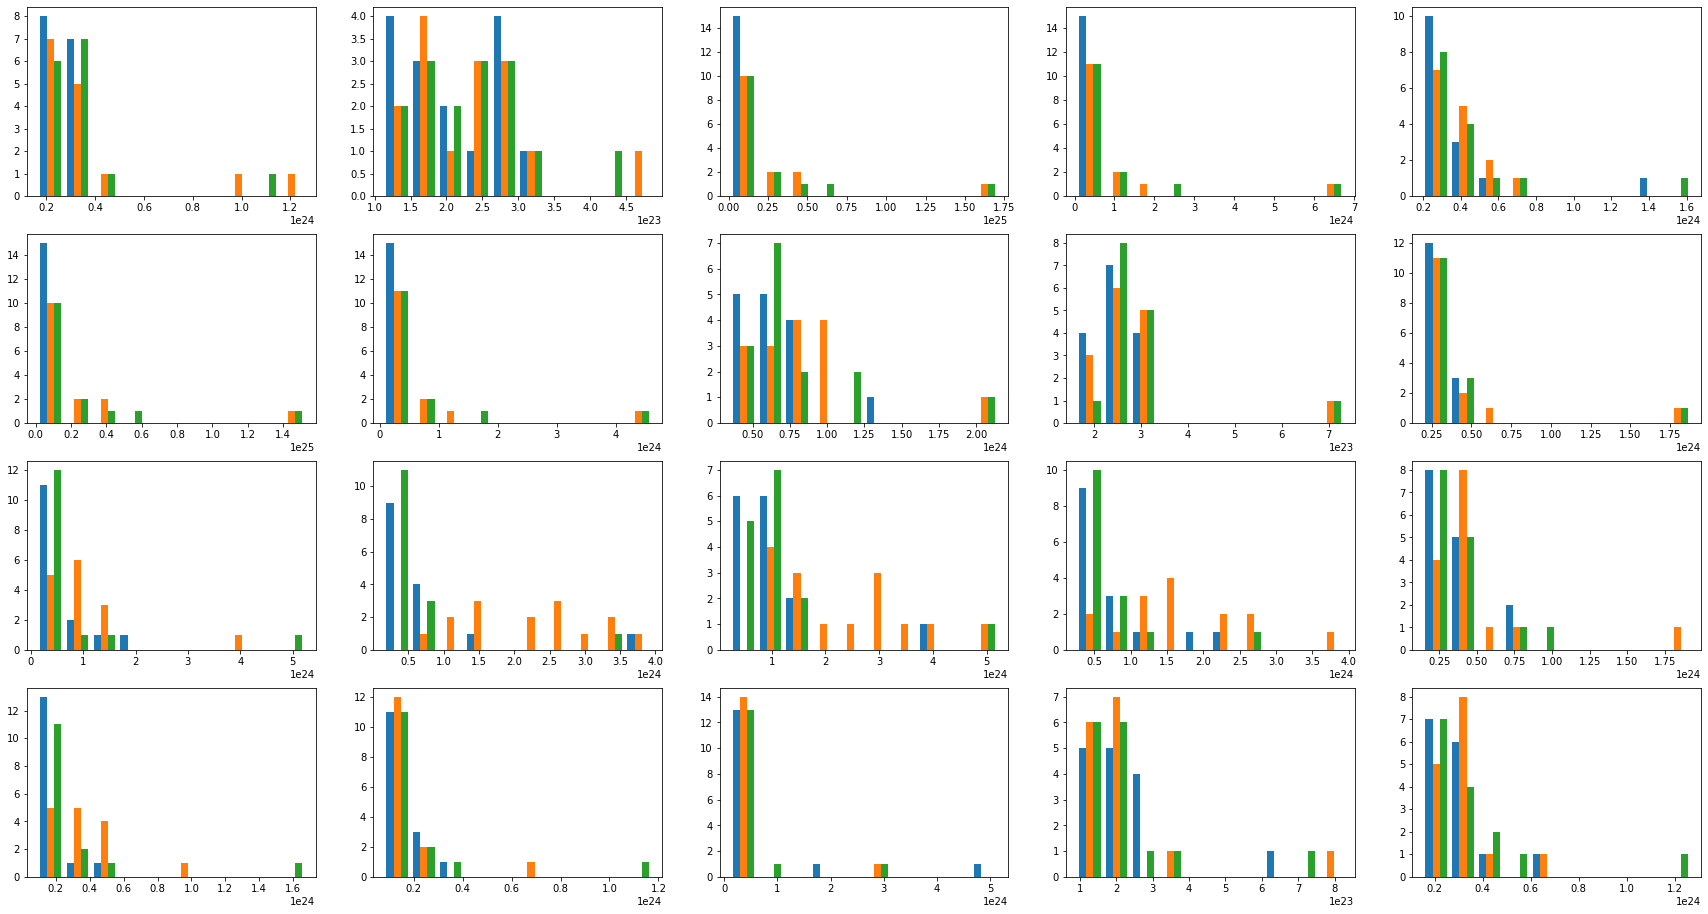

In [508]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist([AllChannelGood15[count],AllChannel3[count],AllChannel4[count]], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [510]:
AllChannel3[0]

[3.20549792192351e+23,
 9.796234199158397e+23,
 3.648868403411988e+23,
 2.488959273240045e+23,
 2.7058021397941125e+23,
 2.275082959116857e+23,
 3.650056240512628e+23,
 1.659629863683388e+23,
 3.8734547589825694e+23,
 1.7767519561454502e+23,
 3.498092295523844e+23,
 2.4507496869716526e+23,
 2.6913590910324932e+23,
 3.204048736638904e+23,
 1.2604990180049313e+24]

In [513]:
ChiArrayTextGoodMean15 #Mean

['ChiSquared/ChiSquaredout.out.211213_1700Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211215_1700Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211129_1800Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211229_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211225_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.220101_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211222_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211228_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211220_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211121_1800Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211130_1800Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.220103_1500Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211128_1800Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211227_1600Copy.txt.txt',
 'ChiSquared/ChiSquaredout.out.211113_1900Copy.txt.txt']

In [511]:
AllChannel4[0]

[3.167288773306917e+23,
 3.6278741037472314e+23,
 1.0997909426632436e+24,
 3.593555226911675e+23,
 3.762400603047936e+23,
 2.435540763341907e+23,
 1.626885161861023e+23,
 2.4990235465246022e+23,
 3.684328385472786e+23,
 2.6764511503011082e+23,
 3.93104245293786e+23,
 2.3004951191007122e+23,
 2.9242501620925077e+23,
 3.22670344798104e+23,
 1.8085797013302506e+23]

In [514]:
ChiArrayTextGoodMedian15 #Median

['ChiSquared/Median15ChiSquaredout.out-Copy1.211213_1700Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211129_1800Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211113_1900Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211215_1700Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211220_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.220103_1500Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211228_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211229_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211222_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211225_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211130_1800Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.220101_1600Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211128_1800Copy.txt.txt',
 'ChiSquared/Median15ChiSquaredout.out-Copy1.211227_1600Copy.txt.txt',
 'ChiS

In [515]:
AllChannel3[1]

[2.702618156819721e+23,
 2.5534159115949804e+23,
 2.437310662807634e+23,
 1.7724768870841225e+23,
 2.1139380634370953e+23,
 1.1881049491918925e+23,
 2.63164795833318e+23,
 1.4157411254968744e+23,
 3.3198459872495275e+23,
 1.5068366904200058e+23,
 2.3613906137698176e+23,
 2.845745083047739e+23,
 1.8095565783784685e+23,
 1.62903340974571e+23,
 4.850577901306209e+23]

In [516]:
AllChannel4[1]

[2.6393299600141538e+23,
 2.4132653354483977e+23,
 4.209494065917787e+23,
 2.7642030992870913e+23,
 3.313594493484777e+23,
 2.8100695242815146e+23,
 1.4359049307292717e+23,
 1.7808253217047625e+23,
 2.5870451554567302e+23,
 2.1490489292204488e+23,
 2.5630590092051595e+23,
 1.2126948007640306e+23,
 1.911722140774362e+23,
 1.5962151760573904e+23,
 1.6006328360417357e+23]

In [517]:
AllChannel3[2]

[4.850019929585156e+23,
 6.2316316200059e+23,
 4.851062095338973e+24,
 2.5174823005363264e+23,
 4.759388208272888e+23,
 3.052254424551871e+23,
 2.8985184033412223e+23,
 2.4311340185994953e+23,
 4.835282542560941e+23,
 2.3591085087660762e+24,
 3.6170808316777335e+24,
 4.292649948915064e+23,
 1.8211132406128101e+24,
 2.3092875166975105e+23,
 1.7081158204997741e+25]

In [519]:
AllChannel4[2]

[2.121996946443577e+23,
 6.145390853331133e+24,
 1.5646789331344146e+25,
 3.191610466173882e+23,
 2.661250144805173e+23,
 2.483747649992572e+23,
 1.4230242439446796e+23,
 1.4858423170276822e+23,
 1.7476745223887723e+23,
 2.0865988251576118e+23,
 4.361932863072719e+24,
 1.9492846749993493e+23,
 2.1171023503071662e+24,
 1.0415892405098721e+23,
 3.038468625572748e+24]

In [537]:
AllChannel3[9]

[3.208471035295937e+23,
 2.820491142078461e+23,
 3.762232044391351e+23,
 2.233445576071002e+23,
 1.9441711223611133e+23,
 2.280080367420638e+23,
 3.7731915296203856e+23,
 2.454620934818075e+23,
 5.584431525292482e+23,
 2.040652274569496e+23,
 3.058494538621854e+23,
 2.9929742596248403e+23,
 2.4718585265044528e+23,
 3.357651183140777e+23,
 1.8776180000227772e+24]

In [538]:
AllChannel4[9]

[3.277112953109733e+23,
 3.6376207810838254e+23,
 1.7887066169294802e+24,
 3.1370088268787534e+23,
 5.2906437408740675e+23,
 3.061786689473765e+23,
 2.3546500463038475e+23,
 2.2492686206747014e+23,
 3.821497191702164e+23,
 1.9987096719934118e+23,
 2.993489339337175e+23,
 2.2335233817721443e+23,
 2.4107731671240843e+23,
 3.3340482929846656e+23,
 1.9816181271900653e+23]

In [560]:
AllChannel3[4]

[3.4092772495570523e+23,
 5.7464054130978914e+23,
 4.2097201553577285e+23,
 2.626215117970484e+23,
 3.063738439988758e+23,
 2.3188672896161954e+23,
 3.869100693861976e+23,
 2.0565176100233063e+23,
 4.920483342809216e+23,
 2.422596193740369e+23,
 3.6050949404147143e+23,
 3.5193599958212735e+23,
 2.9868874221021895e+23,
 2.686253900728561e+23,
 7.526651643482557e+23]

In [561]:
AllChannel4[4]

[3.343393421520896e+23,
 4.115602167284343e+23,
 6.506643966502991e+23,
 1.6207052300764423e+24,
 4.871493150644318e+23,
 3.4767732378724904e+23,
 2.0304229674859564e+23,
 2.6433423004289783e+23,
 3.896157252439741e+23,
 3.178800699417091e+23,
 4.0344641995576714e+23,
 2.3162261174215486e+23,
 3.153928088588201e+23,
 2.654880331508804e+23,
 2.5544026079549615e+23]

pas/211222_1600


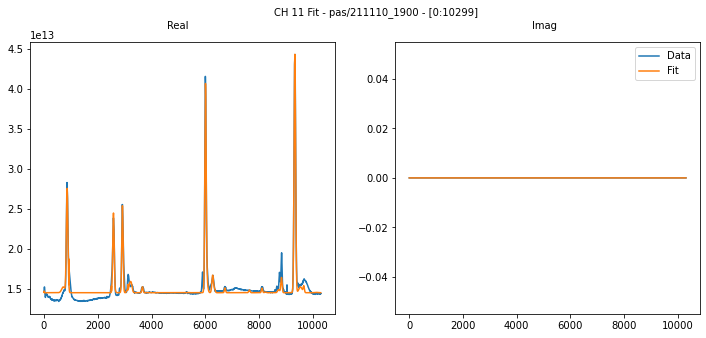

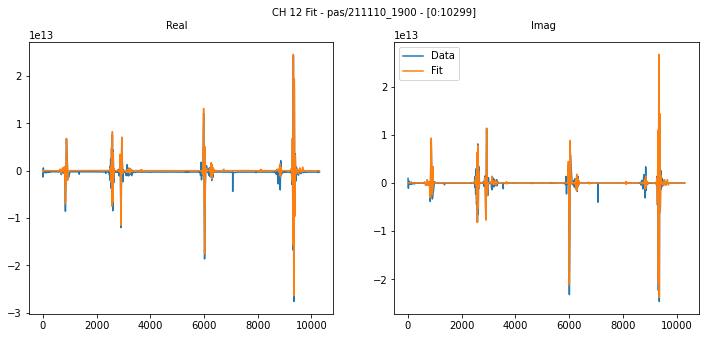

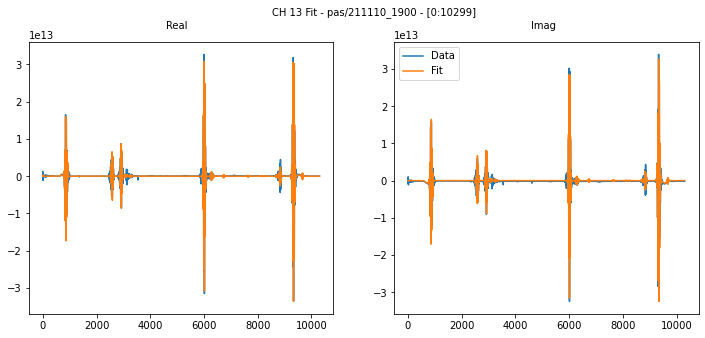

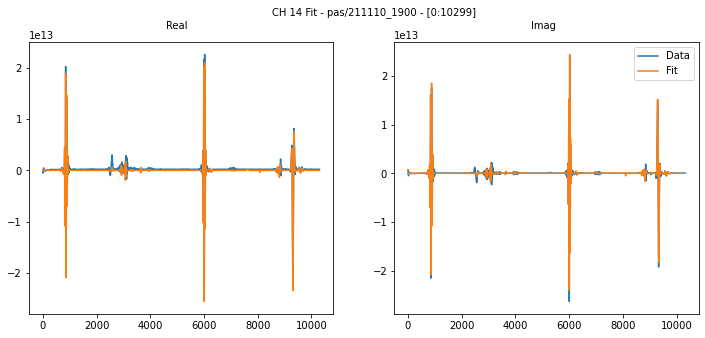

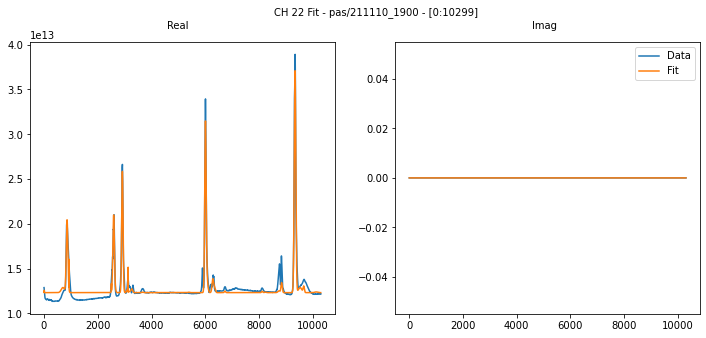

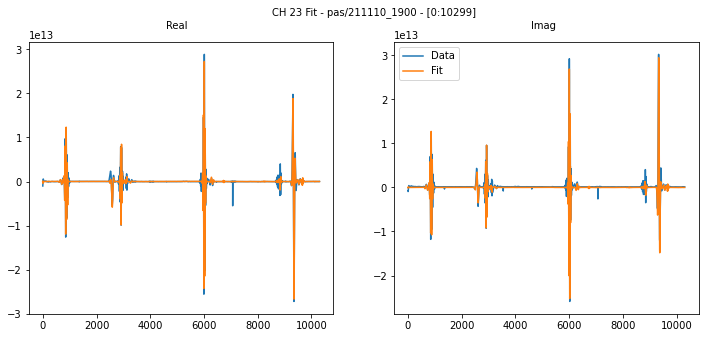

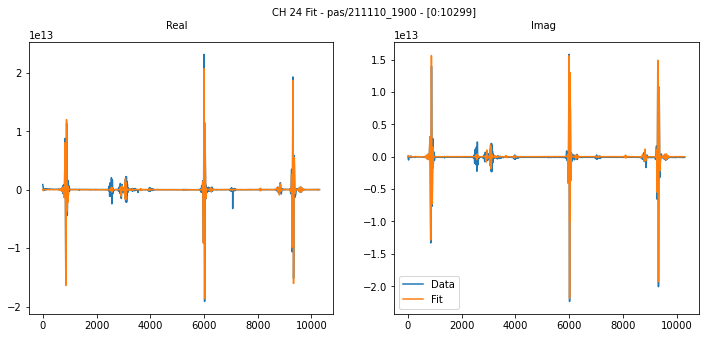

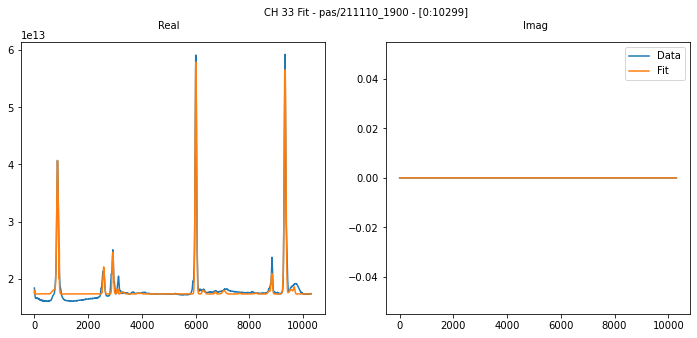

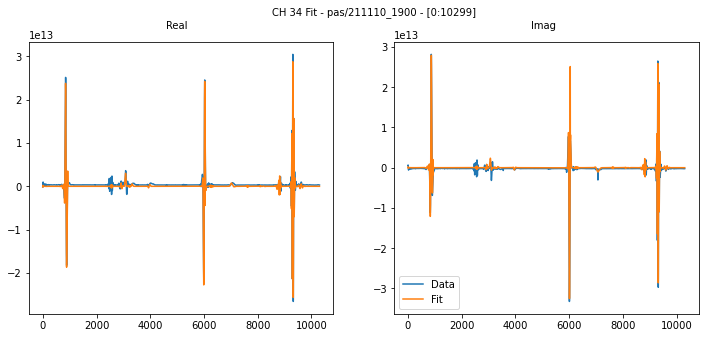

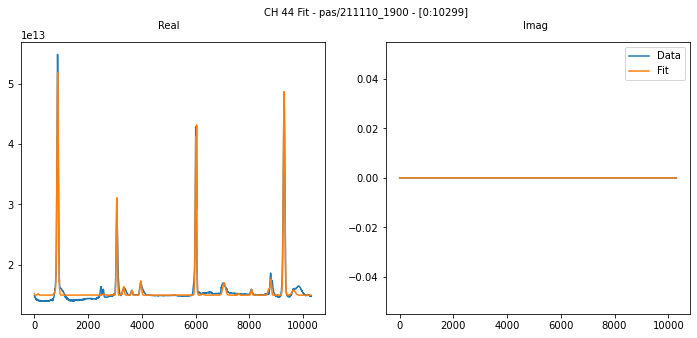

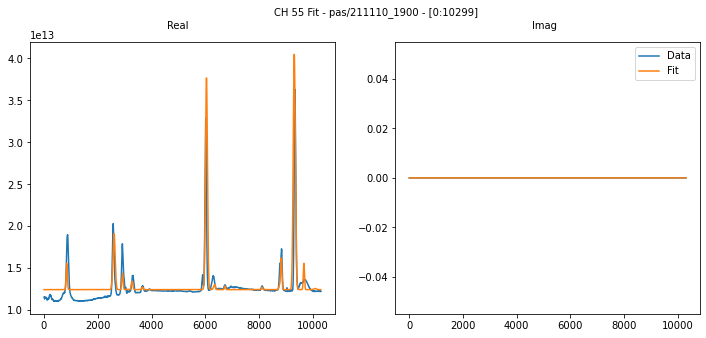

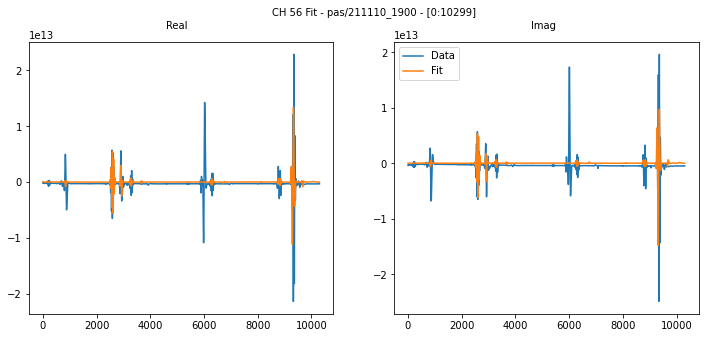

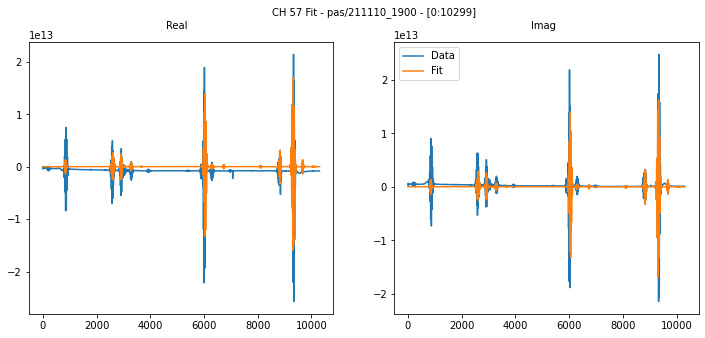

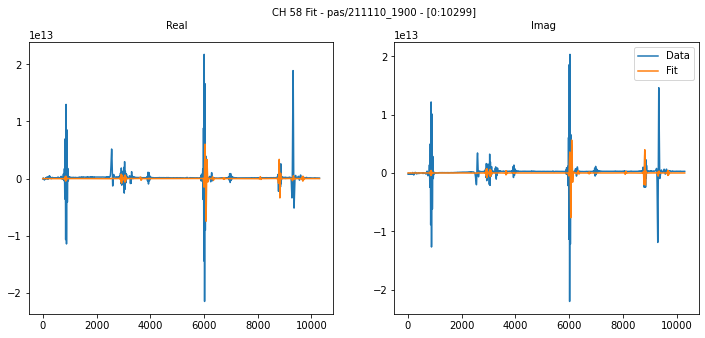

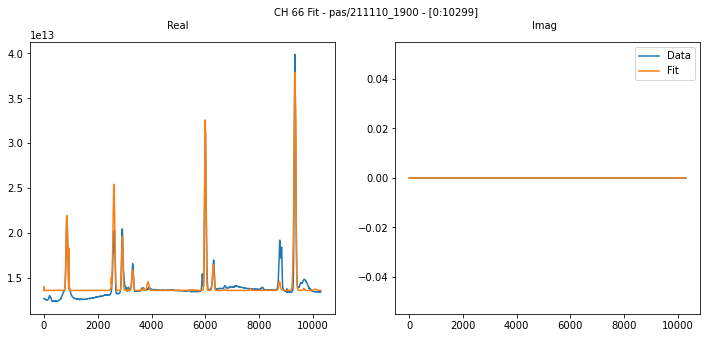

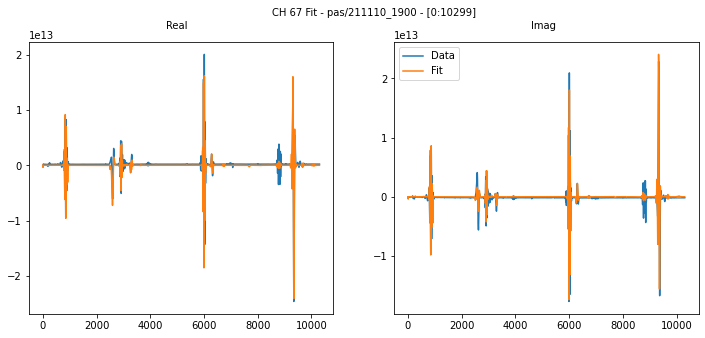

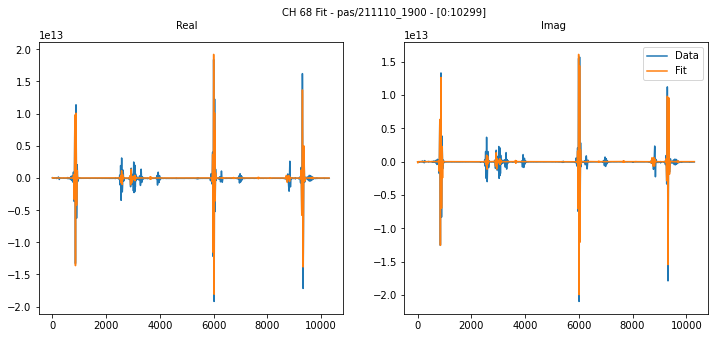

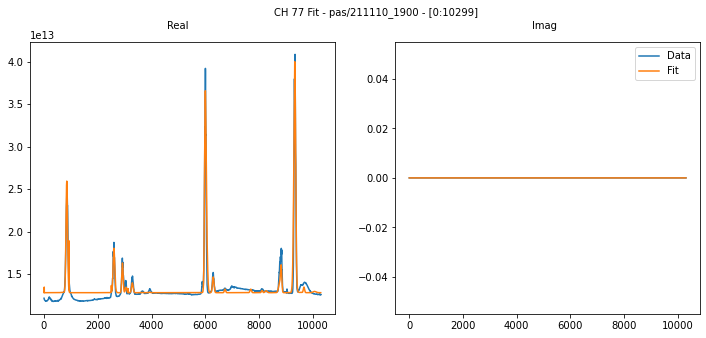

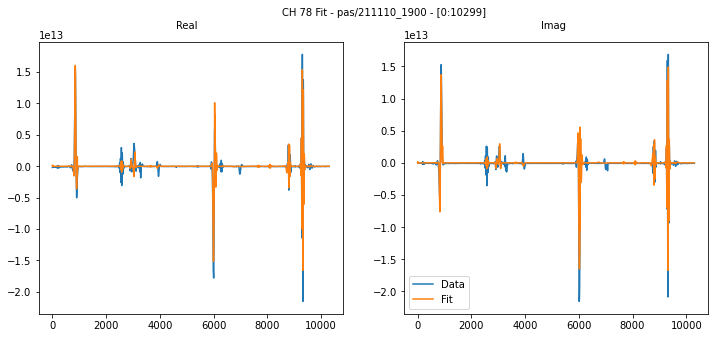

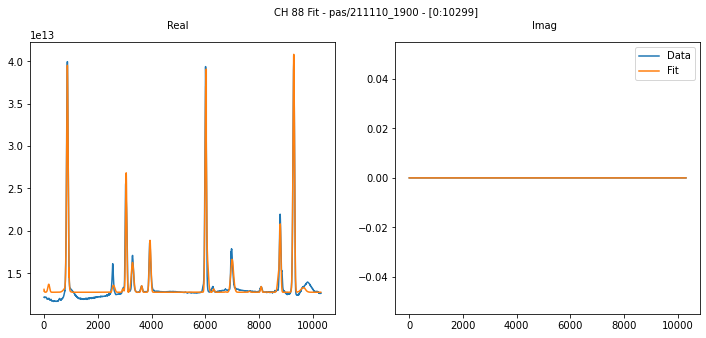

In [476]:
#Loads data and TheoryPredictor class from file in fits folder

fileIn = 'fits/Good15Days/OUTout.211222_1600Copy.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data
cut=[]
#cut = [0,6500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

fit211222meanarraydat, fit211222meanarrayfit=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)



pas/211222_1600


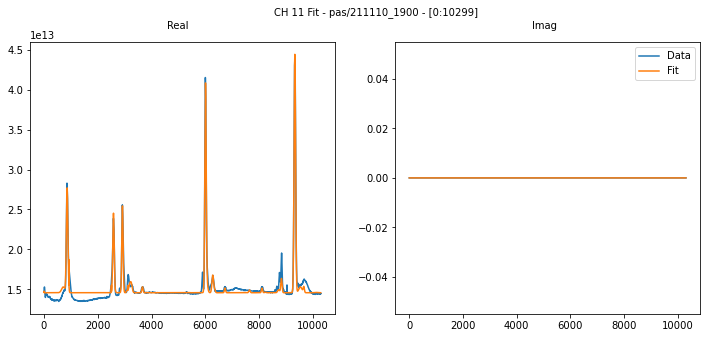

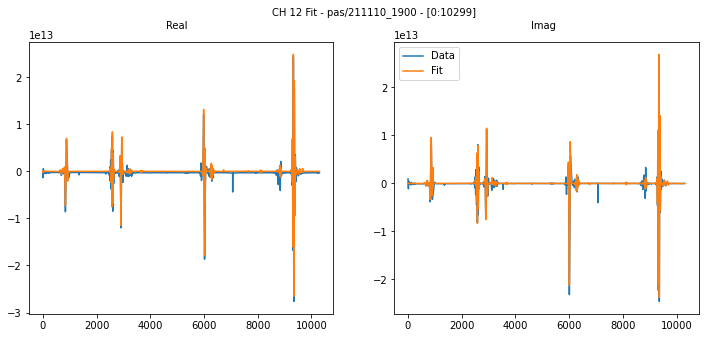

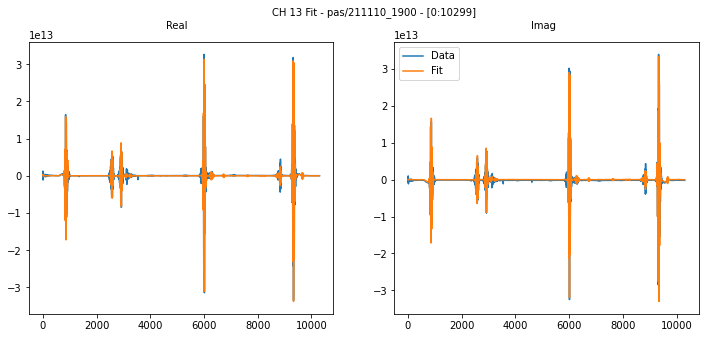

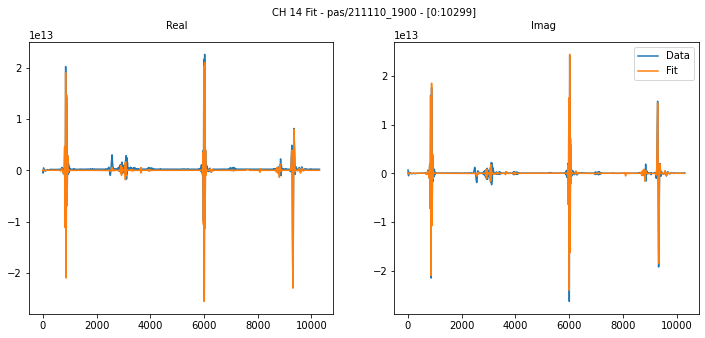

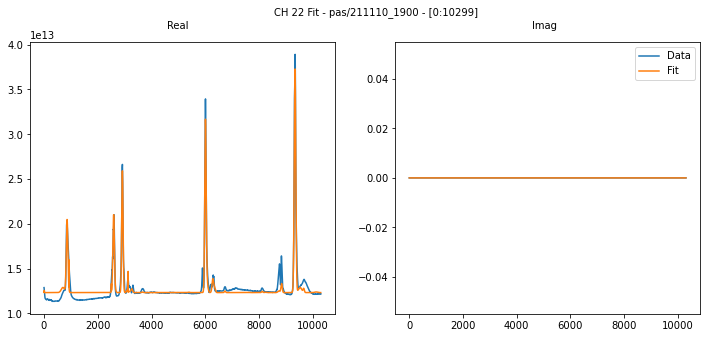

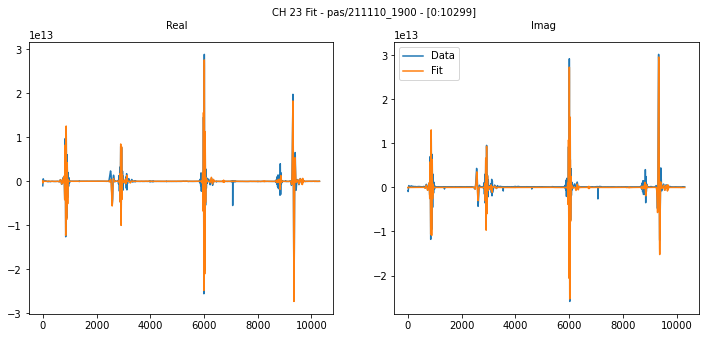

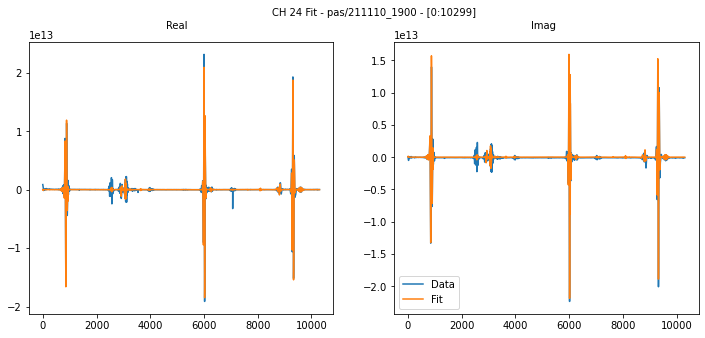

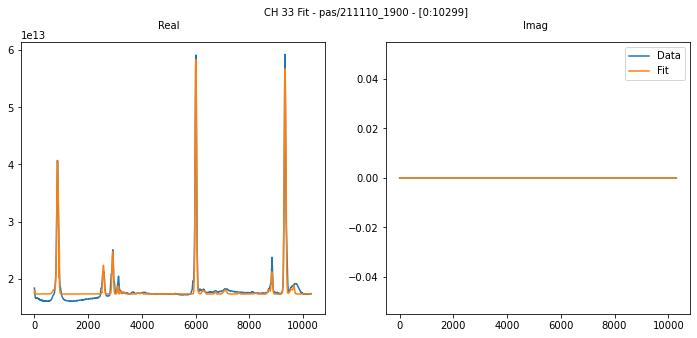

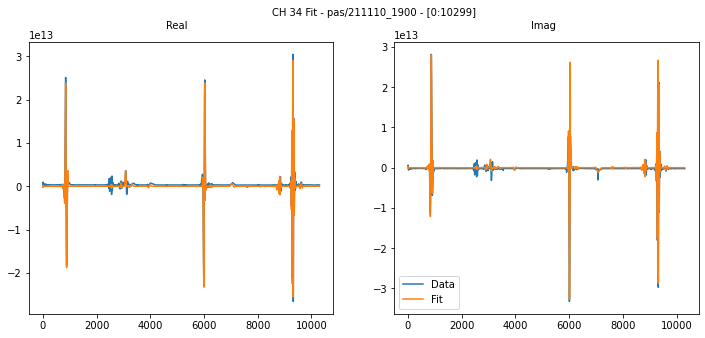

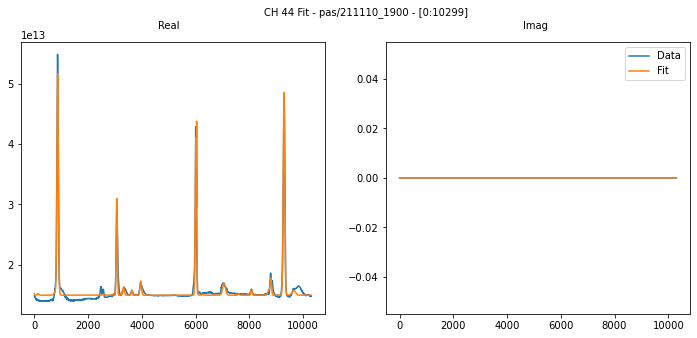

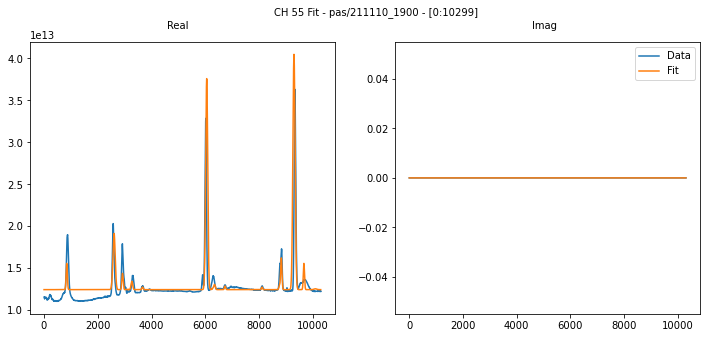

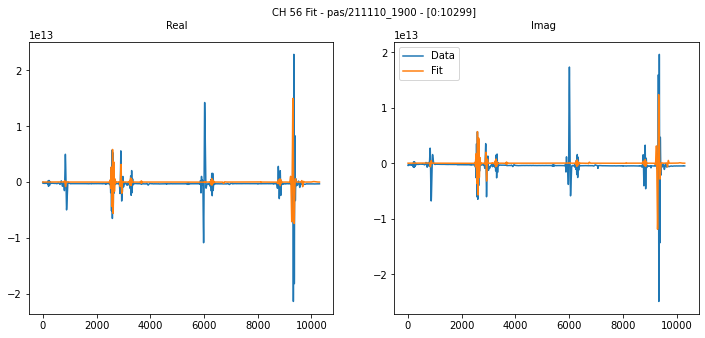

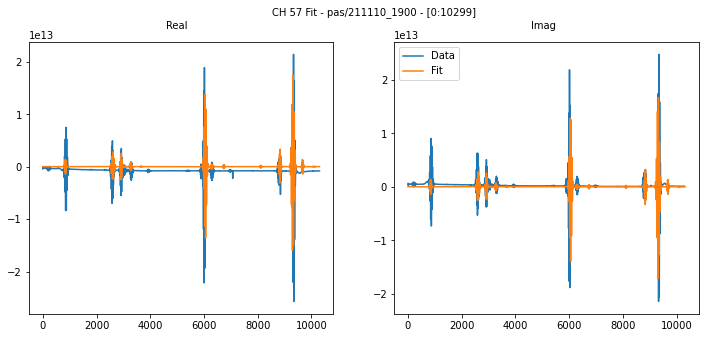

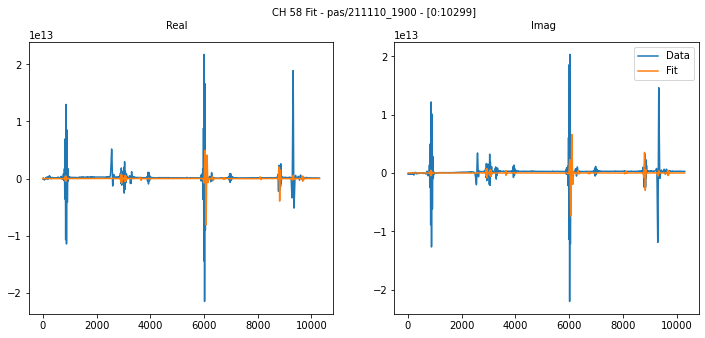

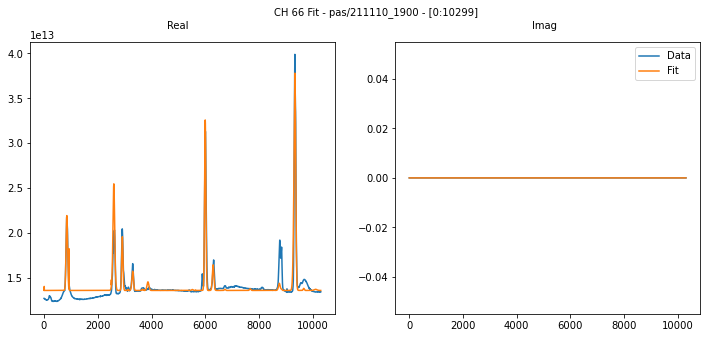

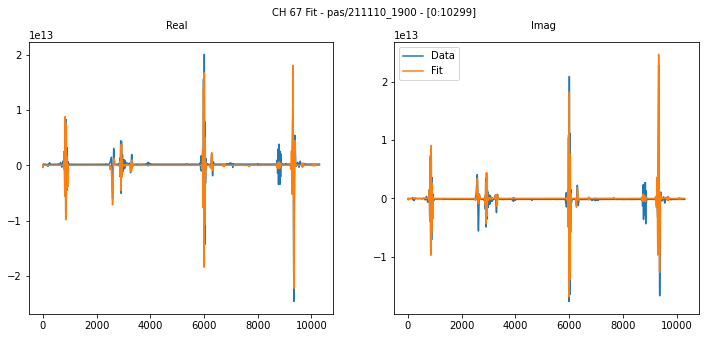

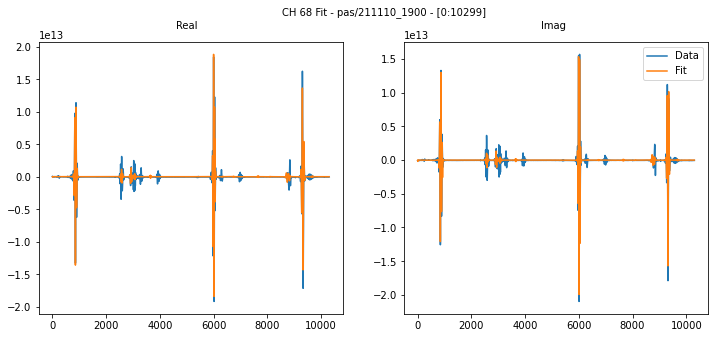

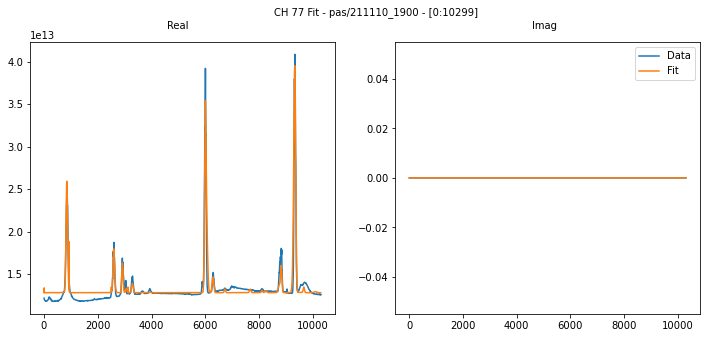

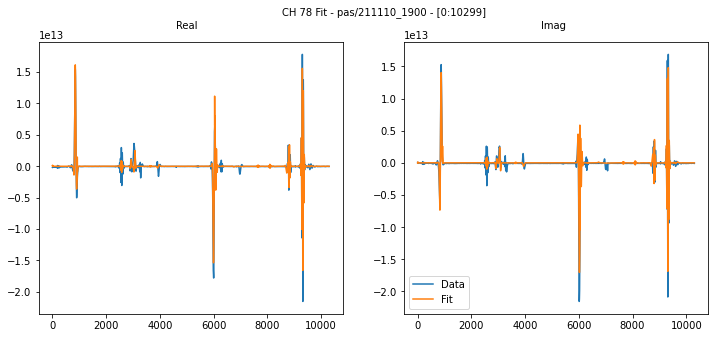

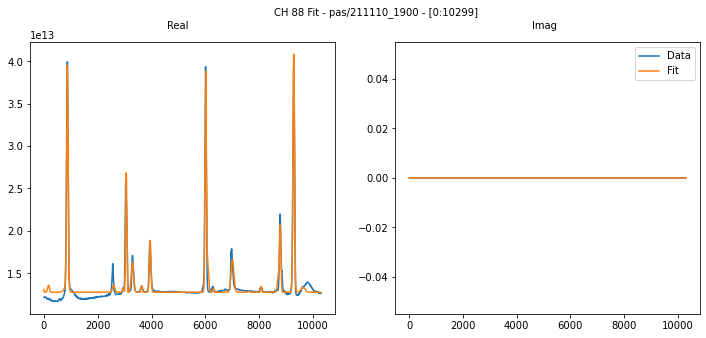

In [478]:
#Loads data and TheoryPredictor class from file in fits folder

fileIn = 'fits/Good15Days/MEDIANOUTout-Copy1.211222_1600Copy.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data
cut=[]
#cut = [0,6500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

fit211222medianarraydat, fit211222medianarrayfit=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)



pas/211222_1600


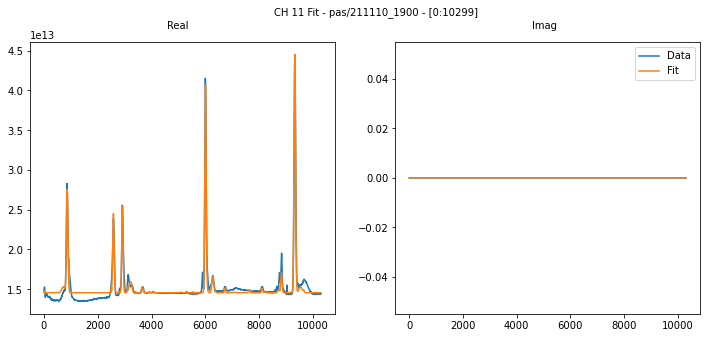

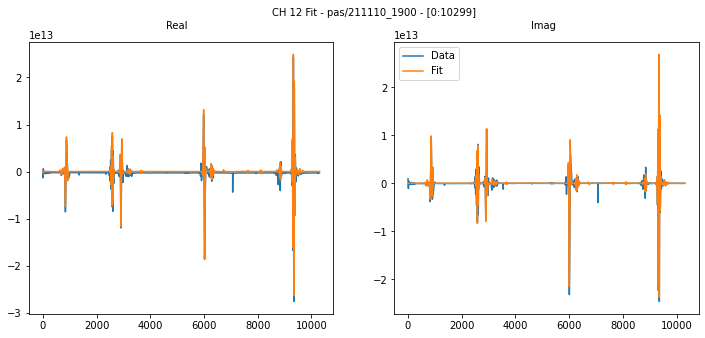

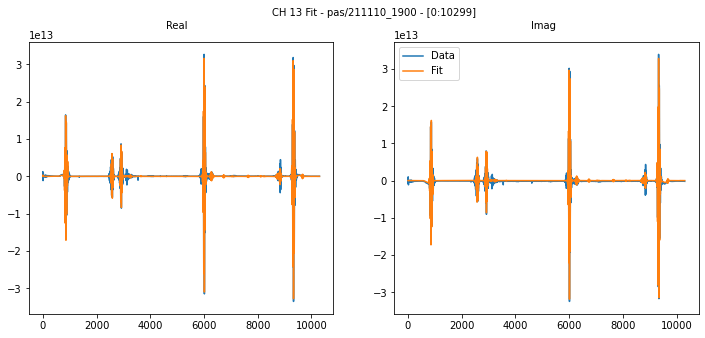

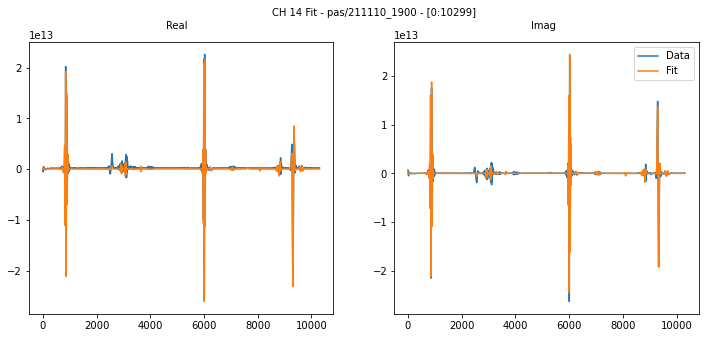

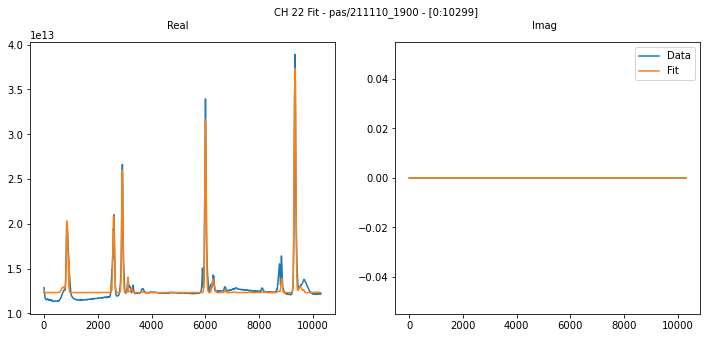

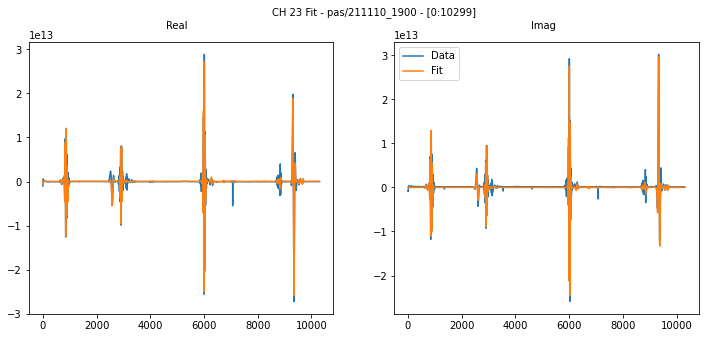

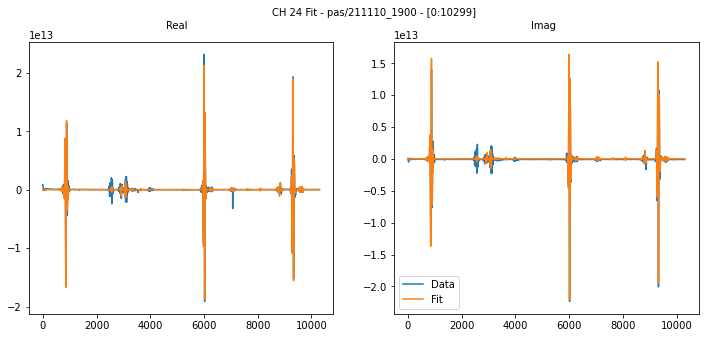

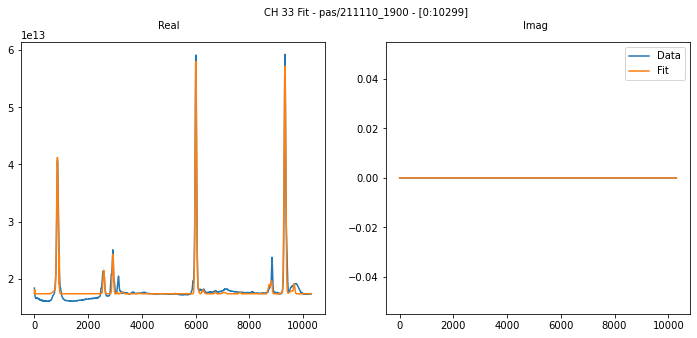

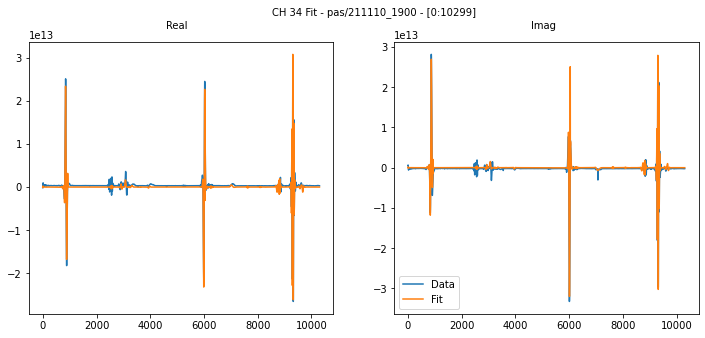

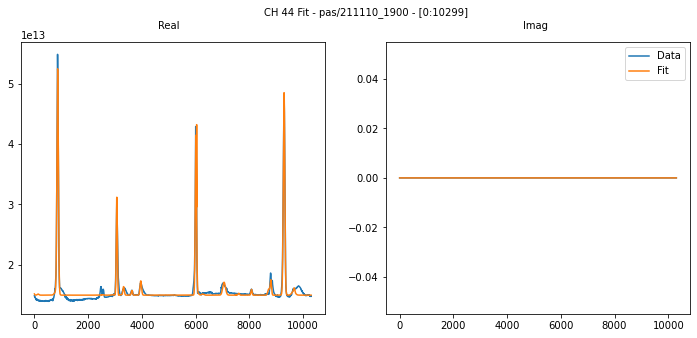

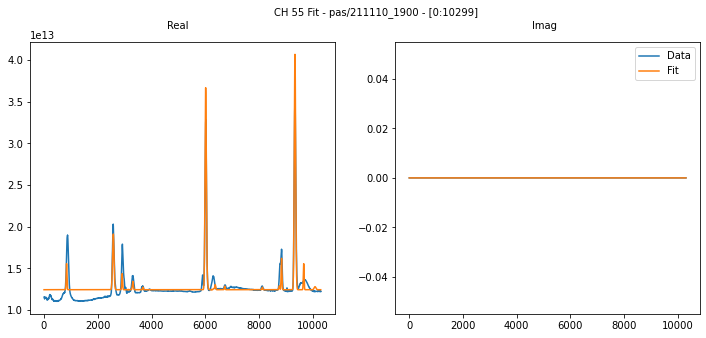

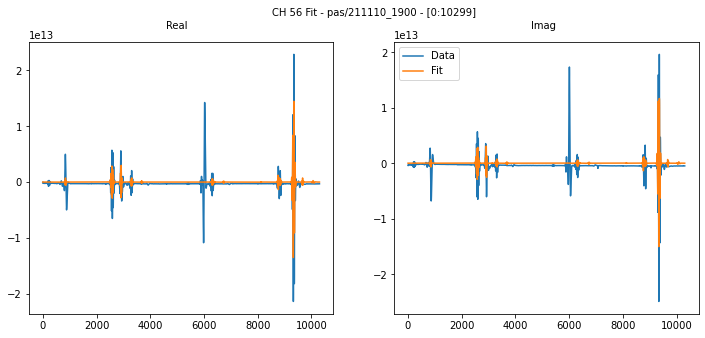

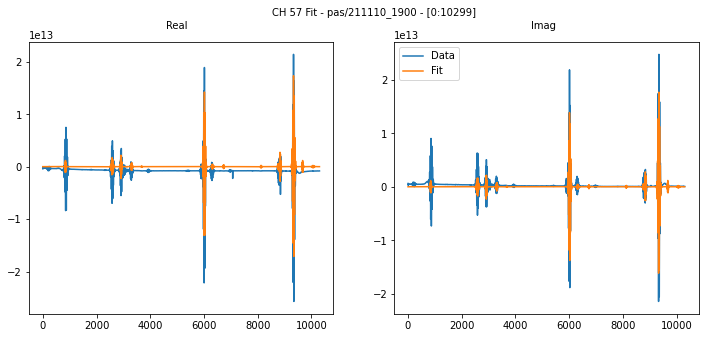

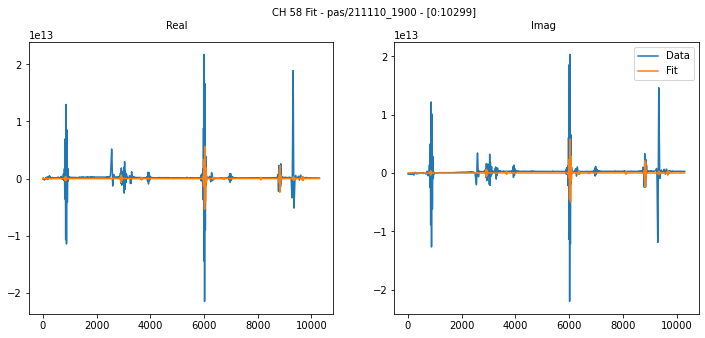

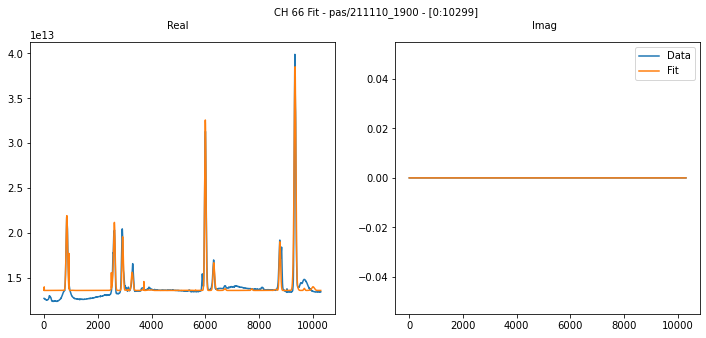

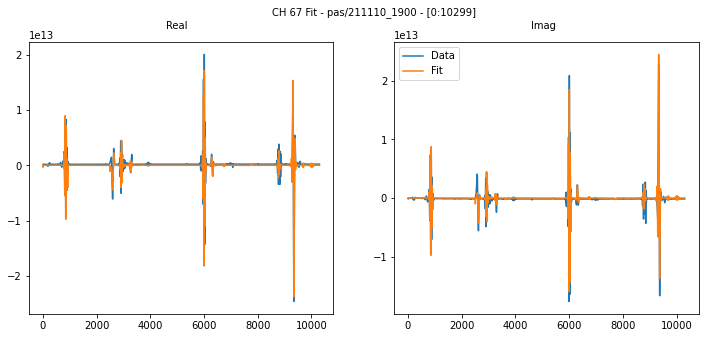

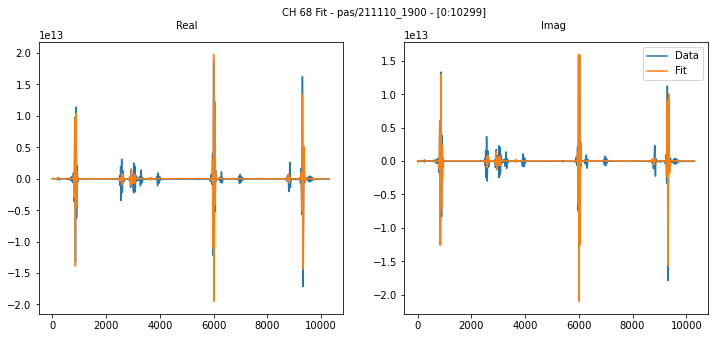

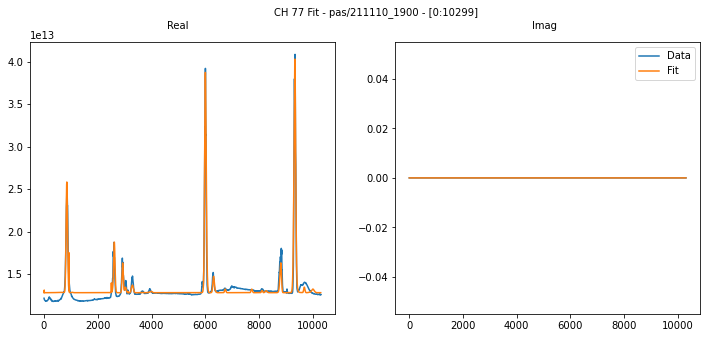

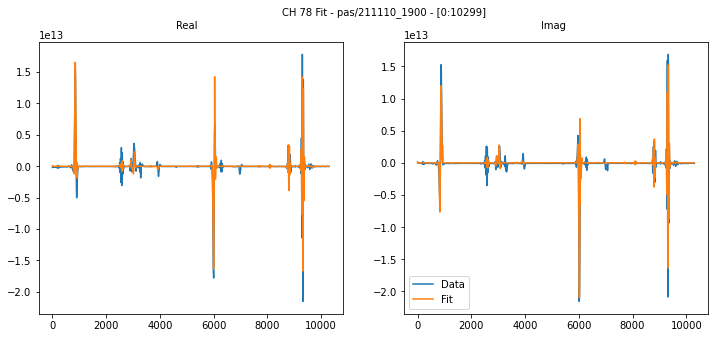

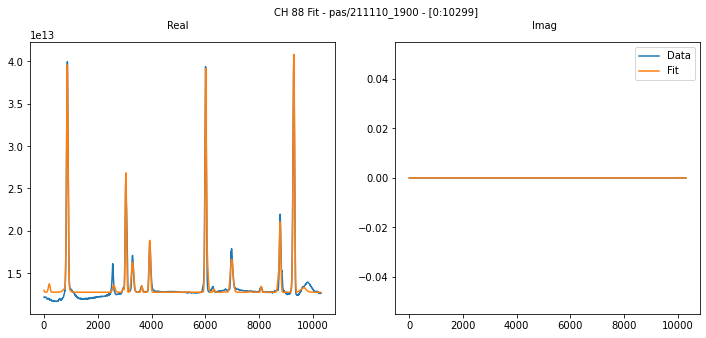

In [484]:
#Loads data and TheoryPredictor class from file in fits folder

fileIn = 'fits/out.211222_1600.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data
cut=[]
#cut = [0,6500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

fit211222arraydat, fit211222arrayfit=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)



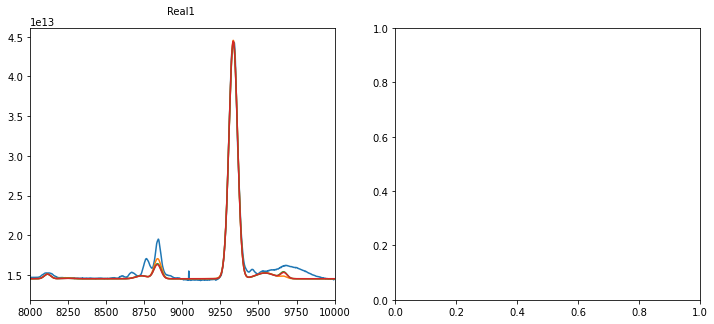

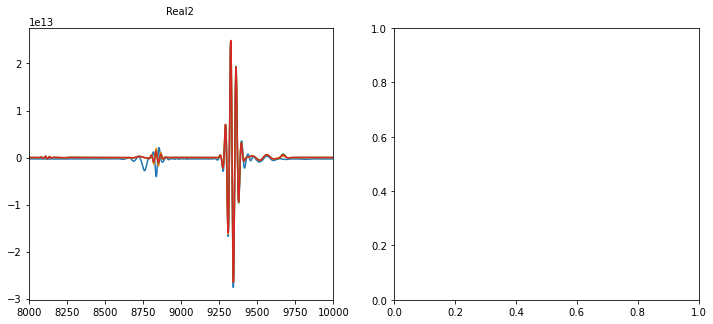

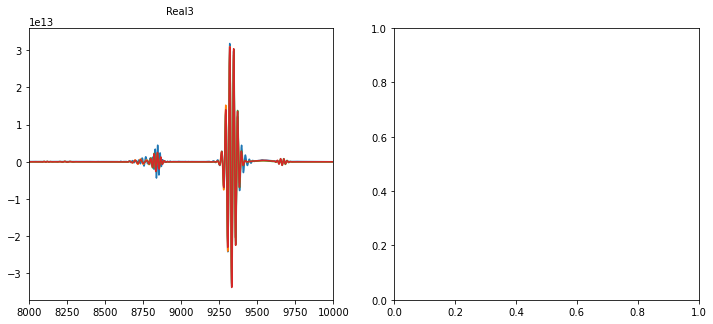

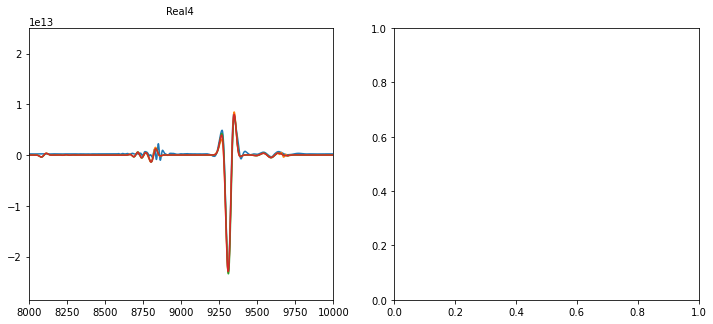

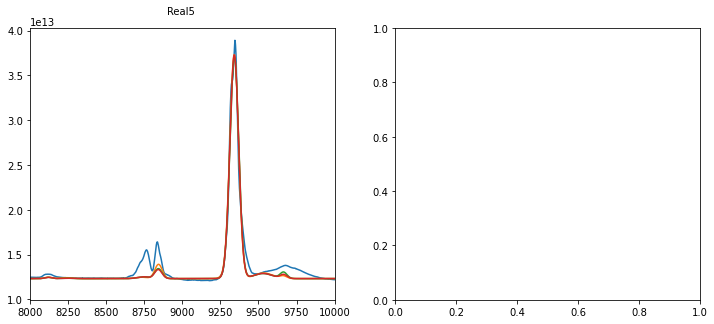

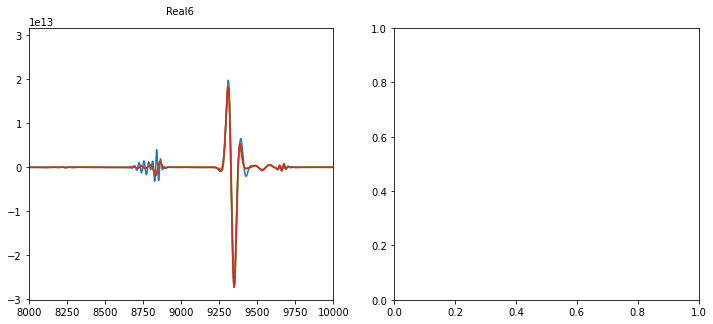

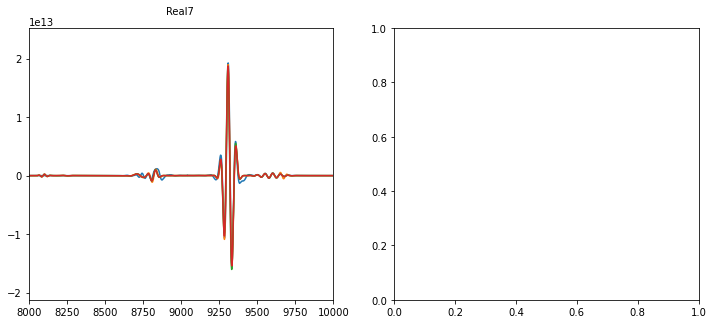

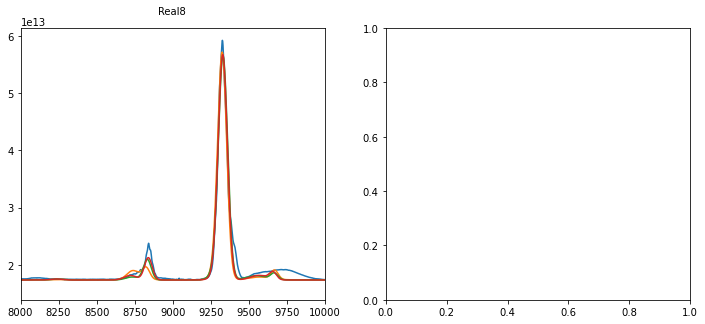

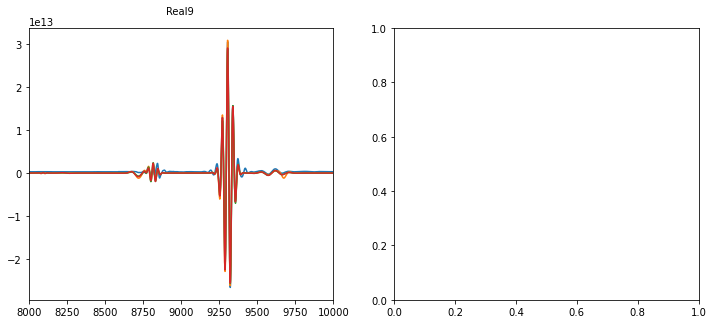

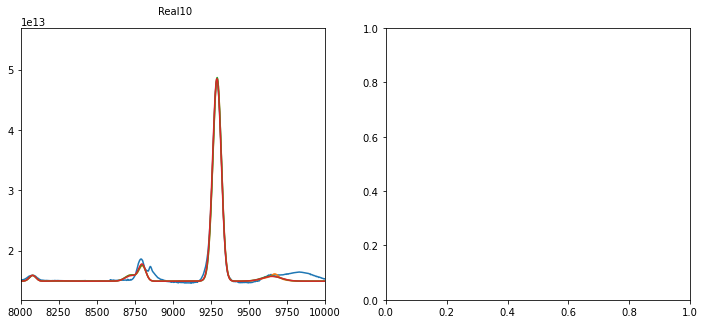

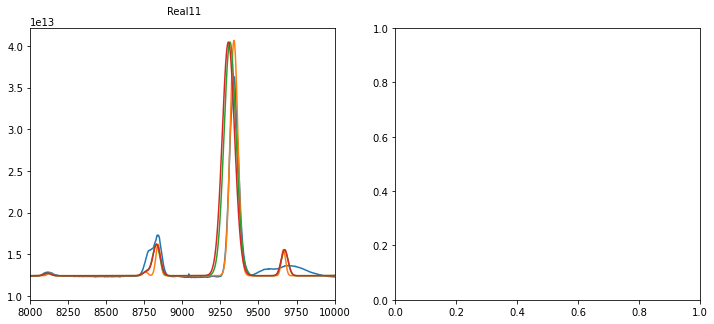

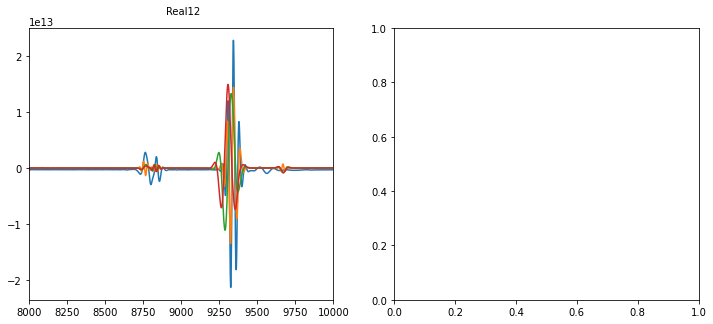

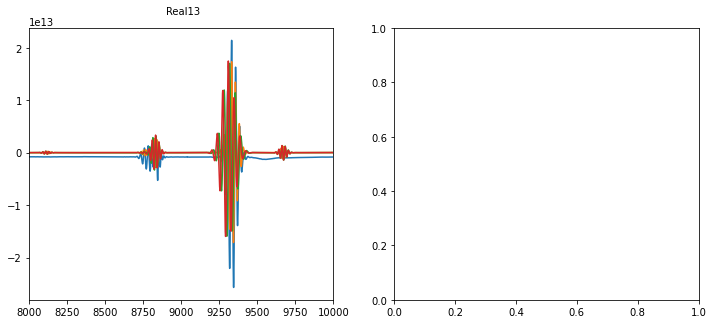

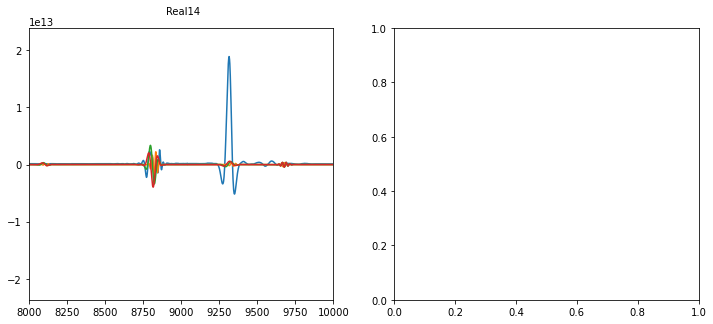

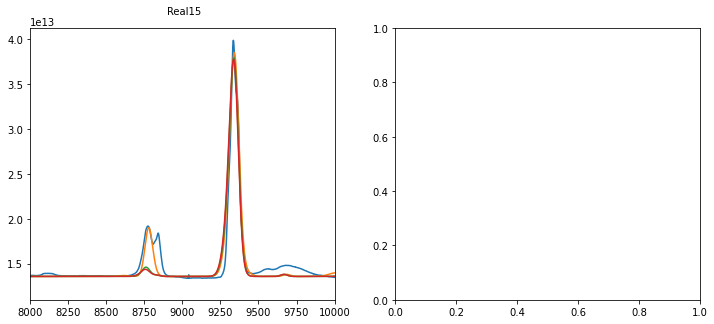

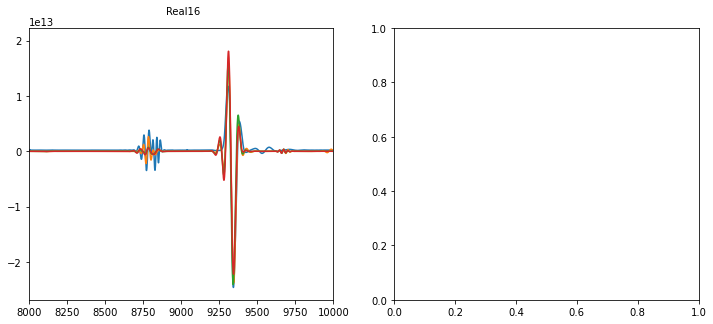

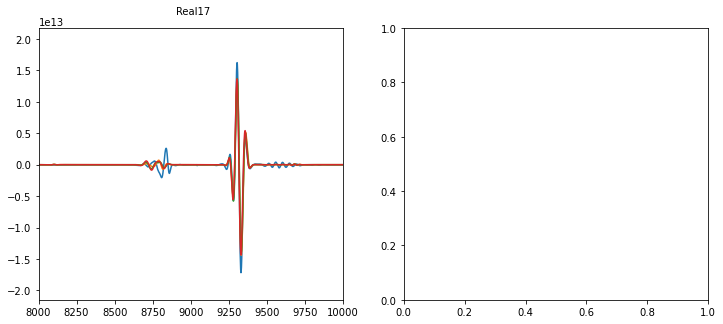

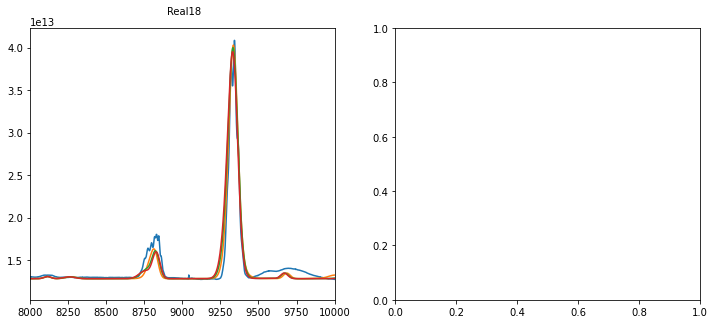

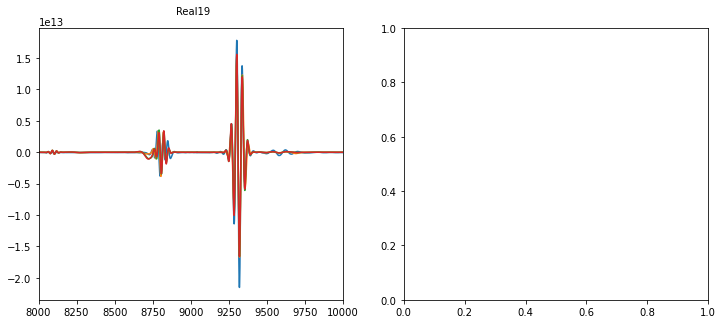

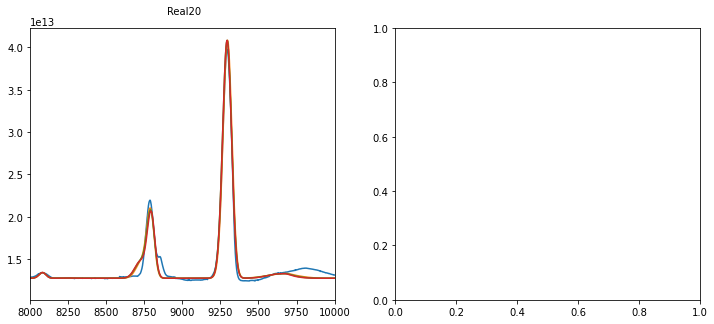

In [497]:
for i in range(len(fit211222meanarraydat)):
            fig = plt.figure(figsize = (12,5))
            axes = fig.subplots(ncols=2)
            axes[0].plot(fit211222arraydat[i].real,label='Data')
            axes[0].plot(fit211222arrayfit[i].real,label='Fit')
            axes[0].plot(fit211222meanarrayfit[i].real,label='Mean Fit')
            axes[0].plot(fit211222medianarrayfit[i].real,label='Median Fit')
            axes[0].set_xlim([8000,10000])
            axes[0].text(0.45,1.05,'Real' + str(i+1), transform=axes[0].transAxes)
            
            #fit211222meanarraydat, fit211222meanarrayfit

In [ ]:
#211222 Original
'D1_pos_x': 0.0, 'D1_pos_y': 4.4, 'D1_phi_0': 0.0, 'D1_beam_center_x': 0.008301710008250014, 'D1_beam_center_y': -0.013697518387259683, 'D1_beam_sigma_x': 0.05, 'D1_beam_sigma_y': 0.05, 'D1_beam_smooth_x': 0.045147460879802585, 'D1_beam_smooth_y': 0.044589507958614445
'D5_pos_x': 0.0, 'D5_pos_y': 4.4, 'D5_phi_0': 0.0, 'D5_beam_center_x': 0.026306706737360082, 'D5_beam_center_y': -0.03553818273680069, 'D5_beam_sigma_x': 0.05, 'D5_beam_sigma_y': 0.05, 'D5_beam_smooth_x': 0.03957341928075612, 'D5_beam_smooth_y': 0.026974482244965143


In [498]:
#211222 Mean
'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': 0.0, 'D1_beam_center_x': 0.008679212037492683, 'D1_beam_center_y': -0.013876593278946997, 'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001, 'D1_beam_smooth_x': 0.04601279087693474, 'D1_beam_smooth_y': 0.044629782872035936,
'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 0.0, 'D5_beam_center_x': 0.010490218027928645, 'D5_beam_center_y': -0.01707206806570743, 'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001, 'D5_beam_smooth_x': 0.05514680656176164, 'D5_beam_smooth_y': 0.042272243332856924,



In [499]:
#Median
'D1_pos_x': 0.0, 'D1_pos_y': 4.4, 'D1_phi_0': 0.0, 'D1_beam_center_x': 0.00956948093007691, 'D1_beam_center_y': -0.013625878015554474, 'D1_beam_sigma_x': 0.05, 'D1_beam_sigma_y': 0.05, 'D1_beam_smooth_x': 0.046515558494951634, 'D1_beam_smooth_y': 0.044252643028794725
'D5_pos_x': 0.0, 'D5_pos_y': 4.4, 'D5_phi_0': 0.0, 'D5_beam_center_x': 0.012847496064932087, 'D5_beam_center_y': -0.013846507707756344, 'D5_beam_sigma_x': 0.05, 'D5_beam_sigma_y': 0.05, 'D5_beam_smooth_x': 0.05194497113738057, 'D5_beam_smooth_y': 0.04432622439432404



# RESIDUALS OF FITS

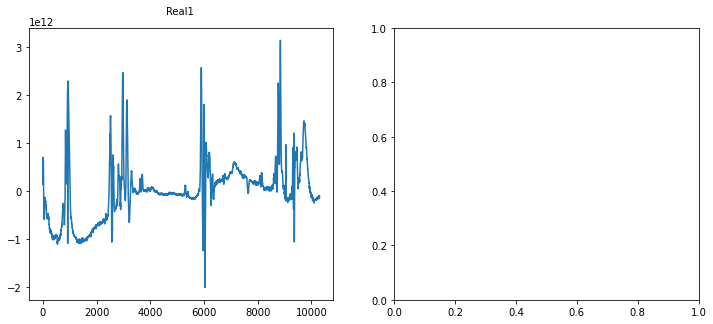

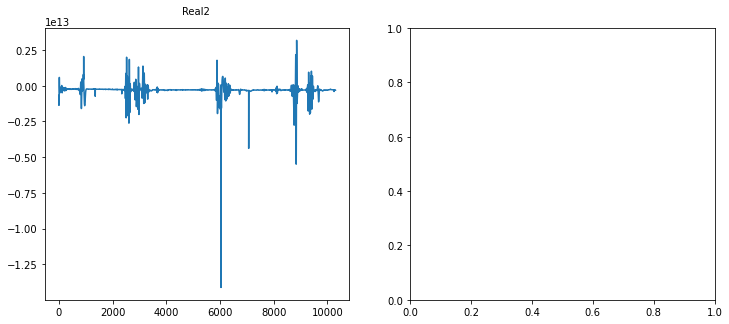

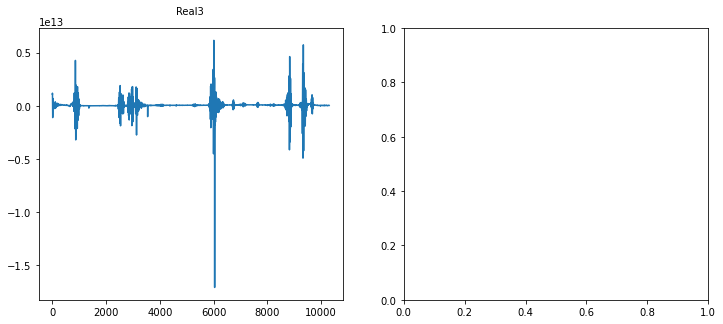

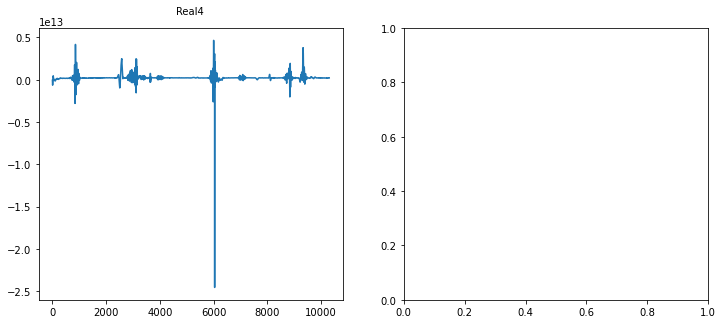

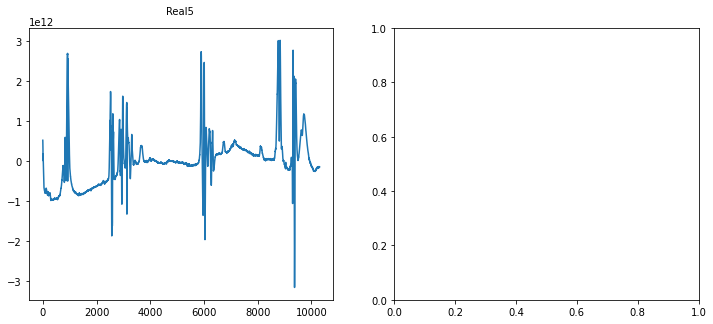

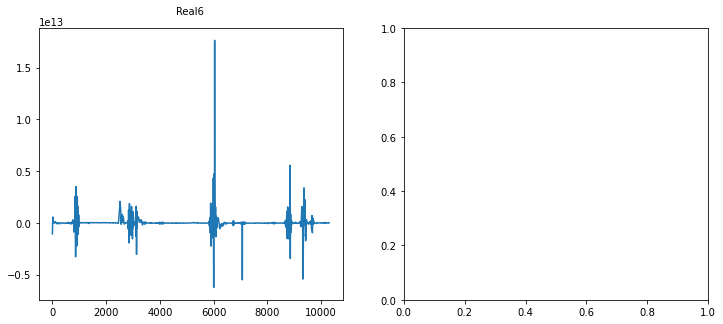

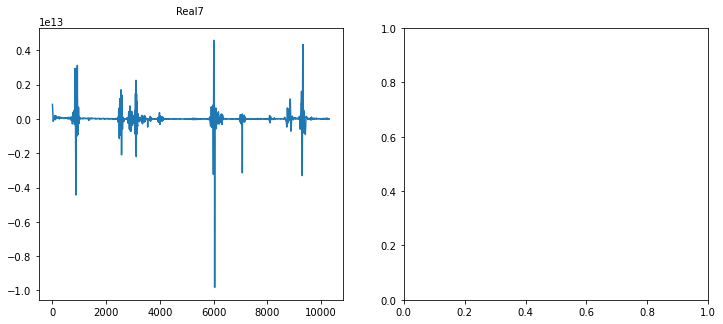

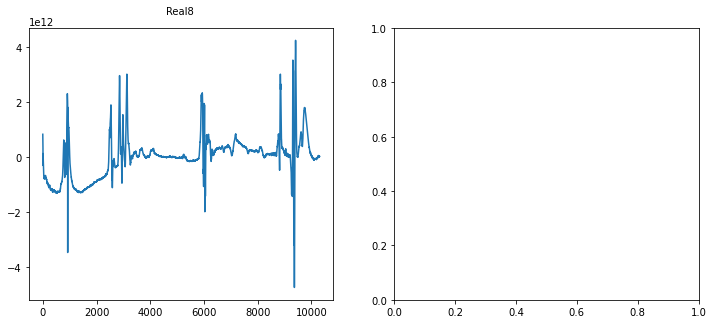

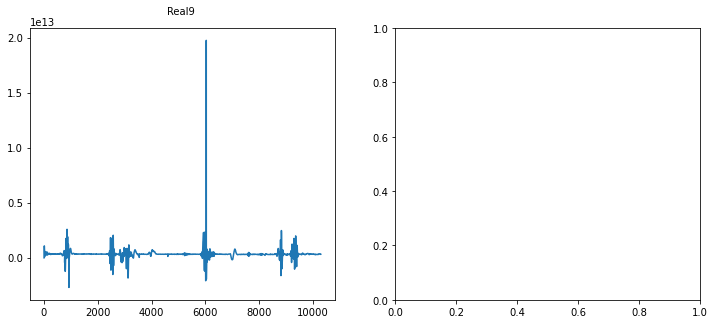

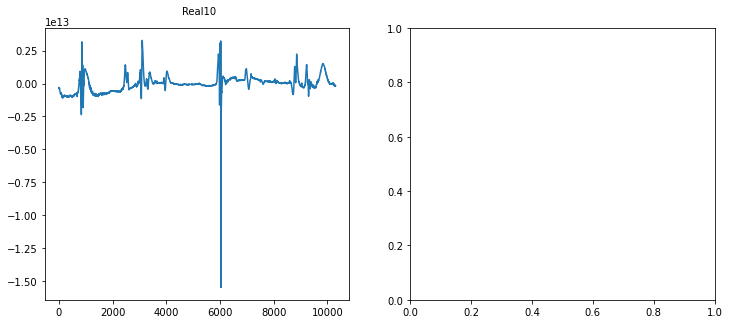

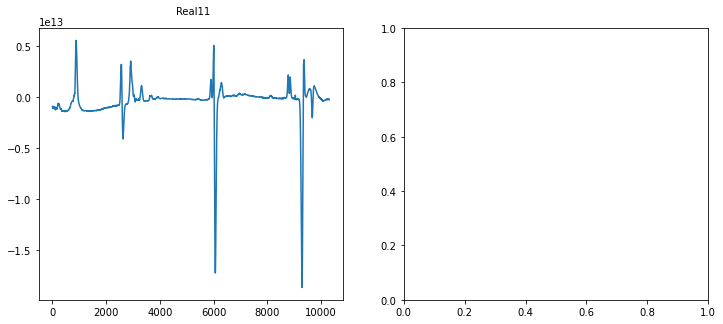

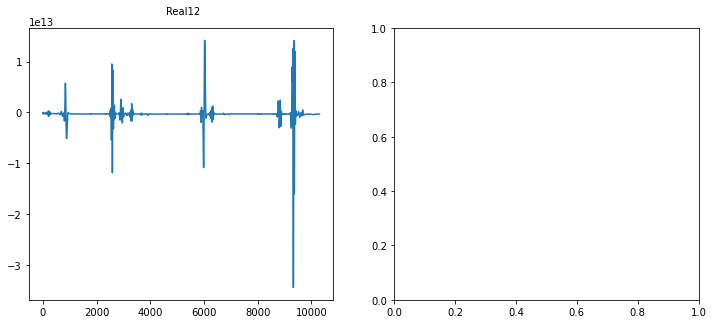

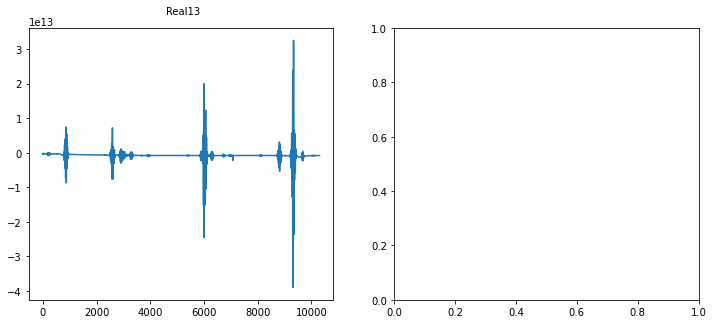

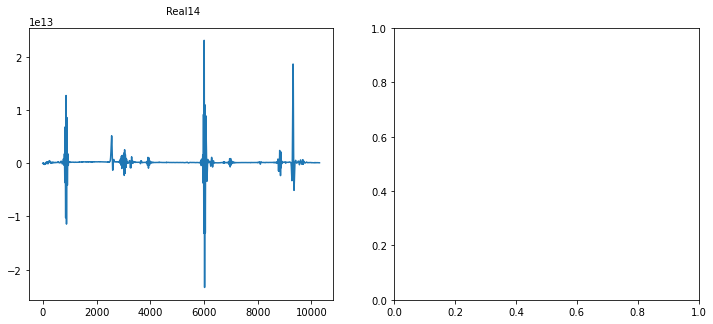

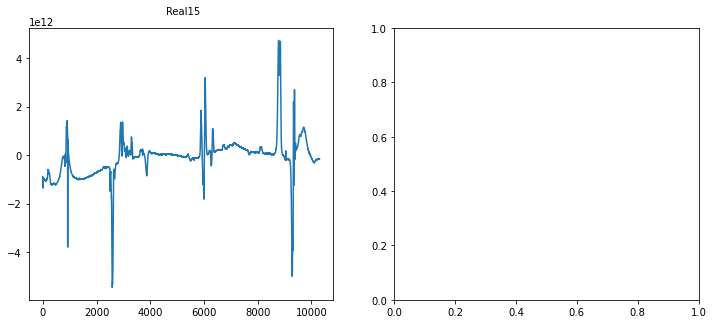

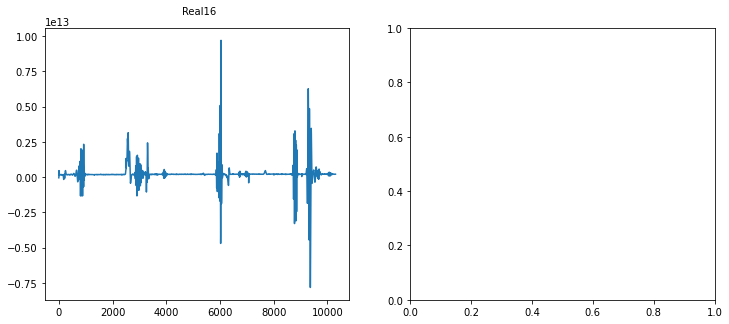

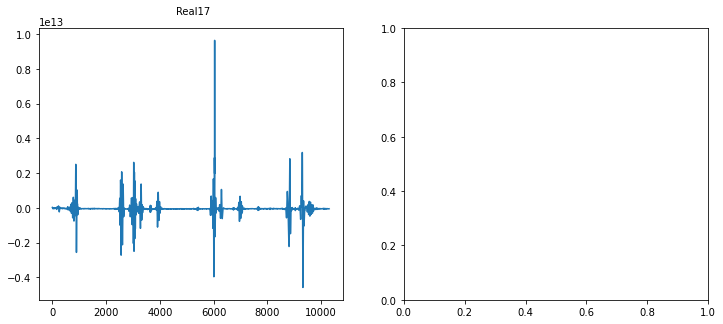

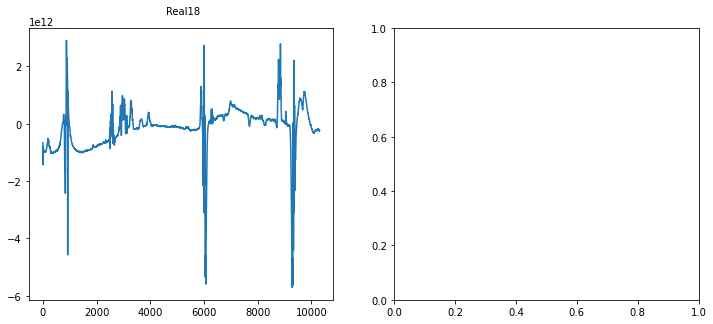

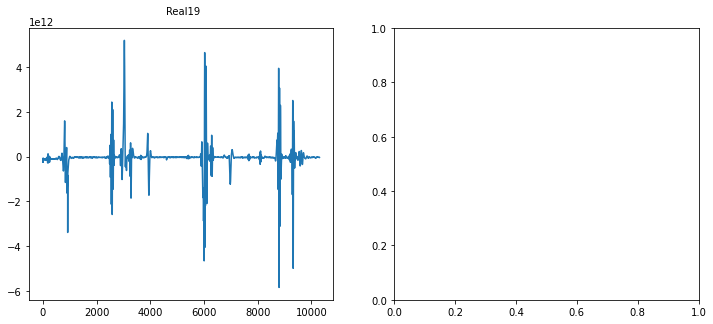

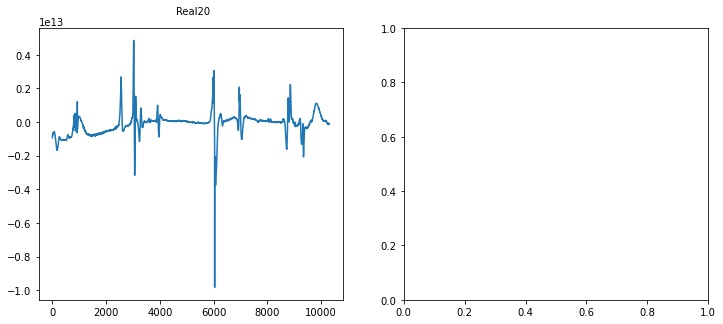

In [491]:
for i in range(len(fit211222meanarraydat)):
            fig = plt.figure(figsize = (12,5))
            axes = fig.subplots(ncols=2)
            axes[0].plot(fit211222meanarraydat[i].real-fit211222meanarrayfit[i].real,label='Residual')
            #axes[0].plot(fit211222meanarrayfit[i].real,label='Fit')
            axes[0].text(0.45,1.05,'Real' + str(i+1), transform=axes[0].transAxes)
            
            #fit211222meanarraydat, fit211222meanarrayfit

pas/211113_1900


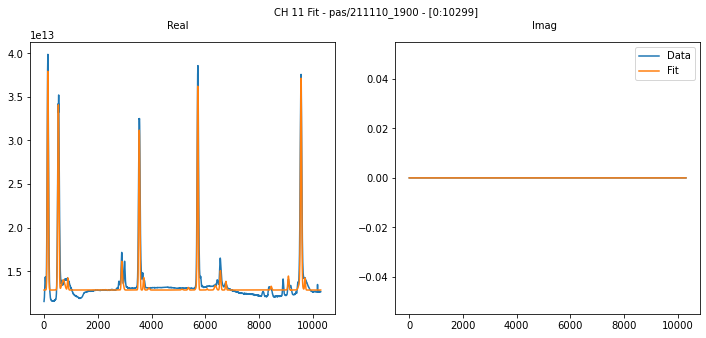

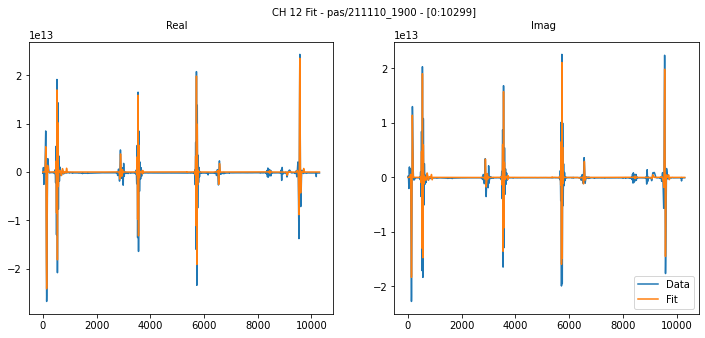

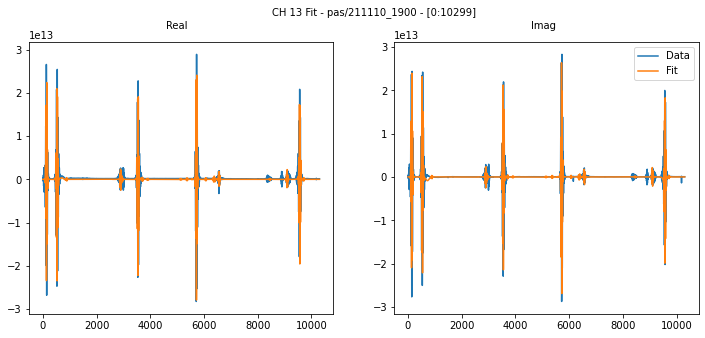

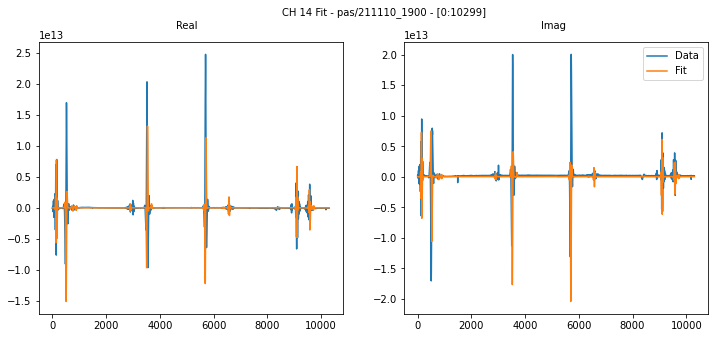

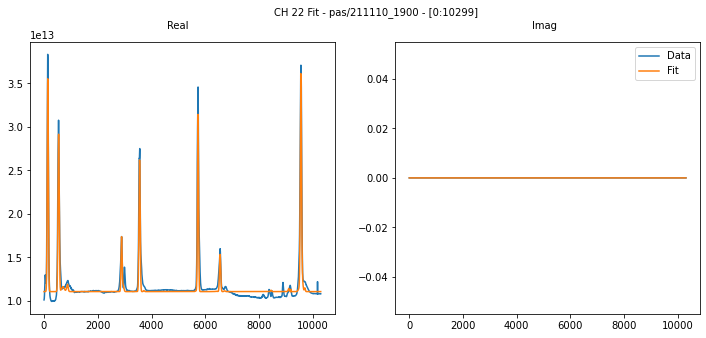

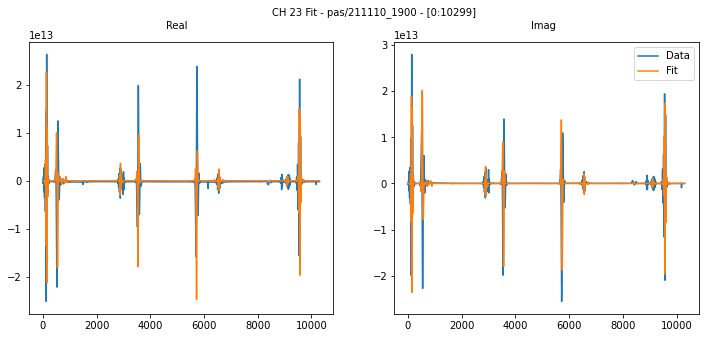

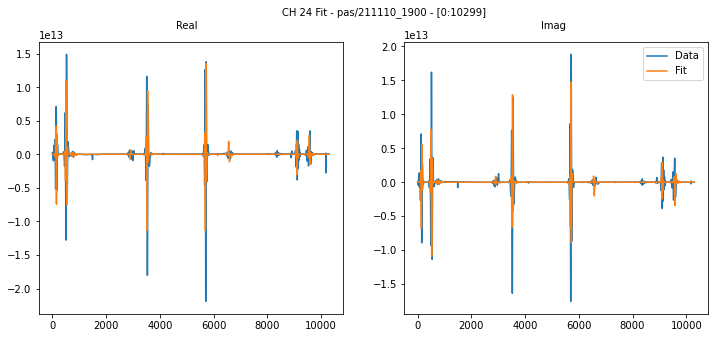

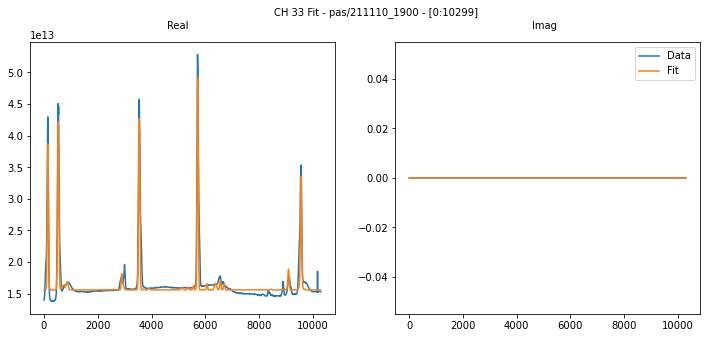

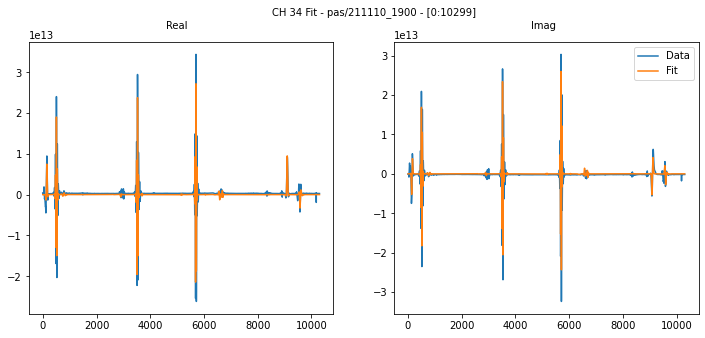

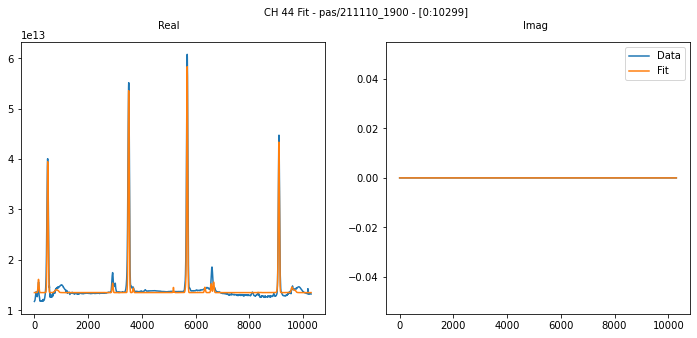

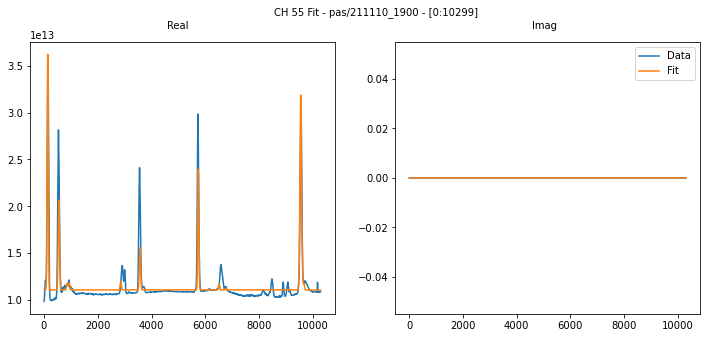

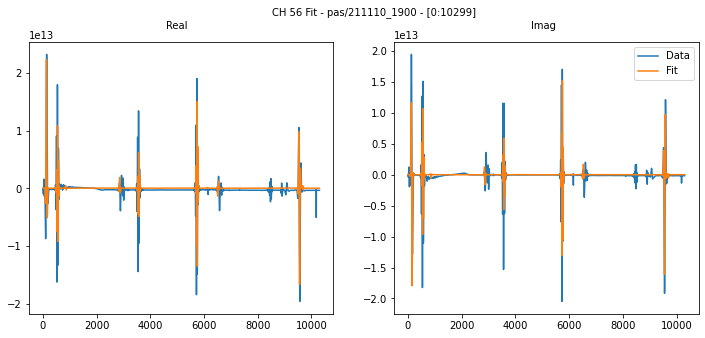

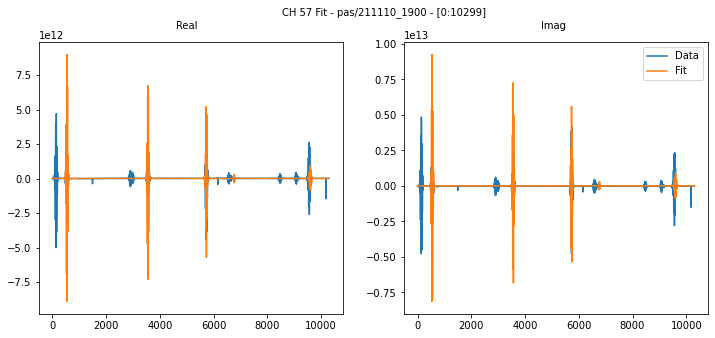

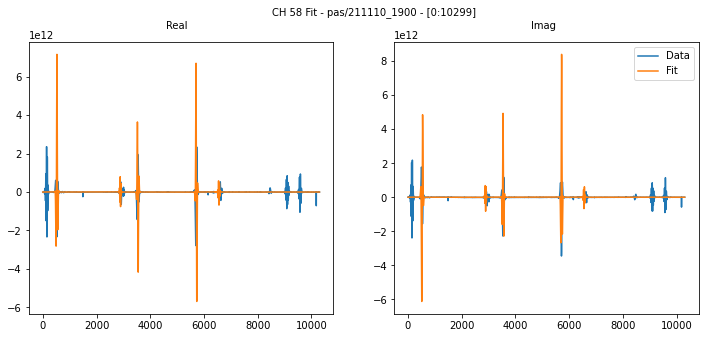

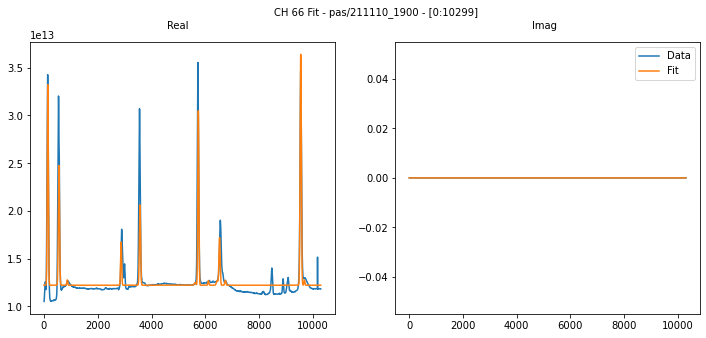

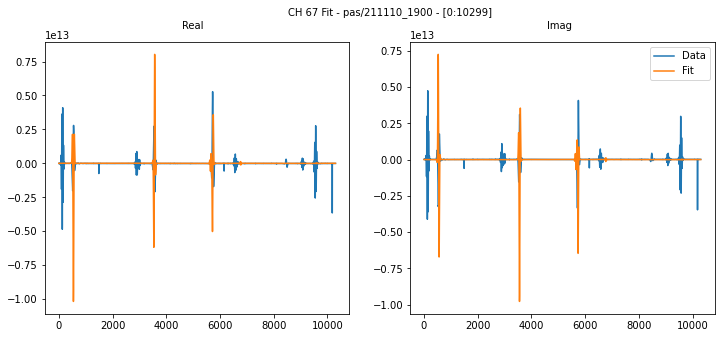

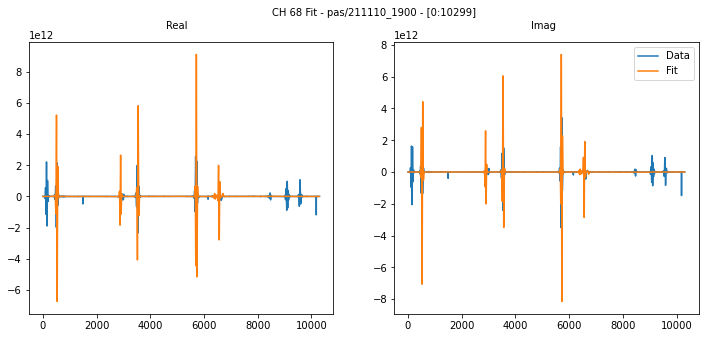

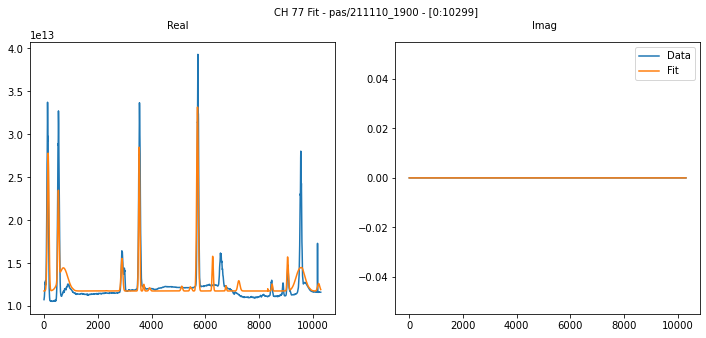

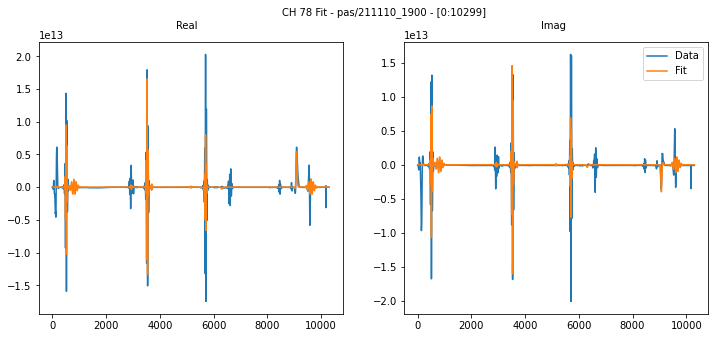

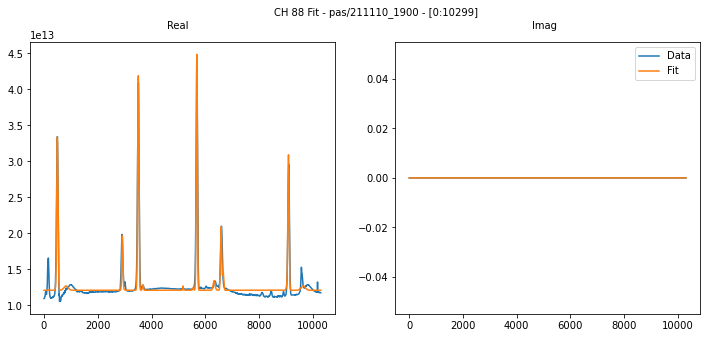

In [493]:
fileIn = 'fits/Good15Days/OUTout.211113_1900Copy.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data
cut=[]
#cut = [0,6500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

fit211113meanarraydat, fit211113meanarrayfit=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)

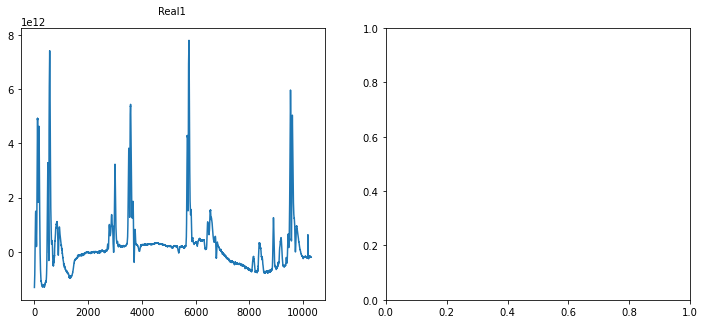

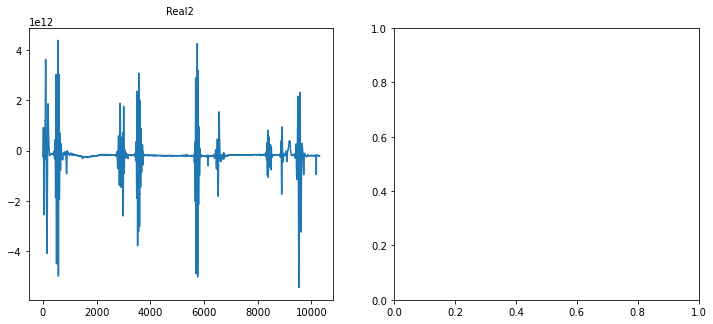

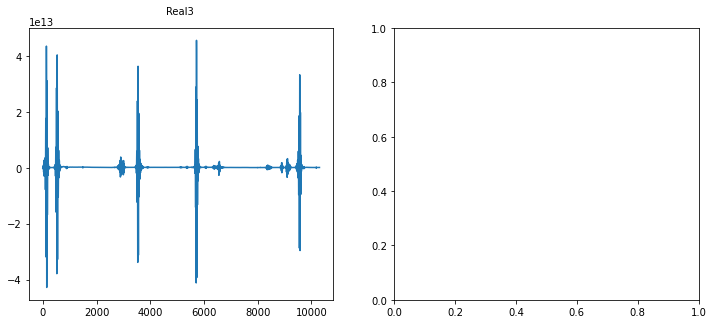

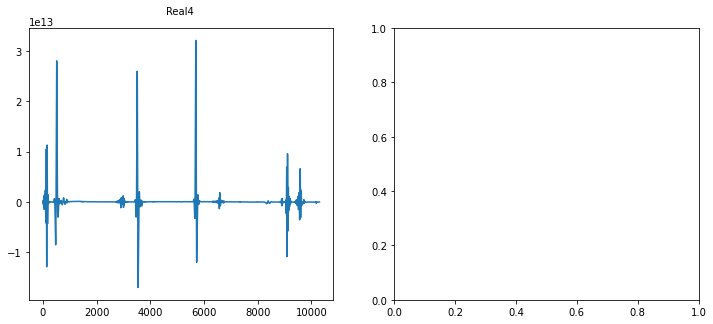

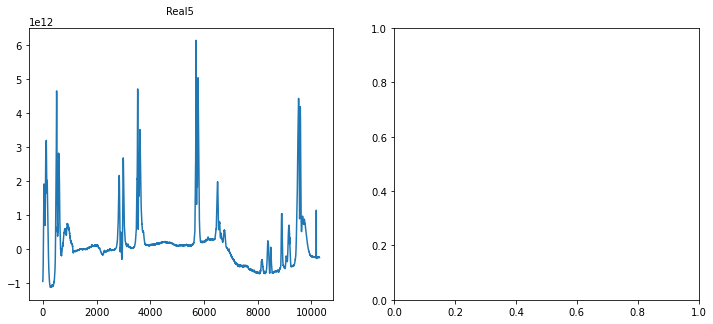

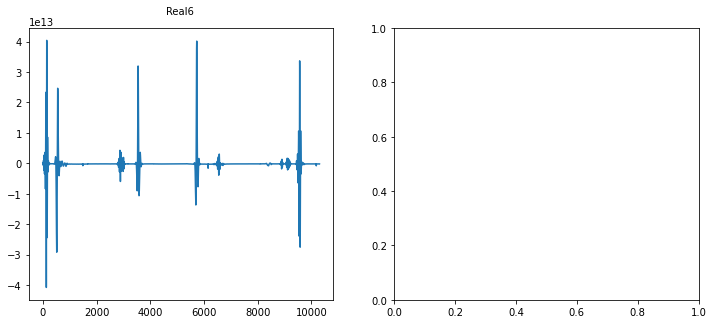

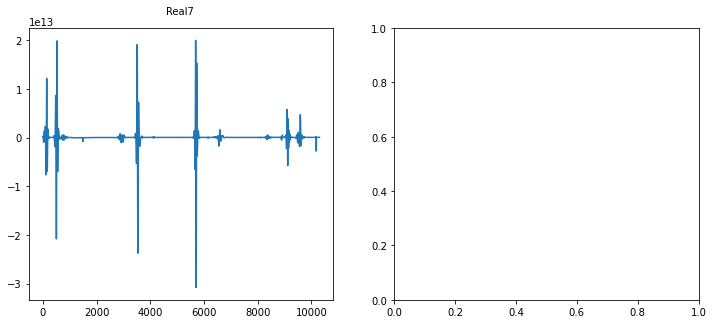

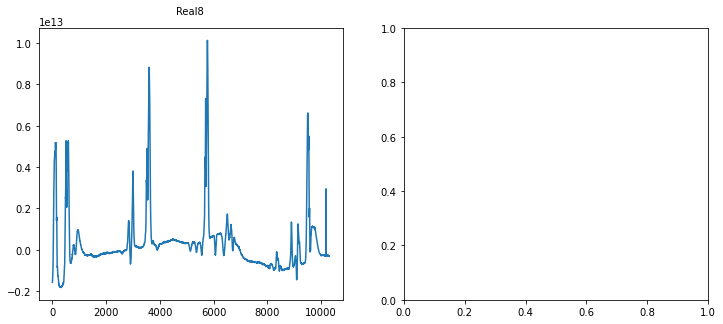

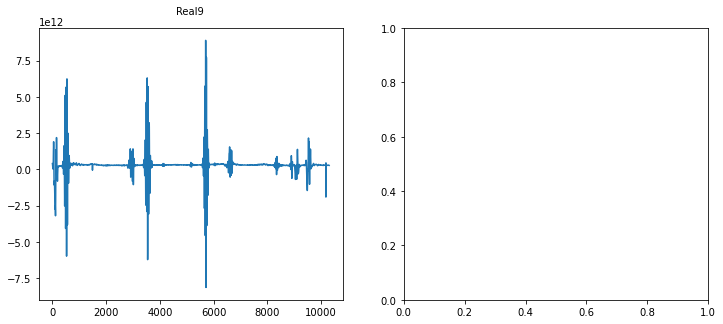

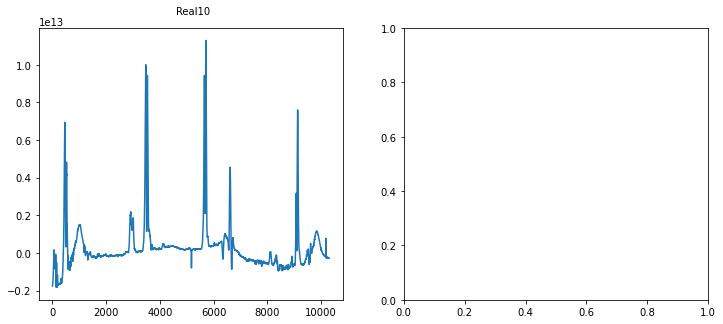

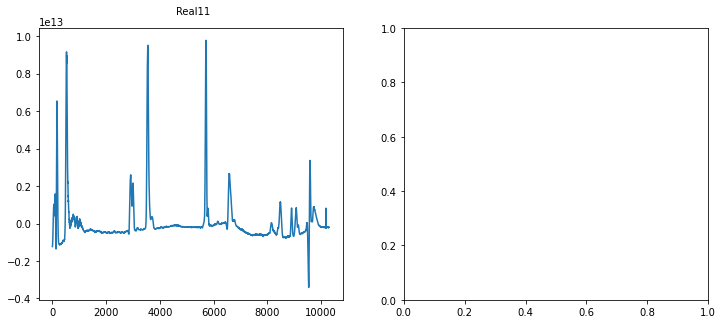

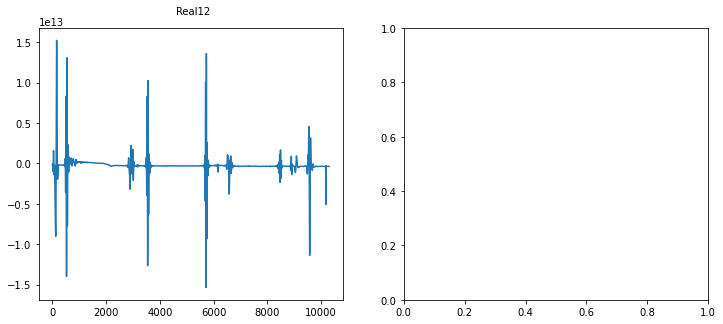

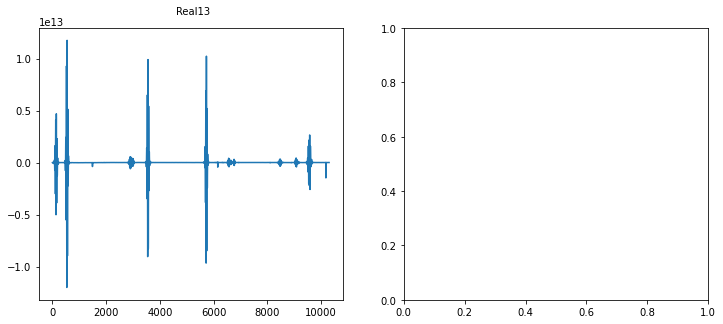

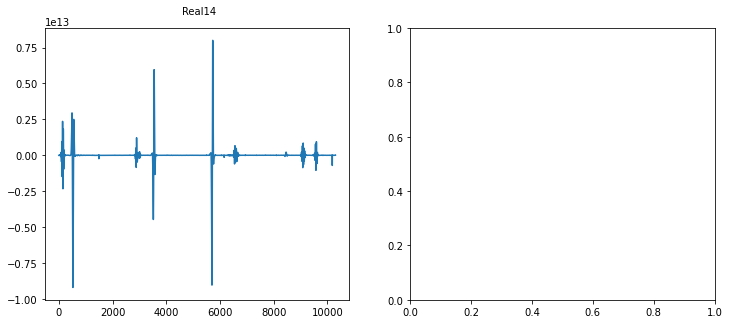

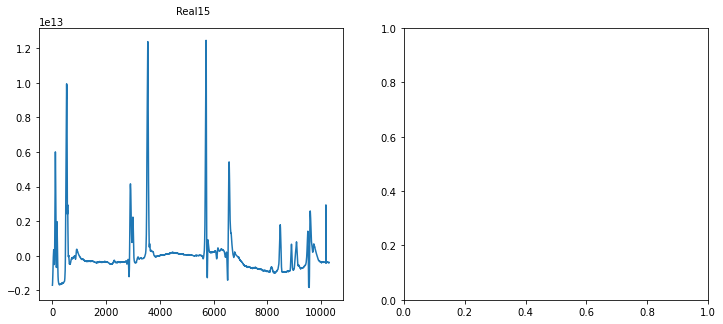

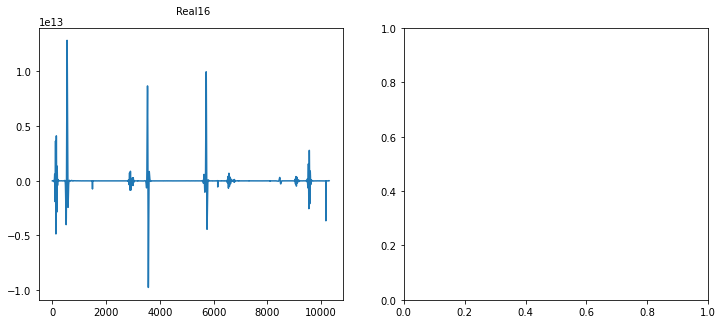

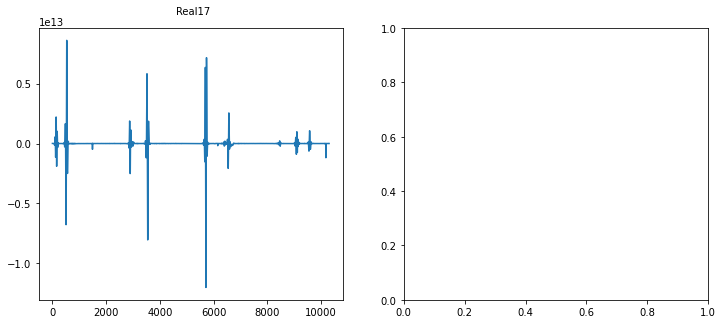

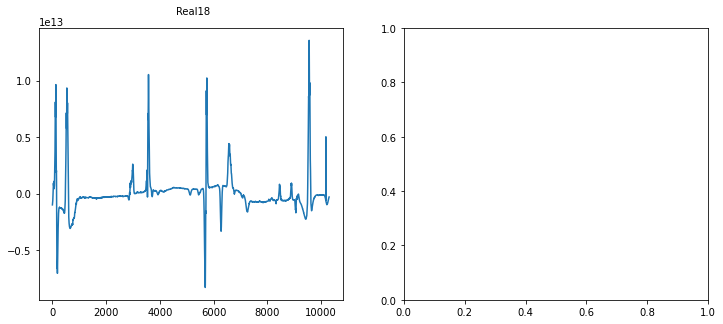

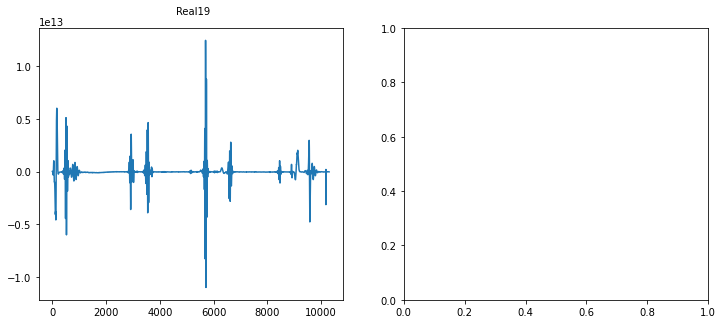

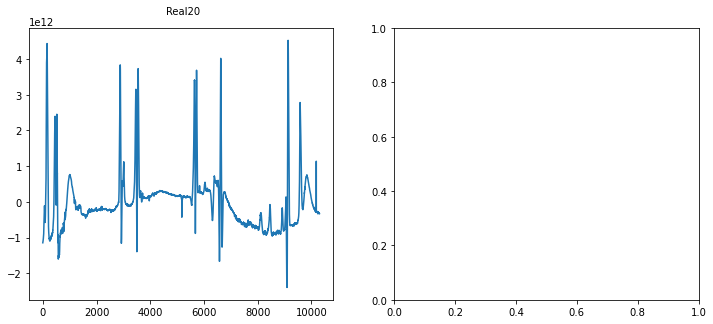

In [495]:
for i in range(len(fit211222meanarraydat)):
            fig = plt.figure(figsize = (12,5))
            axes = fig.subplots(ncols=2)
            axes[0].plot(fit211113meanarraydat[i].real-fit211113meanarrayfit[i].real,label='Residual')
            #axes[0].plot(fit211222meanarrayfit[i].real,label='Fit')
            axes[0].text(0.45,1.05,'Real' + str(i+1), transform=axes[0].transAxes)
            
            #fit211222meanarraydat, fit211222meanarrayfit

# 4/5/22 Refit the 15 good days

In [563]:


keys = ['D{}_pos_x','D{}_pos_y','D{}_phi_0','D{}_beam_center_x','D{}_beam_center_y','D{}_beam_sigma_x','D{}_beam_sigma_y','D{}_beam_smooth_x','D{}_beam_smooth_y']
files = ['211215_1700', '220101_1600', '211225_1600', '211229_1600', '211228_1600', '220103_1500', '211222_1600', '211227_1600', '211220_1600', '211130_1800', '211113_1900', '211128_1800', '211129_1800', '211121_1800']
params = []
for file in files:
    f = open('fits/out.'+file+'.txt','r')
    startData = f.read()
    f.close()
    exec(startData)
    params.append([[startParams[k.format(j)] for k in keys] for j in range(1,9)])
params = np.array(params)
print(params)
averages = np.mean(params,axis=0)
medians= np.median(params,axis=0)
#print(averages)
avgParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        avgParams[k.format(i)] = averages[i-1,j]
#print(avgParams)
medParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        medParams[k.format(i)] = medians[i-1,j]

[[[ 0.          4.4         0.         ...  0.05        0.04748272
    0.04295763]
  [ 4.43598011 -0.09267281 -0.20578242 ...  0.05        0.04597789
    0.0422013 ]
  [ 0.16584049 -4.42577991  1.26723264 ...  0.05        0.04454582
    0.04548216]
  ...
  [ 4.81704487 -0.35793731 -3.00875188 ...  0.05        0.05964936
    0.04045161]
  [ 0.3354697  -4.9005522  -1.41201536 ...  0.05        0.05122946
    0.0452105 ]
  [-4.44429292 -0.97384681 -3.08195233 ...  0.05        0.070404
    0.04328276]]

 [[ 0.          4.4         0.         ...  0.05        0.04964006
    0.04372926]
  [ 4.57433796 -0.15166375 -0.09231236 ...  0.05        0.04104553
    0.04703608]
  [ 0.31883475 -4.40665148  1.3420838  ...  0.05        0.0431368
    0.05026906]
  ...
  [ 5.49420817  0.54109973 -1.5292753  ...  0.05        0.0454994
    0.04169503]
  [ 0.99740872 -3.94166642  0.09485991 ...  0.05        0.04885758
    0.04559488]
  [-3.69386805  0.21663518 -1.90374643 ...  0.05        0.06477333
    0.0433

In [565]:
avgParams

{'D1_pos_x': 0.0,
 'D1_pos_y': 4.3999999999999995,
 'D1_phi_0': 0.0,
 'D1_beam_center_x': 0.008566268009031288,
 'D1_beam_center_y': -0.013930772261801018,
 'D1_beam_sigma_x': 0.05,
 'D1_beam_sigma_y': 0.05,
 'D1_beam_smooth_x': 0.04837226155830349,
 'D1_beam_smooth_y': 0.04409790229224338,
 'D2_pos_x': 4.466464072327022,
 'D2_pos_y': -0.12068894099216898,
 'D2_phi_0': -0.15560236457183077,
 'D2_beam_center_x': 0.016296305881759024,
 'D2_beam_center_y': -0.019763916122612114,
 'D2_beam_sigma_x': 0.05,
 'D2_beam_sigma_y': 0.05,
 'D2_beam_smooth_x': 0.04533107851525729,
 'D2_beam_smooth_y': 0.04491135239651322,
 'D3_pos_x': 0.21425574105330394,
 'D3_pos_y': -4.428996533481177,
 'D3_phi_0': 1.519839365844261,
 'D3_beam_center_x': 0.005283281943642,
 'D3_beam_center_y': -0.01125109090880386,
 'D3_beam_sigma_x': 0.05,
 'D3_beam_sigma_y': 0.05,
 'D3_beam_smooth_x': 0.047964788359220425,
 'D3_beam_smooth_y': 0.05145543688227391,
 'D4_pos_x': -4.223844601047381,
 'D4_pos_y': 0.1746268885746165

# Refit 15 days, vary center x, center y, phi

In [569]:
ChiArrayTextGoodMean15Refit=glob.glob('ChiSquared/15Refit/Mean15Refit*')

#ChiArrayTextGoodMean15Refit

ChiArrayGoodMean15Refit = []
for file in ChiArrayTextGoodMean15Refit:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArrayGoodMean15Refit.append(startData)
ChiArrayGoodMean15Refit = np.array(ChiArrayGoodMean15Refit)

#ChiArrayGoodMean15Refit

#Means
Channel11MeanRefit=[]
Channel12MeanRefit=[]
Channel13MeanRefit=[]
Channel14MeanRefit=[]
Channel22MeanRefit=[]
Channel23MeanRefit=[]
Channel24MeanRefit=[]
Channel33MeanRefit=[]
Channel34MeanRefit=[]
Channel44MeanRefit=[]

Channel55MeanRefit=[]
Channel56MeanRefit=[]
Channel57MeanRefit=[]
Channel58MeanRefit=[]
Channel66MeanRefit=[]
Channel67MeanRefit=[]
Channel68MeanRefit=[]
Channel77MeanRefit=[]
Channel78MeanRefit=[]
Channel88MeanRefit=[]

for i in range(len(ChiArrayGood15)):
    Channel11MeanRefit.append(ChiArrayGoodMean15Refit[i][0])
    Channel12MeanRefit.append(ChiArrayGoodMean15Refit[i][1])
    Channel13MeanRefit.append(ChiArrayGoodMean15Refit[i][2])
    Channel14MeanRefit.append(ChiArrayGoodMean15Refit[i][3])
    Channel22MeanRefit.append(ChiArrayGoodMean15Refit[i][4])
    Channel23MeanRefit.append(ChiArrayGoodMean15Refit[i][5])
    Channel24MeanRefit.append(ChiArrayGoodMean15Refit[i][6])
    Channel33MeanRefit.append(ChiArrayGoodMean15Refit[i][7])
    Channel34MeanRefit.append(ChiArrayGoodMean15Refit[i][8])
    Channel44MeanRefit.append(ChiArrayGoodMean15Refit[i][9])
    
    Channel55MeanRefit.append(ChiArrayGoodMean15Refit[i][10])
    Channel56MeanRefit.append(ChiArrayGoodMean15Refit[i][11])
    Channel57MeanRefit.append(ChiArrayGoodMean15Refit[i][12])
    Channel58MeanRefit.append(ChiArrayGoodMean15Refit[i][13])
    Channel66MeanRefit.append(ChiArrayGoodMean15Refit[i][14])
    Channel67MeanRefit.append(ChiArrayGoodMean15Refit[i][15])
    Channel68MeanRefit.append(ChiArrayGoodMean15Refit[i][16])
    Channel77MeanRefit.append(ChiArrayGoodMean15Refit[i][17])
    Channel78MeanRefit.append(ChiArrayGoodMean15Refit[i][18])
    Channel88MeanRefit.append(ChiArrayGoodMean15Refit[i][19])
AllChannelMeanRefit=[Channel11MeanRefit,Channel12MeanRefit,Channel13MeanRefit,Channel14MeanRefit,Channel22MeanRefit,Channel23MeanRefit,Channel24MeanRefit,Channel33MeanRefit,Channel34MeanRefit,Channel44MeanRefit,Channel55MeanRefit,Channel56MeanRefit,Channel57MeanRefit,Channel58MeanRefit,Channel66MeanRefit,Channel67MeanRefit,Channel68MeanRefit,Channel77MeanRefit,Channel78MeanRefit,Channel88MeanRefit]
AllChannelTextMeanRefit=['Channel11MeanRefit','Channel12MeanRefit','Channel13MeanRefit','Channel14MeanRefit','Channel22MeanRefit','Channel23MeanRefit','Channel24MeanRefit','Channel33MeanRefit','Channel34MeanRefit','Channel44MeanRefit','Channel55MeanRefit','Channel56MeanRefit','Channel57MeanRefit','Channel58MeanRefit','Channel66MeanRefit','Channel67MeanRefit','Channel68MeanRefit','Channel77MeanRefit','Channel78MeanRefit','Channel88MeanRefit']

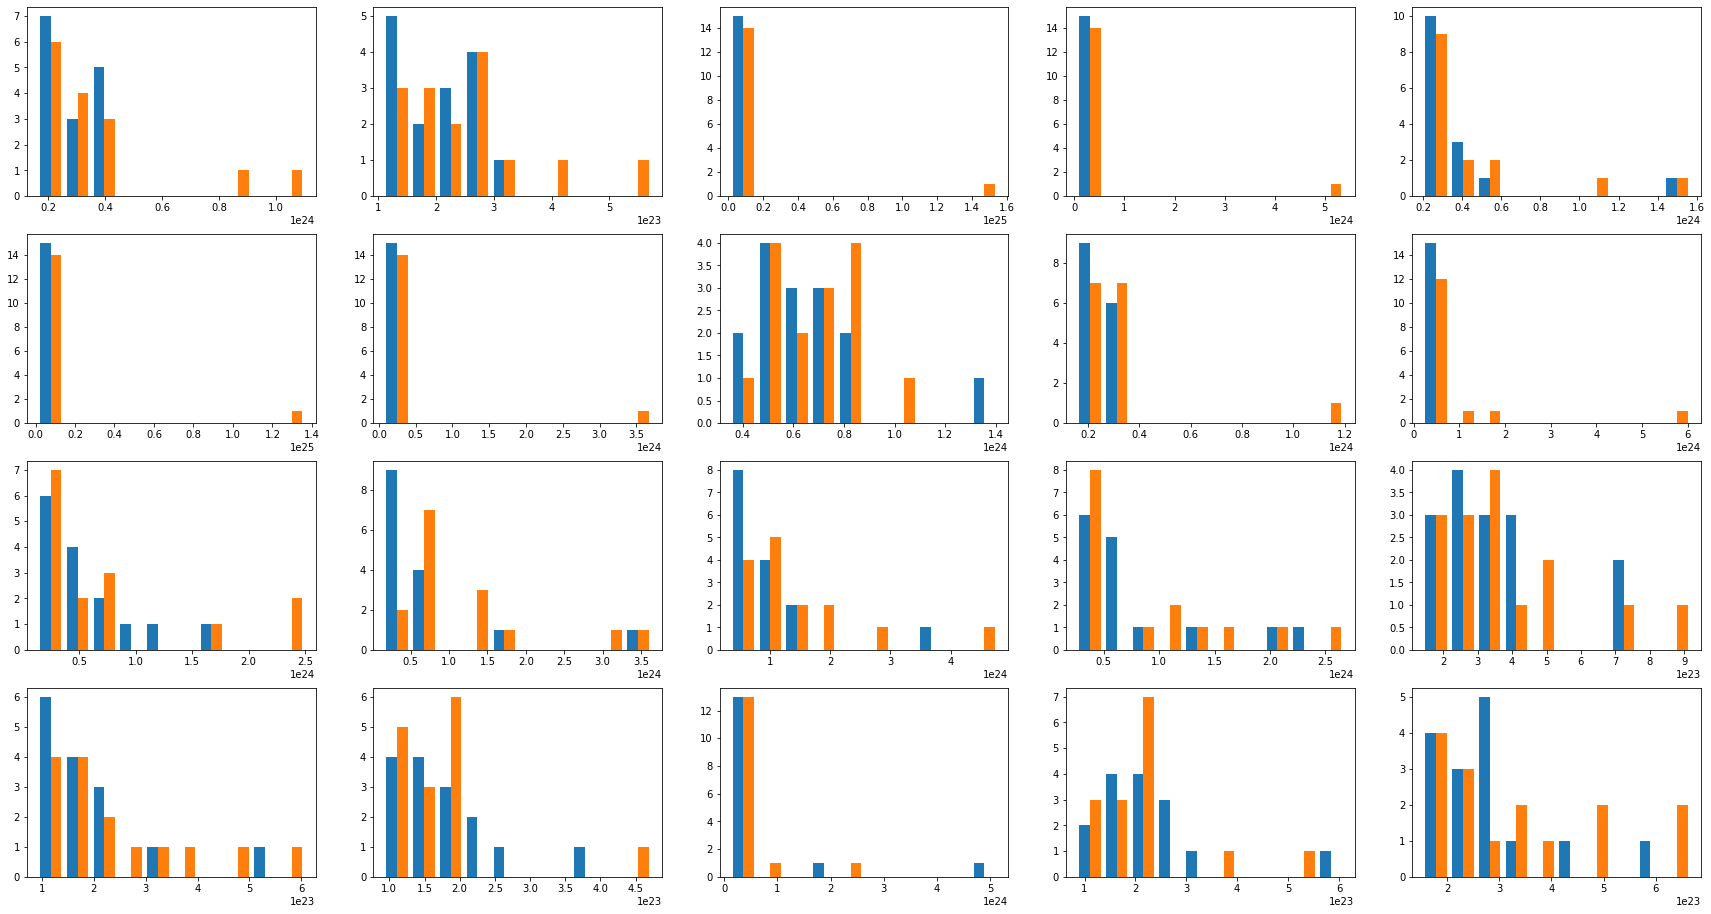

In [570]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist([AllChannelGood15[count],AllChannelMeanRefit[count]], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

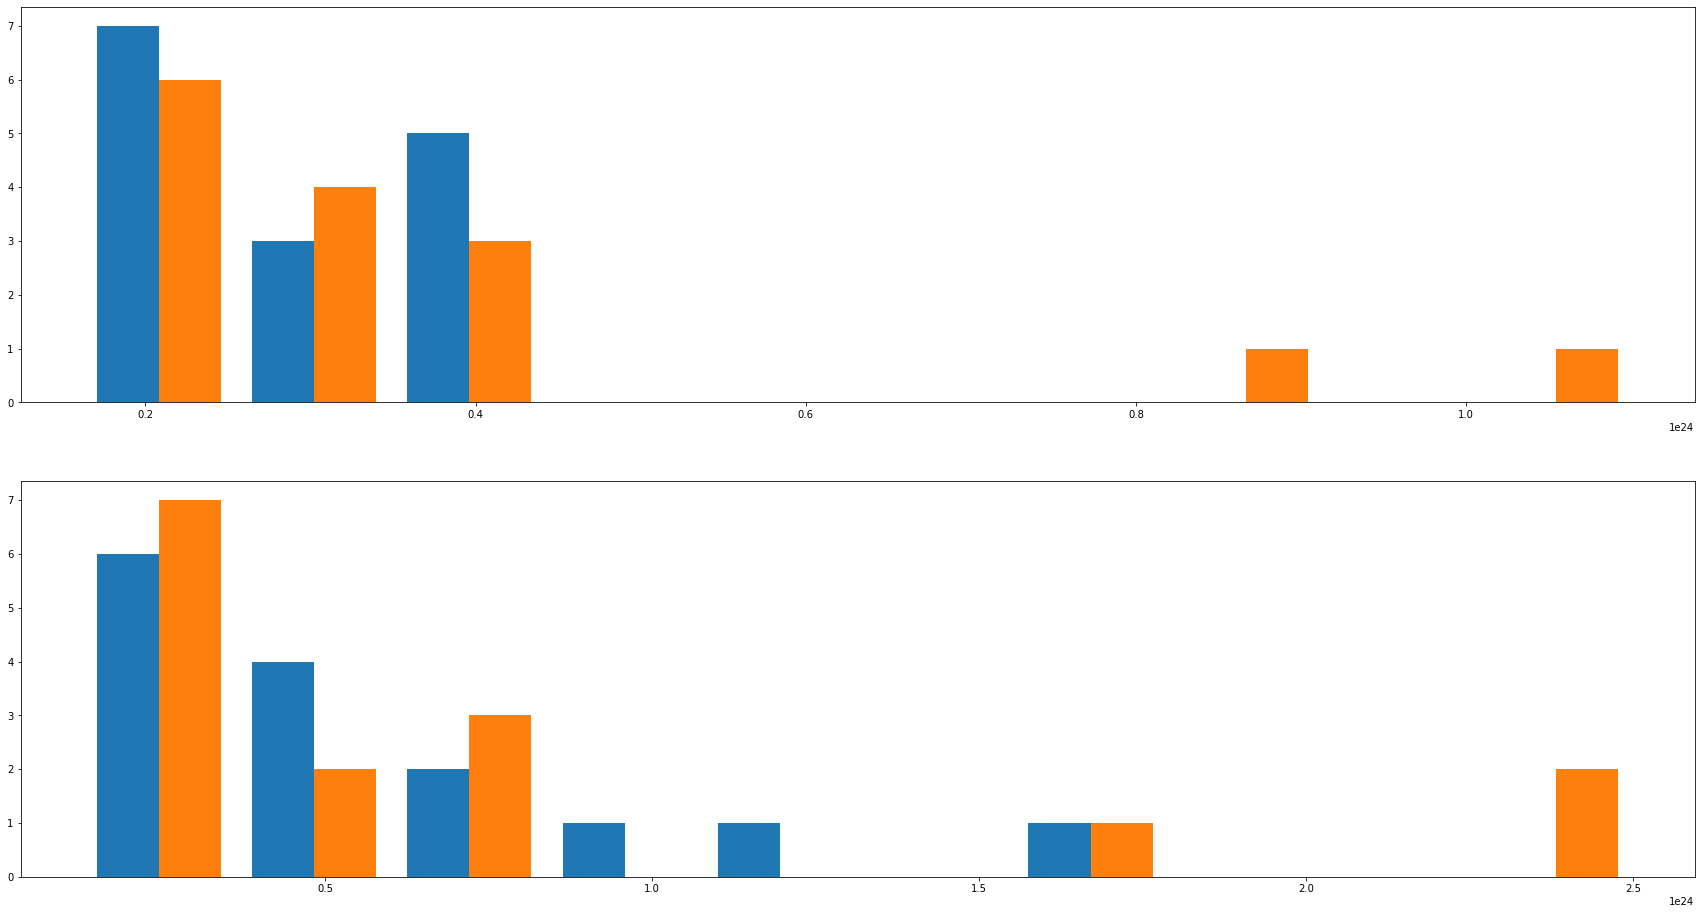

In [580]:
fig, axs = plt.subplots(2,1,figsize=(30,16))
count=0

for i in range(0,2):
    #for j in range(0,1):
       
        axs[i].hist([AllChannelGood15[count],AllChannelMeanRefit[count]], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+10


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [571]:
ChiArrayTextGoodMean15Refit

['ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211213_1700Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211215_1700Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211129_1800Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211220_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211227_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.220103_1500Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211229_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211121_1800Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211222_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211225_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211128_1800Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211228_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211130_1800Copy.txt.txt',
 'ChiSquared

In [698]:
AllChannelMeanRefit[10]

[1.0389740483953807e+24,
 1.6325018833041221e+24,
 9.300065185711907e+23,
 1.3000425635662563e+24,
 5.2087419188517584e+23,
 1.178952620559612e+24,
 2.740169981210231e+24,
 3.44099148121035e+23,
 2.8208386778510003e+24,
 1.2124059861791366e+24,
 4.97703168673739e+23,
 3.156363608605905e+23,
 8.896946880884638e+23,
 4.1181344357949335e+24,
 6.210249015703326e+23]

In [583]:
#211113 Original
'''
'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': 0.0,
 'D1_beam_center_x': 0.008679212037492683, 'D1_beam_center_y': -0.013876593278946997,
 'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001,
 'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743,

'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 0.0,
 'D5_beam_center_x': 0.010490218027928645, 'D5_beam_center_y': -0.01707206806570743,
 'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,
 'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434,
 '''

"\n'D1_pos_x': 0.0,\n 'D1_pos_y': 4.3999999999999995,\n 'D1_phi_0': 0.0,\n 'D1_beam_center_x': 0.008679212037492683,\n 'D1_beam_center_y': -0.013876593278946997,\n 'D1_beam_sigma_x': 0.05000000000000001,\n 'D1_beam_sigma_y': 0.05000000000000001,\n 'D1_beam_smooth_x': 0.04832612152543071,\n 'D1_beam_smooth_y': 0.04409691245733743,\n\n'D5_pos_x': 0.0,\n 'D5_pos_y': 4.3999999999999995,\n 'D5_phi_0': 0.0,\n 'D5_beam_center_x': 0.010490218027928645,\n 'D5_beam_center_y': -0.01707206806570743,\n 'D5_beam_sigma_x': 0.05000000000000001,\n 'D5_beam_sigma_y': 0.05000000000000001,\n 'D5_beam_smooth_x': 0.04526582499919916,\n 'D5_beam_smooth_y': 0.04337318474687434,\n "

In [584]:
#211113 Mean Refit
'''
'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': 0.09493991506608891, 
'D1_beam_center_x': 0.014265822806148538, 'D1_beam_center_y': -0.026792782761971258, 
'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001, 
'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743


'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 2.3971834784350405, 
'D5_beam_center_x': 0.033539928121904435, 'D5_beam_center_y': -0.02318875570610969, 
'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001, 
'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434
'''

"\n'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': 0.09493991506608891, \n'D1_beam_center_x': 0.014265822806148538, 'D1_beam_center_y': -0.026792782761971258, \n'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001, \n'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743\n\n\n'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 2.3971834784350405, \n'D5_beam_center_x': 0.033539928121904435, 'D5_beam_center_y': -0.02318875570610969, \n'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001, \n'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434\n"

In [586]:
#211121 
'''
'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': 0.0,
 'D1_beam_center_x': 0.008679212037492683, 'D1_beam_center_y': -0.013876593278946997,
 'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001,
 'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743,

 'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 0.0,
 'D5_beam_center_x': 0.010490218027928645, 'D5_beam_center_y': -0.01707206806570743,
 'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,
 'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434,
 '''

"\n'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': 0.0,\n 'D1_beam_center_x': 0.008679212037492683, 'D1_beam_center_y': -0.013876593278946997,\n 'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001,\n 'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743,\n\n 'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 0.0,\n 'D5_beam_center_x': 0.010490218027928645, 'D5_beam_center_y': -0.01707206806570743,\n 'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,\n 'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434,\n "

In [588]:
#211121 Mean Refit
'''
'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': -0.47481357376905486, 
'D1_beam_center_x': 0.006021047668731181, 'D1_beam_center_y': -0.013232870219734376, 
'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001, 
'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743,

'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 0.30217925498424286, 
'D5_beam_center_x': 0.003957591999538739, 'D5_beam_center_y': -0.02040135263001921,
'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,
'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434
'''

"\n'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': -0.47481357376905486, \n'D1_beam_center_x': 0.006021047668731181, 'D1_beam_center_y': -0.013232870219734376, \n'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001, \n'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743,\n\n'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 0.30217925498424286, \n'D5_beam_center_x': 0.003957591999538739, 'D5_beam_center_y': -0.02040135263001921,\n'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,\n'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434\n"

# Mean Refit, Vary Pos, Beamcenter, Beamsigma

In [590]:
ChiArrayTextGoodMean15Refit=glob.glob('ChiSquared/15Refit/Mean15Refit*')

#ChiArrayTextGoodMean15Refit

ChiArrayGoodMean15Refit = []
for file in ChiArrayTextGoodMean15Refit:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArrayGoodMean15Refit.append(startData)
ChiArrayGoodMean15Refit = np.array(ChiArrayGoodMean15Refit)

#ChiArrayGoodMean15Refit

#Means
Channel11MeanRefit=[]
Channel12MeanRefit=[]
Channel13MeanRefit=[]
Channel14MeanRefit=[]
Channel22MeanRefit=[]
Channel23MeanRefit=[]
Channel24MeanRefit=[]
Channel33MeanRefit=[]
Channel34MeanRefit=[]
Channel44MeanRefit=[]

Channel55MeanRefit=[]
Channel56MeanRefit=[]
Channel57MeanRefit=[]
Channel58MeanRefit=[]
Channel66MeanRefit=[]
Channel67MeanRefit=[]
Channel68MeanRefit=[]
Channel77MeanRefit=[]
Channel78MeanRefit=[]
Channel88MeanRefit=[]

for i in range(len(ChiArrayGood15)):
    Channel11MeanRefit.append(ChiArrayGoodMean15Refit[i][0])
    Channel12MeanRefit.append(ChiArrayGoodMean15Refit[i][1])
    Channel13MeanRefit.append(ChiArrayGoodMean15Refit[i][2])
    Channel14MeanRefit.append(ChiArrayGoodMean15Refit[i][3])
    Channel22MeanRefit.append(ChiArrayGoodMean15Refit[i][4])
    Channel23MeanRefit.append(ChiArrayGoodMean15Refit[i][5])
    Channel24MeanRefit.append(ChiArrayGoodMean15Refit[i][6])
    Channel33MeanRefit.append(ChiArrayGoodMean15Refit[i][7])
    Channel34MeanRefit.append(ChiArrayGoodMean15Refit[i][8])
    Channel44MeanRefit.append(ChiArrayGoodMean15Refit[i][9])
    
    Channel55MeanRefit.append(ChiArrayGoodMean15Refit[i][10])
    Channel56MeanRefit.append(ChiArrayGoodMean15Refit[i][11])
    Channel57MeanRefit.append(ChiArrayGoodMean15Refit[i][12])
    Channel58MeanRefit.append(ChiArrayGoodMean15Refit[i][13])
    Channel66MeanRefit.append(ChiArrayGoodMean15Refit[i][14])
    Channel67MeanRefit.append(ChiArrayGoodMean15Refit[i][15])
    Channel68MeanRefit.append(ChiArrayGoodMean15Refit[i][16])
    Channel77MeanRefit.append(ChiArrayGoodMean15Refit[i][17])
    Channel78MeanRefit.append(ChiArrayGoodMean15Refit[i][18])
    Channel88MeanRefit.append(ChiArrayGoodMean15Refit[i][19])
AllChannelMeanRefit=[Channel11MeanRefit,Channel12MeanRefit,Channel13MeanRefit,Channel14MeanRefit,Channel22MeanRefit,Channel23MeanRefit,Channel24MeanRefit,Channel33MeanRefit,Channel34MeanRefit,Channel44MeanRefit,Channel55MeanRefit,Channel56MeanRefit,Channel57MeanRefit,Channel58MeanRefit,Channel66MeanRefit,Channel67MeanRefit,Channel68MeanRefit,Channel77MeanRefit,Channel78MeanRefit,Channel88MeanRefit]
AllChannelTextMeanRefit=['Channel11MeanRefit','Channel12MeanRefit','Channel13MeanRefit','Channel14MeanRefit','Channel22MeanRefit','Channel23MeanRefit','Channel24MeanRefit','Channel33MeanRefit','Channel34MeanRefit','Channel44MeanRefit','Channel55MeanRefit','Channel56MeanRefit','Channel57MeanRefit','Channel58MeanRefit','Channel66MeanRefit','Channel67MeanRefit','Channel68MeanRefit','Channel77MeanRefit','Channel78MeanRefit','Channel88MeanRefit']

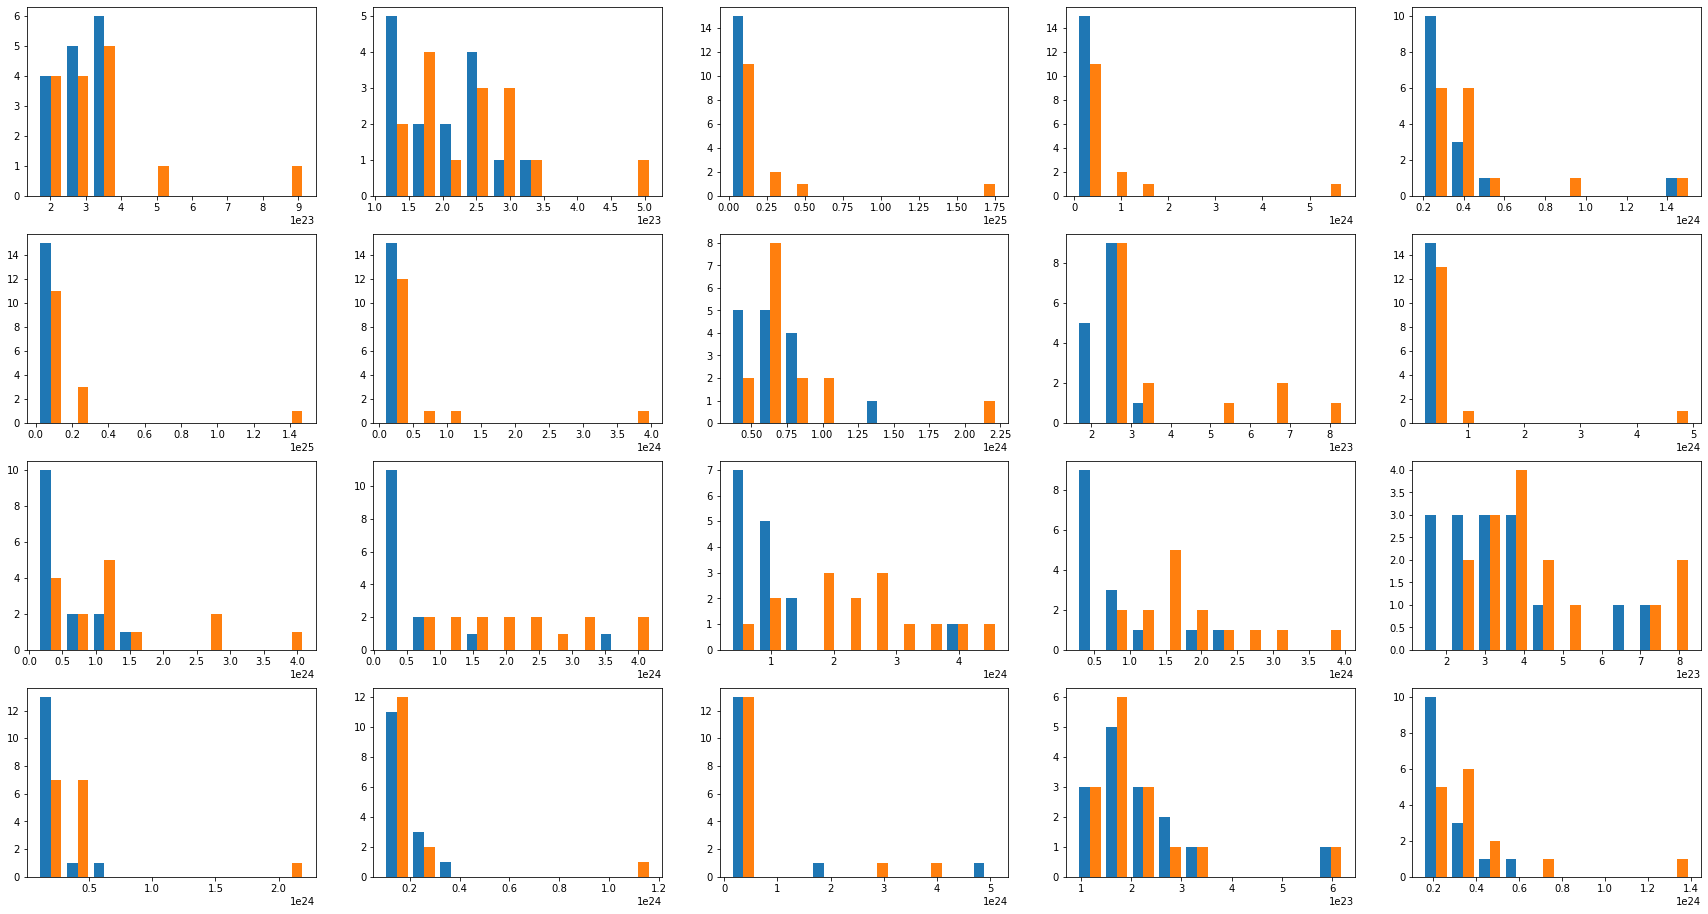

In [591]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist([AllChannelGood15[count],AllChannelMeanRefit[count]], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

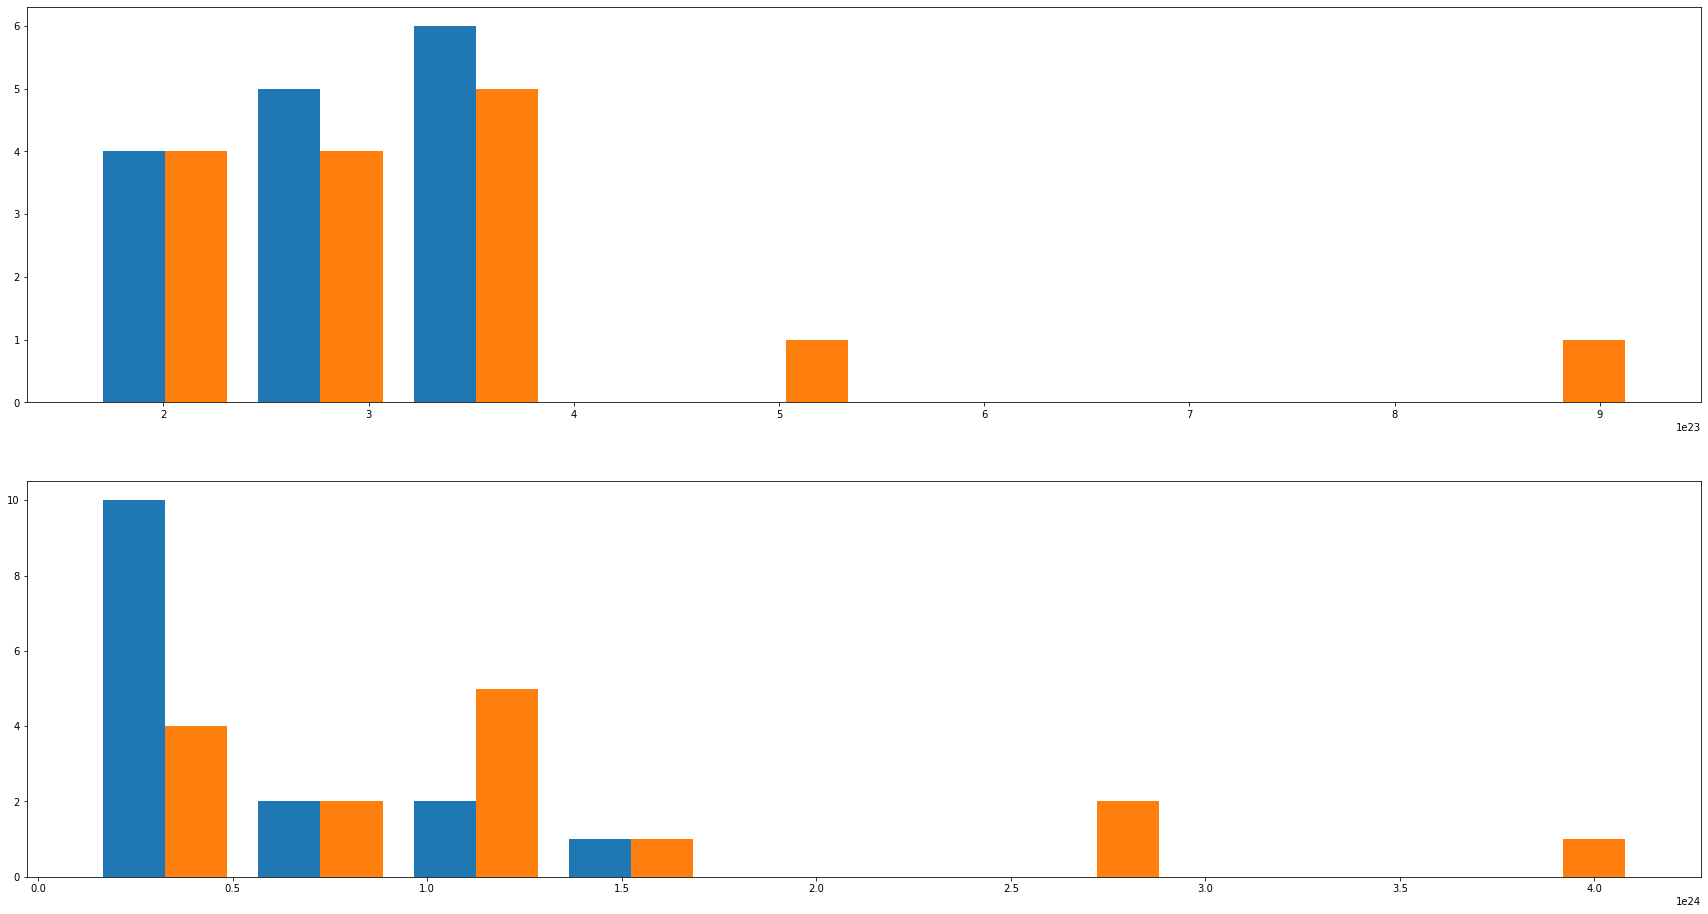

In [592]:
fig, axs = plt.subplots(2,1,figsize=(30,16))
count=0

for i in range(0,2):
    #for j in range(0,1):
       
        axs[i].hist([AllChannelGood15[count],AllChannelMeanRefit[count]], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+10


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [593]:
ChiArrayTextGoodMean15Refit

['ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211213_1700Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211215_1700Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211129_1800Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211220_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211227_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.220103_1500Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211229_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211121_1800Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211222_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211225_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211128_1800Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211228_1600Copy.txt.txt',
 'ChiSquared/15Refit/Mean15RefitChiSquaredout.out.211130_1800Copy.txt.txt',
 'ChiSquared

In [699]:
AllChannelMeanRefit[10]

[1.0389740483953807e+24,
 1.6325018833041221e+24,
 9.300065185711907e+23,
 1.3000425635662563e+24,
 5.2087419188517584e+23,
 1.178952620559612e+24,
 2.740169981210231e+24,
 3.44099148121035e+23,
 2.8208386778510003e+24,
 1.2124059861791366e+24,
 4.97703168673739e+23,
 3.156363608605905e+23,
 8.896946880884638e+23,
 4.1181344357949335e+24,
 6.210249015703326e+23]

In [597]:
#211113 Original
'''
'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': 0.0,
 'D1_beam_center_x': 0.008679212037492683, 'D1_beam_center_y': -0.013876593278946997,
 'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001,
 'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743,

'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 0.0,
 'D5_beam_center_x': 0.010490218027928645, 'D5_beam_center_y': -0.01707206806570743,
 'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,
 'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434,
 '''

"\n'D1_pos_x': 0.0, 'D1_pos_y': 4.3999999999999995, 'D1_phi_0': 0.0,\n 'D1_beam_center_x': 0.008679212037492683, 'D1_beam_center_y': -0.013876593278946997,\n 'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001,\n 'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743,\n\n'D5_pos_x': 0.0, 'D5_pos_y': 4.3999999999999995, 'D5_phi_0': 0.0,\n 'D5_beam_center_x': 0.010490218027928645, 'D5_beam_center_y': -0.01707206806570743,\n 'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,\n 'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434,\n "

In [598]:
#21113 Mean Refit
'''
'D1_pos_x': 0.08391993652686851, 'D1_pos_y': 4.461331108747443, 'D1_phi_0': 0.0, 
'D1_beam_center_x': 0.013626465424275919, 'D1_beam_center_y': -0.02531459474321809, 
'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001,
'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743

'D5_pos_x': -0.010287105371535075, 'D5_pos_y': 4.424886759453683, 'D5_phi_0': 0.0, 
'D5_beam_center_x': 0.013508275315030772, 'D5_beam_center_y': -0.023256744950831222, 
'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,
'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434
'''

"\n'D1_pos_x': 0.08391993652686851, 'D1_pos_y': 4.461331108747443, 'D1_phi_0': 0.0, \n'D1_beam_center_x': 0.013626465424275919, 'D1_beam_center_y': -0.02531459474321809, \n'D1_beam_sigma_x': 0.05000000000000001, 'D1_beam_sigma_y': 0.05000000000000001,\n'D1_beam_smooth_x': 0.04832612152543071, 'D1_beam_smooth_y': 0.04409691245733743\n\n'D5_pos_x': -0.010287105371535075, 'D5_pos_y': 4.424886759453683, 'D5_phi_0': 0.0, \n'D5_beam_center_x': 0.013508275315030772, 'D5_beam_center_y': -0.023256744950831222, \n'D5_beam_sigma_x': 0.05000000000000001, 'D5_beam_sigma_y': 0.05000000000000001,\n'D5_beam_smooth_x': 0.04526582499919916, 'D5_beam_smooth_y': 0.04337318474687434\n"

pas/211113_1900


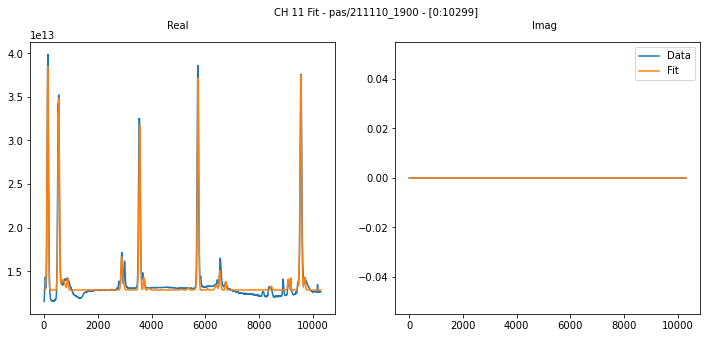

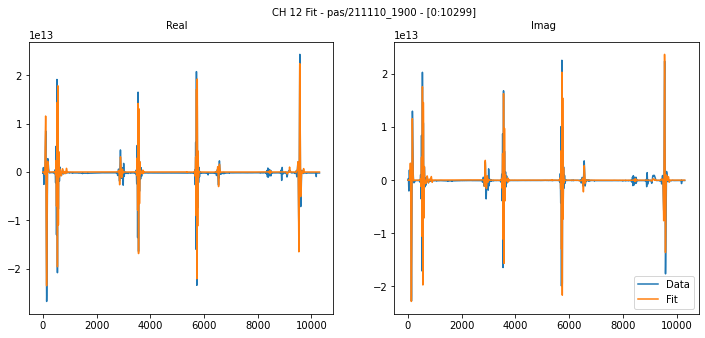

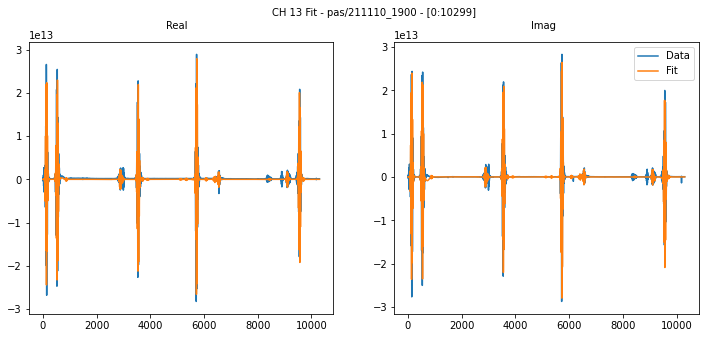

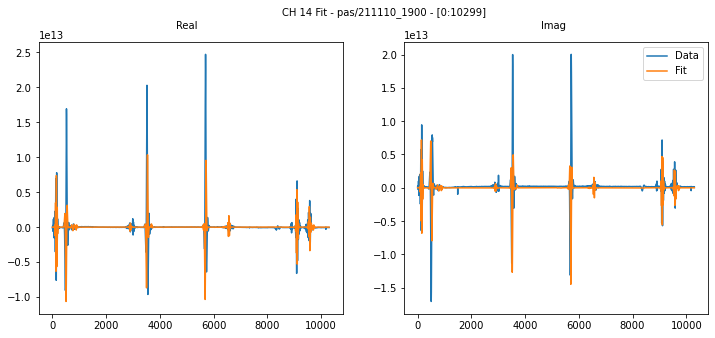

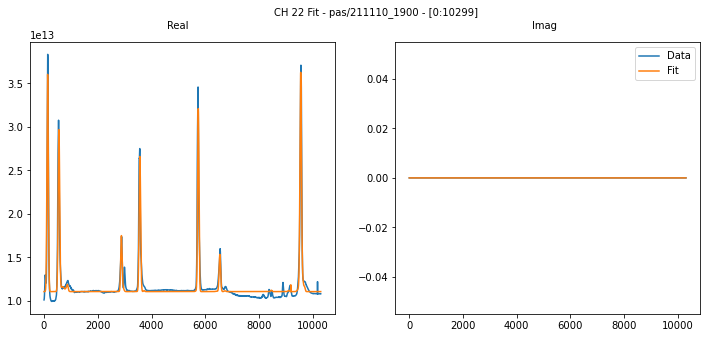

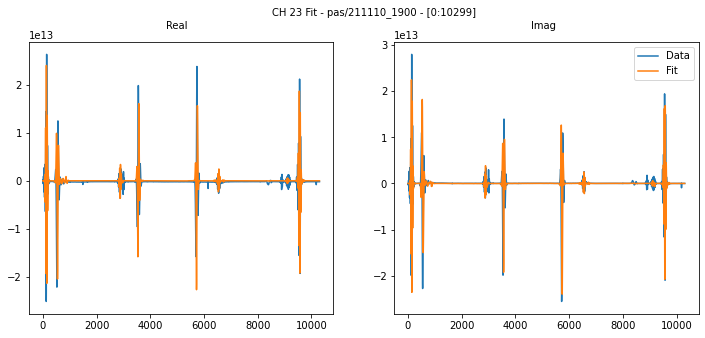

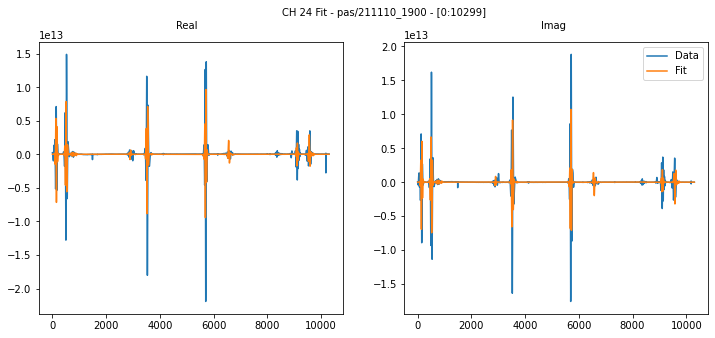

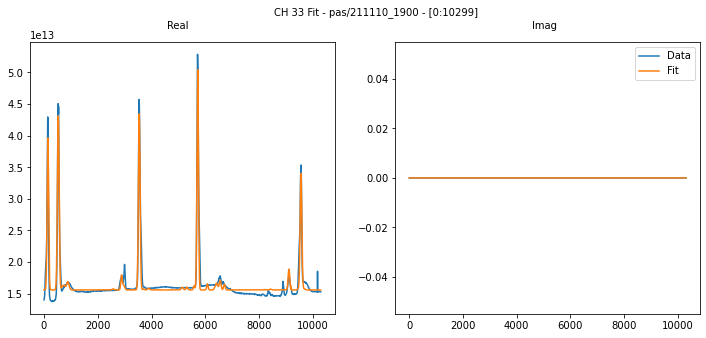

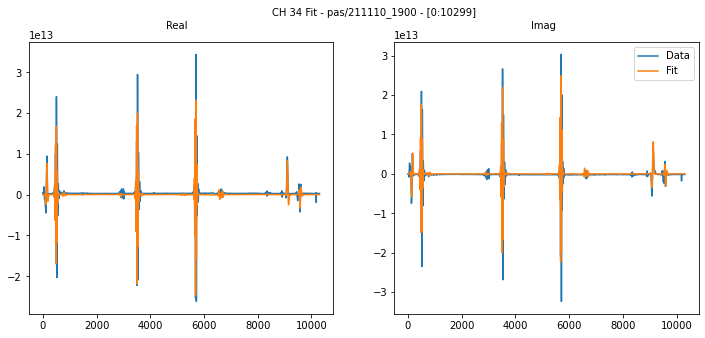

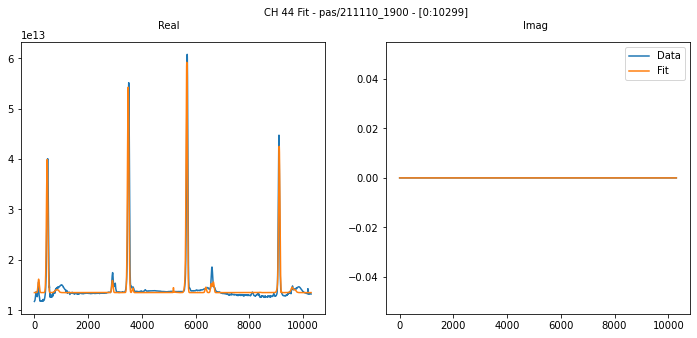

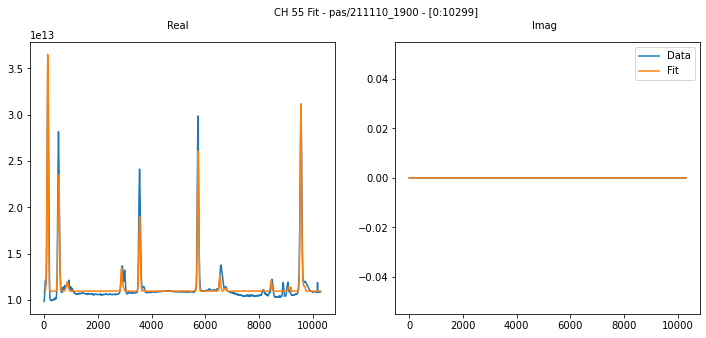

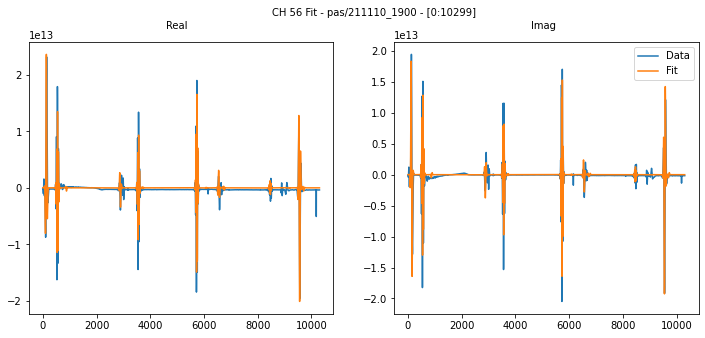

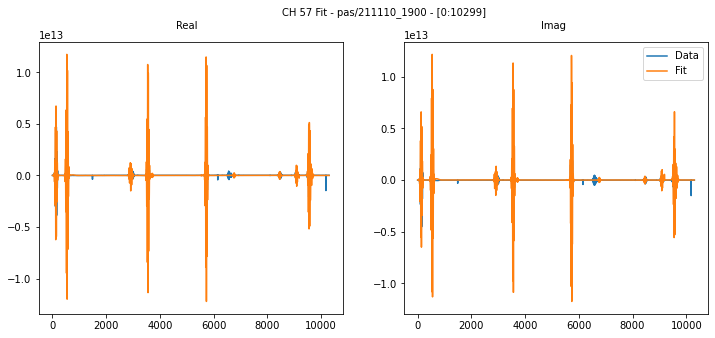

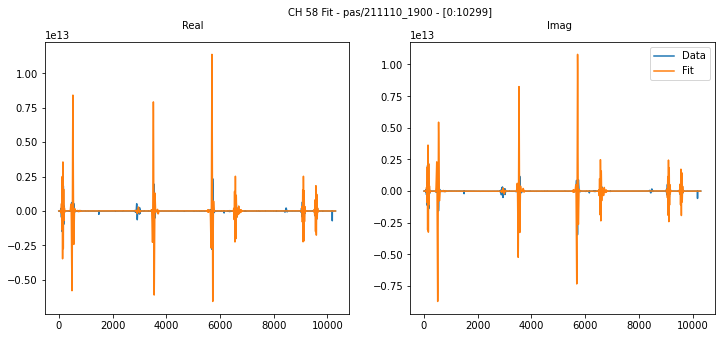

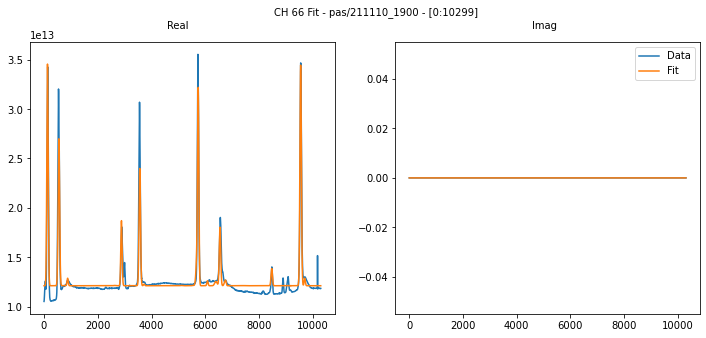

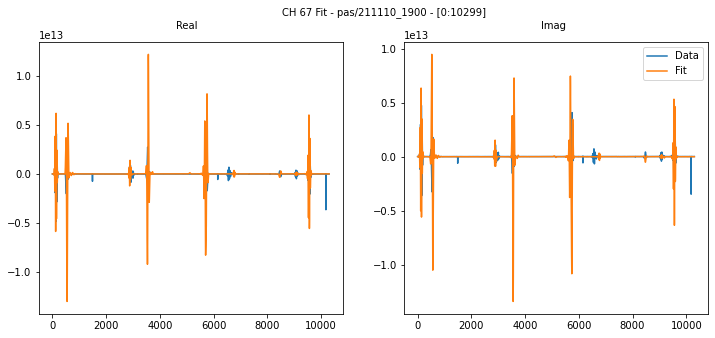

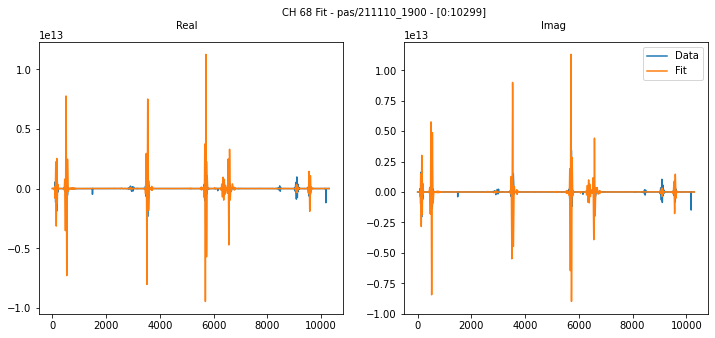

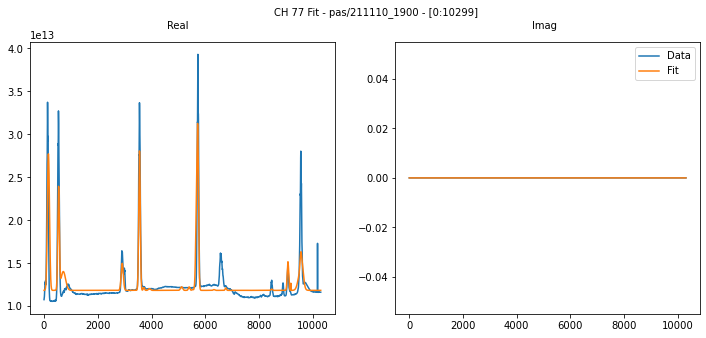

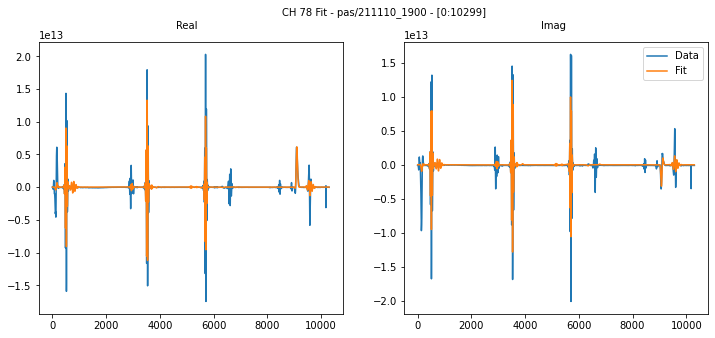

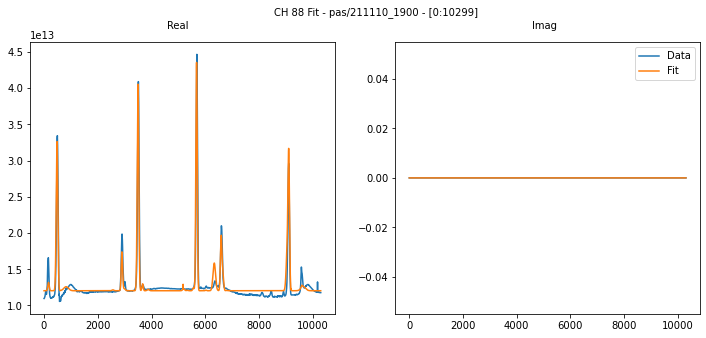

In [604]:
#Loads data and TheoryPredictor class from file in fits folder

fileIn = 'fits/Good15Days/15Refit/MEANout.211113_1900Copy.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

#Graphs theory predictions vs data
cut=[]
#cut = [0,6500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

fit1210arraydat, fit1210arrayfit=Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)



# D Params 

In [666]:
FileTextGoodMean15Refit=glob.glob('fits/Good15Days/15Refit/MEANout*')
FileTextGoodMean15Refit

['fits/Good15Days/15Refit/MEANout.211213_1700Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211215_1700Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211129_1800Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211220_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211227_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANout.220103_1500Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211229_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211121_1800Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211222_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211225_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211128_1800Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211228_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211130_1800Copy.txt',
 'fits/Good15Days/15Refit/MEANout.220101_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANout.211113_1900Copy.txt']

In [667]:


keys = ['D{}_pos_x','D{}_pos_y','D{}_phi_0','D{}_beam_center_x','D{}_beam_center_y','D{}_beam_sigma_x','D{}_beam_sigma_y','D{}_beam_smooth_x','D{}_beam_smooth_y']
#files = ['211215_1700', '211213_1700', '220101_1600', '211225_1600', '211229_1600', '211228_1600', '220103_1500', '211222_1600', '211227_1600', '211220_1600', '211130_1800', '211113_1900', '211128_1800', '211129_1800', '211121_1800']
params = []
for file in FileTextGoodMean15Refit:
    f = open(file,'r')
    startData = f.read()
    f.close()
    exec(startData)
    params.append([[startParams[k.format(j)] for k in keys] for j in range(1,9)])
params = np.array(params)
print(params)
averages = np.mean(params,axis=0)
medians= np.median(params,axis=0)
#print(averages)
avgParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        avgParams[k.format(i)] = averages[i-1,j]
#print(avgParams)
medParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        medParams[k.format(i)] = medians[i-1,j]

[[[ 1.35304070e-02  4.40615262e+00  0.00000000e+00 ...  5.00000000e-02
    4.83261215e-02  4.40969125e-02]
  [ 4.46985348e+00 -1.06412646e-01 -1.51502693e-01 ...  5.00000000e-02
    4.52353146e-02  4.49820754e-02]
  [ 2.05924121e-01 -4.44336959e+00  1.50769787e+00 ...  5.00000000e-02
    4.74956139e-02  5.13624574e-02]
  ...
  [ 4.72718952e+00 -5.01178800e-01 -2.25926315e+00 ...  5.00000000e-02
    5.53826741e-02  4.25924113e-02]
  [ 2.33791297e-01 -4.88869502e+00 -8.63815495e-01 ...  5.00000000e-02
    6.60234776e-02  4.42778691e-02]
  [-4.85284450e+00 -7.84448203e-01 -2.53013909e+00 ...  5.00000000e-02
    6.35487416e-02  4.33190479e-02]]

 [[-3.80896446e-03  4.40949623e+00  0.00000000e+00 ...  5.00000000e-02
    4.83261215e-02  4.40969125e-02]
  [ 4.46110627e+00 -1.08101195e-01 -1.51502693e-01 ...  5.00000000e-02
    4.52353146e-02  4.49820754e-02]
  [ 2.23789543e-01 -4.44467768e+00  1.50769787e+00 ...  5.00000000e-02
    4.74956139e-02  5.13624574e-02]
  ...
  [ 4.80983413e+00 -5.5

In [668]:
D1_pos_x=[]
D1_pos_y=[]
D1_phi_0=[]
D1_beam_center_x=[]
D1_beam_center_y=[]
D1_beam_sigma_x=[]
D1_beam_sigma_y=[]
D1_beam_smooth_x=[]
D1_beam_smooth_y=[]

D2_pos_x=[]
D2_pos_y=[]
D2_phi_0=[]
D2_beam_center_x=[]
D2_beam_center_y=[]
D2_beam_sigma_x=[]
D2_beam_sigma_y=[]
D2_beam_smooth_x=[]
D2_beam_smooth_y=[]

D3_pos_x=[]
D3_pos_y=[]
D3_phi_0=[]
D3_beam_center_x=[]
D3_beam_center_y=[]
D3_beam_sigma_x=[]
D3_beam_sigma_y=[]
D3_beam_smooth_x=[]
D3_beam_smooth_y=[]

D4_pos_x=[]
D4_pos_y=[]
D4_phi_0=[]
D4_beam_center_x=[]
D4_beam_center_y=[]
D4_beam_sigma_x=[]
D4_beam_sigma_y=[]
D4_beam_smooth_x=[]
D4_beam_smooth_y=[]

D5_pos_x=[]
D5_pos_y=[]
D5_phi_0=[]
D5_beam_center_x=[]
D5_beam_center_y=[]
D5_beam_sigma_x=[]
D5_beam_sigma_y=[]
D5_beam_smooth_x=[]
D5_beam_smooth_y=[]

D6_pos_x=[]
D6_pos_y=[]
D6_phi_0=[]
D6_beam_center_x=[]
D6_beam_center_y=[]
D6_beam_sigma_x=[]
D6_beam_sigma_y=[]
D6_beam_smooth_x=[]
D6_beam_smooth_y=[]

D7_pos_x=[]
D7_pos_y=[]
D7_phi_0=[]
D7_beam_center_x=[]
D7_beam_center_y=[]
D7_beam_sigma_x=[]
D7_beam_sigma_y=[]
D7_beam_smooth_x=[]
D7_beam_smooth_y=[]

D8_pos_x=[]
D8_pos_y=[]
D8_phi_0=[]
D8_beam_center_x=[]
D8_beam_center_y=[]
D8_beam_sigma_x=[]
D8_beam_sigma_y=[]
D8_beam_smooth_x=[]
D8_beam_smooth_y=[]

for i in range(len(params)):
    #for j in range(len(params[i])):
        D1_pos_x.append(        params[i][0][0])
        D1_pos_y.append(        params[i][0][1])
        D1_phi_0.append(        params[i][0][2])
        D1_beam_center_x.append(params[i][0][3])
        D1_beam_center_y.append(params[i][0][4])
        D1_beam_sigma_x.append( params[i][0][5])
        D1_beam_sigma_y.append( params[i][0][6])
        D1_beam_smooth_x.append(params[i][0][7])
        D1_beam_smooth_y.append(params[i][0][8])
        
        D2_pos_x.append(        params[i][1][0])
        D2_pos_y.append(        params[i][1][1])
        D2_phi_0.append(        params[i][1][2])
        D2_beam_center_x.append(params[i][1][3])
        D2_beam_center_y.append(params[i][1][4])
        D2_beam_sigma_x.append( params[i][1][5])
        D2_beam_sigma_y.append( params[i][1][6])
        D2_beam_smooth_x.append(params[i][1][7])
        D2_beam_smooth_y.append(params[i][1][8])
        
        D3_pos_x.append(        params[i][2][0])
        D3_pos_y.append(        params[i][2][1])
        D3_phi_0.append(        params[i][2][2])
        D3_beam_center_x.append(params[i][2][3])
        D3_beam_center_y.append(params[i][2][4])
        D3_beam_sigma_x.append( params[i][2][5])
        D3_beam_sigma_y.append( params[i][2][6])
        D3_beam_smooth_x.append(params[i][2][7])
        D3_beam_smooth_y.append(params[i][2][8])
         
        D4_pos_x.append(        params[i][3][0])
        D4_pos_y.append(        params[i][3][1])
        D4_phi_0.append(        params[i][3][2])
        D4_beam_center_x.append(params[i][3][3])
        D4_beam_center_y.append(params[i][3][4])
        D4_beam_sigma_x.append( params[i][3][5])
        D4_beam_sigma_y.append( params[i][3][6])
        D4_beam_smooth_x.append(params[i][3][7])
        D4_beam_smooth_y.append(params[i][3][8])
         
        D5_pos_x.append(        params[i][4][0])
        D5_pos_y.append(        params[i][4][1])
        D5_phi_0.append(        params[i][4][2])
        D5_beam_center_x.append(params[i][4][3])
        D5_beam_center_y.append(params[i][4][4])
        D5_beam_sigma_x.append( params[i][4][5])
        D5_beam_sigma_y.append( params[i][4][6])
        D5_beam_smooth_x.append(params[i][4][7])
        D5_beam_smooth_y.append(params[i][4][8])
         
        D6_pos_x.append(        params[i][5][0])
        D6_pos_y.append(        params[i][5][1])
        D6_phi_0.append(        params[i][5][2])
        D6_beam_center_x.append(params[i][5][3])
        D6_beam_center_y.append(params[i][5][4])
        D6_beam_sigma_x.append( params[i][5][5])
        D6_beam_sigma_y.append( params[i][5][6])
        D6_beam_smooth_x.append(params[i][5][7])
        D6_beam_smooth_y.append(params[i][5][8])
         
        D7_pos_x.append(        params[i][6][0])
        D7_pos_y.append(        params[i][6][1])
        D7_phi_0.append(        params[i][6][2])
        D7_beam_center_x.append(params[i][6][3])
        D7_beam_center_y.append(params[i][6][4])
        D7_beam_sigma_x.append( params[i][6][5])
        D7_beam_sigma_y.append( params[i][6][6])
        D7_beam_smooth_x.append(params[i][6][7])
        D7_beam_smooth_y.append(params[i][6][8])
         
        D8_pos_x.append(        params[i][7][0])
        D8_pos_y.append(        params[i][7][1])
        D8_phi_0.append(        params[i][7][2])
        D8_beam_center_x.append(params[i][7][3])
        D8_beam_center_y.append(params[i][7][4])
        D8_beam_sigma_x.append( params[i][7][5])
        D8_beam_sigma_y.append( params[i][7][6])
        D8_beam_smooth_x.append(params[i][7][7])
        D8_beam_smooth_y.append(params[i][7][8])
    

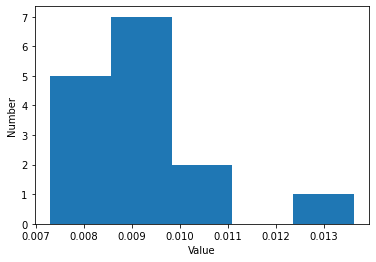

In [673]:
plt.hist(D1_beam_center_x, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

#Rightmost point 211113

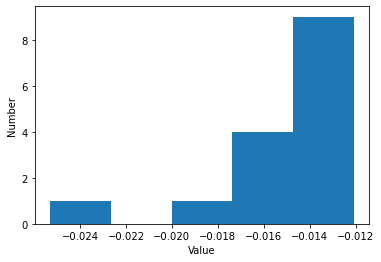

In [674]:
plt.hist(D1_beam_center_y, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

#Leftmost point 211113

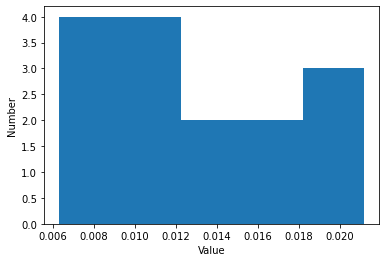

In [675]:
plt.hist(D5_beam_center_x, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

#211113 0.013508275315030772

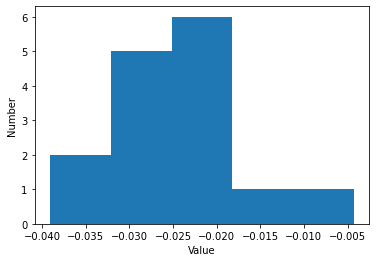

In [676]:
plt.hist(D5_beam_center_y, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

#211113 -0.023256744950831222

In [620]:
D5_beam_center_x

[0.015445994844259693,
 0.019112407222933628,
 0.01363350782731973,
 0.021161722495286597,
 0.015518350419409053,
 0.018977841606434648,
 0.0065086039779091755,
 0.007205539788973574,
 0.011407520464577653,
 0.010148115647249215,
 0.00633555939238821,
 0.00944784048310654,
 0.011711932601054832,
 0.009220666448829816,
 0.013508275315030772]

# Mean Refit, Vary beamcenter x, beamcenter y, sigma x, sigma y.

In [716]:
ChiArrayTextGoodMean15Refitcs=glob.glob('ChiSquared/15Refit/Mean15Refitcentersigma*')

#ChiArrayTextGoodMean15Refit

ChiArrayGoodMean15Refitcs = []
for file in ChiArrayTextGoodMean15Refitcs:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArrayGoodMean15Refitcs.append(startData)
ChiArrayGoodMean15Refitcs = np.array(ChiArrayGoodMean15Refitcs)

#ChiArrayGoodMean15Refit

#Means
Channel11MeanRefitcs=[]
Channel12MeanRefitcs=[]
Channel13MeanRefitcs=[]
Channel14MeanRefitcs=[]
Channel22MeanRefitcs=[]
Channel23MeanRefitcs=[]
Channel24MeanRefitcs=[]
Channel33MeanRefitcs=[]
Channel34MeanRefitcs=[]
Channel44MeanRefitcs=[]

Channel55MeanRefitcs=[]
Channel56MeanRefitcs=[]
Channel57MeanRefitcs=[]
Channel58MeanRefitcs=[]
Channel66MeanRefitcs=[]
Channel67MeanRefitcs=[]
Channel68MeanRefitcs=[]
Channel77MeanRefitcs=[]
Channel78MeanRefitcs=[]
Channel88MeanRefitcs=[]

for i in range(len(ChiArrayGood15)):
    Channel11MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][0])
    Channel12MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][1])
    Channel13MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][2])
    Channel14MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][3])
    Channel22MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][4])
    Channel23MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][5])
    Channel24MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][6])
    Channel33MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][7])
    Channel34MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][8])
    Channel44MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][9])
    
    Channel55MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][10])
    Channel56MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][11])
    Channel57MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][12])
    Channel58MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][13])
    Channel66MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][14])
    Channel67MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][15])
    Channel68MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][16])
    Channel77MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][17])
    Channel78MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][18])
    Channel88MeanRefitcs.append(ChiArrayGoodMean15Refitcs[i][19])
AllChannelMeanRefitcs=[Channel11MeanRefitcs,Channel12MeanRefitcs,Channel13MeanRefitcs,Channel14MeanRefitcs,Channel22MeanRefitcs,Channel23MeanRefitcs,Channel24MeanRefitcs,Channel33MeanRefitcs,Channel34MeanRefitcs,Channel44MeanRefitcs,Channel55MeanRefitcs,Channel56MeanRefitcs,Channel57MeanRefitcs,Channel58MeanRefitcs,Channel66MeanRefitcs,Channel67MeanRefitcs,Channel68MeanRefitcs,Channel77MeanRefitcs,Channel78MeanRefitcs,Channel88MeanRefitcs]
AllChannelTextMeanRefitcs=['Channel11MeanRefitcs','Channel12MeanRefitcs','Channel13MeanRefitcs','Channel14MeanRefitcs','Channel22MeanRefitcs','Channel23MeanRefitcs','Channel24MeanRefitcs','Channel33MeanRefitcs','Channel34MeanRefitcs','Channel44MeanRefitcs','Channel55MeanRefitcs','Channel56MeanRefitcs','Channel57MeanRefitcs','Channel58MeanRefitcs','Channel66MeanRefitcs','Channel67MeanRefitcs','Channel68MeanRefitcs','Channel77MeanRefitcs','Channel78MeanRefitcs','Channel88MeanRefitcs']

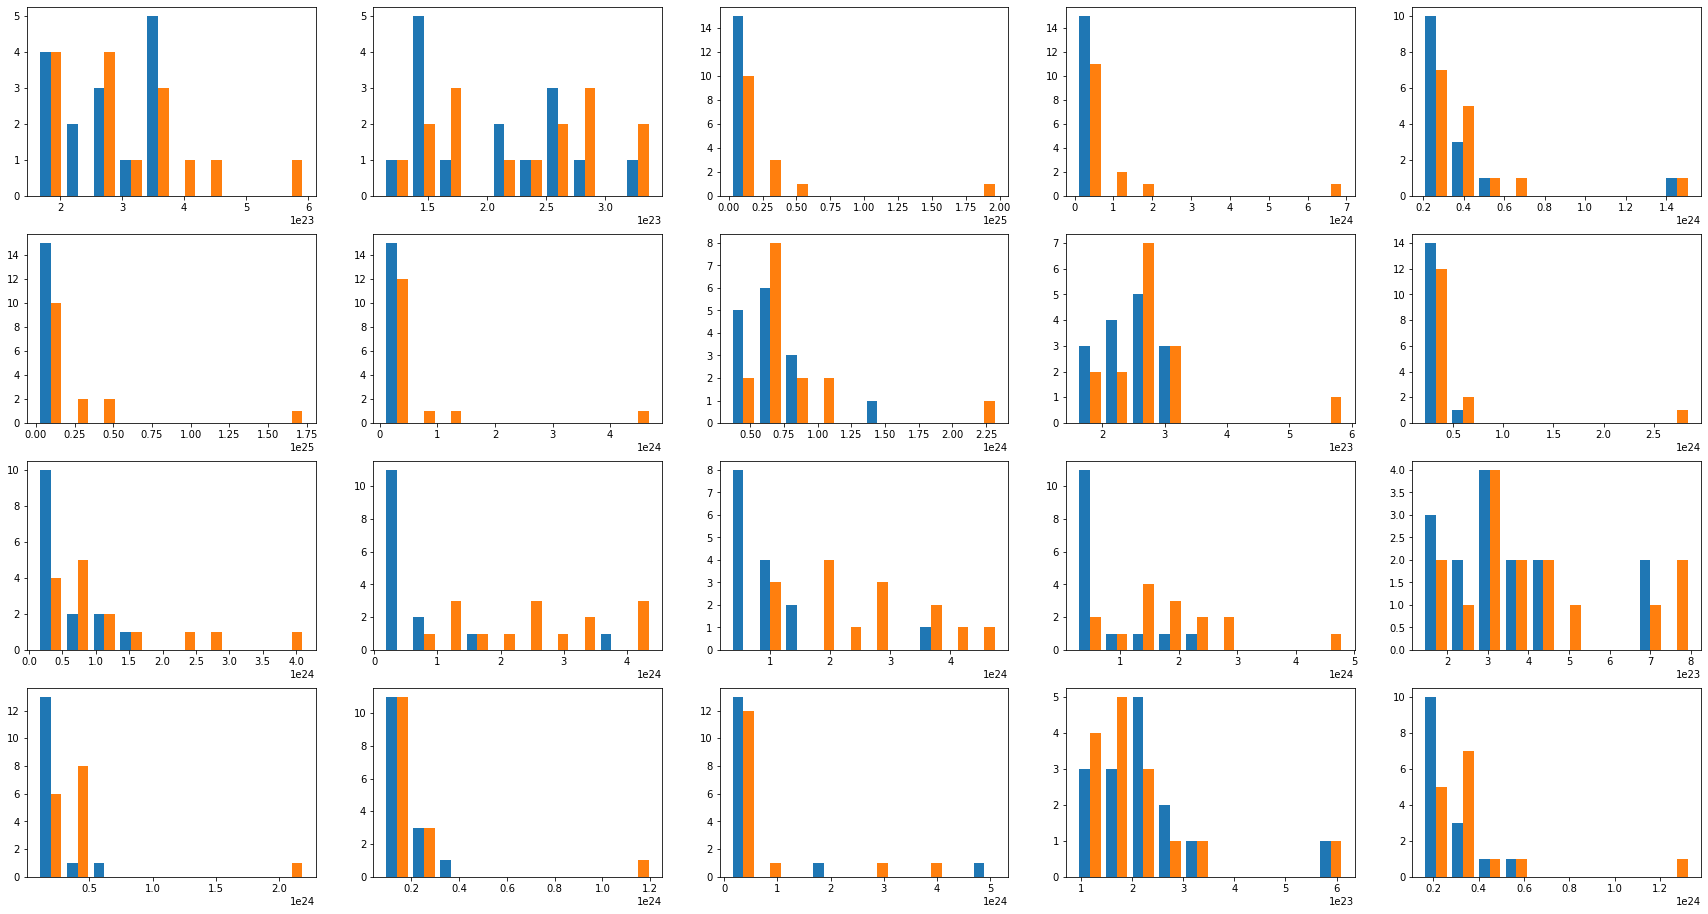

In [717]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist([AllChannelGood15[count],AllChannelMeanRefitcs[count]], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [718]:
FileTextGoodMean15Refitcs=glob.glob('fits/Good15Days/15Refit/MEANcentersigma*')
FileTextGoodMean15Refitcs

['fits/Good15Days/15Refit/MEANcentersigmaout.211213_1700Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211229_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.220101_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211227_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211128_1800Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.220103_1500Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211220_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211228_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211113_1900Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211129_1800Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211215_1700Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211222_1600Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211121_1800Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211130_1800Copy.txt',
 'fits/Good15Days/15Refit/MEANcentersigmaout.211225_1600Copy.t

In [719]:
AllChannelMeanRefitcs[10]

[6.928496846354635e+23,
 2.8052199502529543e+24,
 4.135494821447207e+24,
 4.096582267314721e+23,
 4.6116205849707354e+23,
 6.535088679900409e+23,
 1.142172896646171e+24,
 2.6990776251706326e+23,
 6.12194699443993e+23,
 7.333881051379014e+23,
 1.3810956823137302e+24,
 2.4616498474677383e+24,
 3.158143950139699e+23,
 5.727591599935343e+23,
 1.1432367025818287e+24]

In [720]:


keys = ['D{}_pos_x','D{}_pos_y','D{}_phi_0','D{}_beam_center_x','D{}_beam_center_y','D{}_beam_sigma_x','D{}_beam_sigma_y','D{}_beam_smooth_x','D{}_beam_smooth_y']
#files = ['211215_1700', '211213_1700', '220101_1600', '211225_1600', '211229_1600', '211228_1600', '220103_1500', '211222_1600', '211227_1600', '211220_1600', '211130_1800', '211113_1900', '211128_1800', '211129_1800', '211121_1800']
params = []
for file in FileTextGoodMean15Refitcs:
    f = open(file,'r')
    startData = f.read()
    f.close()
    exec(startData)
    params.append([[startParams[k.format(j)] for k in keys] for j in range(1,9)])
params = np.array(params)
print(params)
averages = np.mean(params,axis=0)
medians= np.median(params,axis=0)
#print(averages)
avgParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        avgParams[k.format(i)] = averages[i-1,j]
#print(avgParams)
medParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        medParams[k.format(i)] = medians[i-1,j]

[[[ 0.          4.4         0.         ...  0.05        0.04832612
    0.04409691]
  [ 4.46583956 -0.12321382 -0.15150269 ...  0.05        0.04523531
    0.04498208]
  [ 0.2133109  -4.42841598  1.50769787 ...  0.05        0.04749561
    0.05136246]
  ...
  [ 4.76371317 -0.4116463  -2.25926315 ...  0.05        0.05538267
    0.04259241]
  [ 0.25693597 -4.88479653 -0.8638155  ...  0.05        0.06602348
    0.04427787]
  [-4.83218596 -0.79002735 -2.53013909 ...  0.05        0.06354874
    0.04331905]]

 [[ 0.          4.4         0.         ...  0.05        0.04832612
    0.04409691]
  [ 4.46583956 -0.12321382 -0.15150269 ...  0.05        0.04523531
    0.04498208]
  [ 0.2133109  -4.42841598  1.50769787 ...  0.05        0.04749561
    0.05136246]
  ...
  [ 4.76371317 -0.4116463  -2.25926315 ...  0.05        0.05538267
    0.04259241]
  [ 0.25693597 -4.88479653 -0.8638155  ...  0.05        0.06602348
    0.04427787]
  [-4.83218596 -0.79002735 -2.53013909 ...  0.05        0.06354874
    0.

In [722]:
D1_pos_x=[]
D1_pos_y=[]
D1_phi_0=[]
D1_beam_center_x=[]
D1_beam_center_y=[]
D1_beam_sigma_x=[]
D1_beam_sigma_y=[]
D1_beam_smooth_x=[]
D1_beam_smooth_y=[]

D2_pos_x=[]
D2_pos_y=[]
D2_phi_0=[]
D2_beam_center_x=[]
D2_beam_center_y=[]
D2_beam_sigma_x=[]
D2_beam_sigma_y=[]
D2_beam_smooth_x=[]
D2_beam_smooth_y=[]

D3_pos_x=[]
D3_pos_y=[]
D3_phi_0=[]
D3_beam_center_x=[]
D3_beam_center_y=[]
D3_beam_sigma_x=[]
D3_beam_sigma_y=[]
D3_beam_smooth_x=[]
D3_beam_smooth_y=[]

D4_pos_x=[]
D4_pos_y=[]
D4_phi_0=[]
D4_beam_center_x=[]
D4_beam_center_y=[]
D4_beam_sigma_x=[]
D4_beam_sigma_y=[]
D4_beam_smooth_x=[]
D4_beam_smooth_y=[]

D5_pos_x=[]
D5_pos_y=[]
D5_phi_0=[]
D5_beam_center_x=[]
D5_beam_center_y=[]
D5_beam_sigma_x=[]
D5_beam_sigma_y=[]
D5_beam_smooth_x=[]
D5_beam_smooth_y=[]

D6_pos_x=[]
D6_pos_y=[]
D6_phi_0=[]
D6_beam_center_x=[]
D6_beam_center_y=[]
D6_beam_sigma_x=[]
D6_beam_sigma_y=[]
D6_beam_smooth_x=[]
D6_beam_smooth_y=[]

D7_pos_x=[]
D7_pos_y=[]
D7_phi_0=[]
D7_beam_center_x=[]
D7_beam_center_y=[]
D7_beam_sigma_x=[]
D7_beam_sigma_y=[]
D7_beam_smooth_x=[]
D7_beam_smooth_y=[]

D8_pos_x=[]
D8_pos_y=[]
D8_phi_0=[]
D8_beam_center_x=[]
D8_beam_center_y=[]
D8_beam_sigma_x=[]
D8_beam_sigma_y=[]
D8_beam_smooth_x=[]
D8_beam_smooth_y=[]

for i in range(len(params)):
    #for j in range(len(params[i])):
        D1_pos_x.append(        params[i][0][0])
        D1_pos_y.append(        params[i][0][1])
        D1_phi_0.append(        params[i][0][2])
        D1_beam_center_x.append(params[i][0][3])
        D1_beam_center_y.append(params[i][0][4])
        D1_beam_sigma_x.append( params[i][0][5])
        D1_beam_sigma_y.append( params[i][0][6])
        D1_beam_smooth_x.append(params[i][0][7])
        D1_beam_smooth_y.append(params[i][0][8])
        
        D2_pos_x.append(        params[i][1][0])
        D2_pos_y.append(        params[i][1][1])
        D2_phi_0.append(        params[i][1][2])
        D2_beam_center_x.append(params[i][1][3])
        D2_beam_center_y.append(params[i][1][4])
        D2_beam_sigma_x.append( params[i][1][5])
        D2_beam_sigma_y.append( params[i][1][6])
        D2_beam_smooth_x.append(params[i][1][7])
        D2_beam_smooth_y.append(params[i][1][8])
        
        D3_pos_x.append(        params[i][2][0])
        D3_pos_y.append(        params[i][2][1])
        D3_phi_0.append(        params[i][2][2])
        D3_beam_center_x.append(params[i][2][3])
        D3_beam_center_y.append(params[i][2][4])
        D3_beam_sigma_x.append( params[i][2][5])
        D3_beam_sigma_y.append( params[i][2][6])
        D3_beam_smooth_x.append(params[i][2][7])
        D3_beam_smooth_y.append(params[i][2][8])
         
        D4_pos_x.append(        params[i][3][0])
        D4_pos_y.append(        params[i][3][1])
        D4_phi_0.append(        params[i][3][2])
        D4_beam_center_x.append(params[i][3][3])
        D4_beam_center_y.append(params[i][3][4])
        D4_beam_sigma_x.append( params[i][3][5])
        D4_beam_sigma_y.append( params[i][3][6])
        D4_beam_smooth_x.append(params[i][3][7])
        D4_beam_smooth_y.append(params[i][3][8])
         
        D5_pos_x.append(        params[i][4][0])
        D5_pos_y.append(        params[i][4][1])
        D5_phi_0.append(        params[i][4][2])
        D5_beam_center_x.append(params[i][4][3])
        D5_beam_center_y.append(params[i][4][4])
        D5_beam_sigma_x.append( params[i][4][5])
        D5_beam_sigma_y.append( params[i][4][6])
        D5_beam_smooth_x.append(params[i][4][7])
        D5_beam_smooth_y.append(params[i][4][8])
         
        D6_pos_x.append(        params[i][5][0])
        D6_pos_y.append(        params[i][5][1])
        D6_phi_0.append(        params[i][5][2])
        D6_beam_center_x.append(params[i][5][3])
        D6_beam_center_y.append(params[i][5][4])
        D6_beam_sigma_x.append( params[i][5][5])
        D6_beam_sigma_y.append( params[i][5][6])
        D6_beam_smooth_x.append(params[i][5][7])
        D6_beam_smooth_y.append(params[i][5][8])
         
        D7_pos_x.append(        params[i][6][0])
        D7_pos_y.append(        params[i][6][1])
        D7_phi_0.append(        params[i][6][2])
        D7_beam_center_x.append(params[i][6][3])
        D7_beam_center_y.append(params[i][6][4])
        D7_beam_sigma_x.append( params[i][6][5])
        D7_beam_sigma_y.append( params[i][6][6])
        D7_beam_smooth_x.append(params[i][6][7])
        D7_beam_smooth_y.append(params[i][6][8])
         
        D8_pos_x.append(        params[i][7][0])
        D8_pos_y.append(        params[i][7][1])
        D8_phi_0.append(        params[i][7][2])
        D8_beam_center_x.append(params[i][7][3])
        D8_beam_center_y.append(params[i][7][4])
        D8_beam_sigma_x.append( params[i][7][5])
        D8_beam_sigma_y.append( params[i][7][6])
        D8_beam_smooth_x.append(params[i][7][7])
        D8_beam_smooth_y.append(params[i][7][8])
    

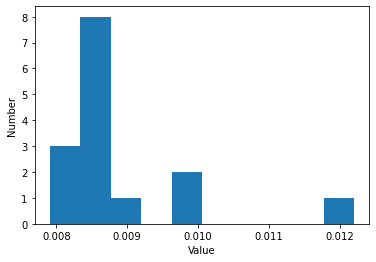

In [723]:
plt.hist(D1_beam_center_x, density=False, bins=10)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

#Rightmost point 211113

In [742]:
print(np.mean(D8_beam_center_x),np.std(D8_beam_center_x))

-0.043998720050026155 0.0007378951240381175


In [743]:
print(np.mean(D8_beam_center_y),np.std(D8_beam_center_y))

0.01698614072664134 0.0038444069584336717


# 211113 Removed

In [628]:
ChiArrayTextGoodMean14Refitcs=glob.glob('ChiSquared/14 Days/Mean14Chi*')

#ChiArrayTextGoodMean15Refit

ChiArrayGoodMean14Refitcs = []
for file in ChiArrayTextGoodMean14Refitcs:
    #print(file)
    startData = loadtxt(file, comments="#", delimiter="\n", unpack=False)
    #exec(startData)
    ChiArrayGoodMean14Refitcs.append(startData)
ChiArrayGoodMean14Refitcs = np.array(ChiArrayGoodMean14Refitcs)

#ChiArrayGoodMean15Refit

#Means
Channel11Mean14Refitcs=[]
Channel12Mean14Refitcs=[]
Channel13Mean14Refitcs=[]
Channel14Mean14Refitcs=[]
Channel22Mean14Refitcs=[]
Channel23Mean14Refitcs=[]
Channel24Mean14Refitcs=[]
Channel33Mean14Refitcs=[]
Channel34Mean14Refitcs=[]
Channel44Mean14Refitcs=[]

Channel55Mean14Refitcs=[]
Channel56Mean14Refitcs=[]
Channel57Mean14Refitcs=[]
Channel58Mean14Refitcs=[]
Channel66Mean14Refitcs=[]
Channel67Mean14Refitcs=[]
Channel68Mean14Refitcs=[]
Channel77Mean14Refitcs=[]
Channel78Mean14Refitcs=[]
Channel88Mean14Refitcs=[]

for i in range(len(ChiArrayGoodMean14Refitcs)):
    Channel11Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][0])
    Channel12Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][1])
    Channel13Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][2])
    Channel14Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][3])
    Channel22Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][4])
    Channel23Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][5])
    Channel24Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][6])
    Channel33Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][7])
    Channel34Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][8])
    Channel44Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][9])

    Channel55Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][10])
    Channel56Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][11])
    Channel57Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][12])
    Channel58Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][13])
    Channel66Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][14])
    Channel67Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][15])
    Channel68Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][16])
    Channel77Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][17])
    Channel78Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][18])
    Channel88Mean14Refitcs.append(ChiArrayGoodMean14Refitcs[i][19])
AllChannelMean14Refitcs=[Channel11Mean14Refitcs,Channel12Mean14Refitcs,Channel13Mean14Refitcs,Channel14Mean14Refitcs,Channel22Mean14Refitcs,Channel23Mean14Refitcs,Channel24Mean14Refitcs,Channel33Mean14Refitcs,Channel34Mean14Refitcs,Channel44Mean14Refitcs,Channel55Mean14Refitcs,Channel56Mean14Refitcs,Channel57Mean14Refitcs,Channel58Mean14Refitcs,Channel66Mean14Refitcs,Channel67Mean14Refitcs,Channel68Mean14Refitcs,Channel77Mean14Refitcs,Channel78Mean14Refitcs,Channel88Mean14Refitcs]
AllChannelTextMean14Refitcs=['Channel11Mean14Refitcs','Channel12Mean14Refitcs','Channel13Mean14Refitcs','Channel14Mean14Refitcs','Channel22Mean14Refitcs','Channel23Mean14Refitcs','Channel24Mean14Refitcs','Channel33Mean14Refitcs','Channel34Mean14Refitcs','Channel44Mean14Refitcs','Channel55Mean14Refitcs','Channel56Mean14Refitcs','Channel57Mean14Refitcs','Channel58Mean14Refitcs','Channel66Mean14Refitcs','Channel67Mean14Refitcs','Channel68Mean14Refitcs','Channel77Mean14Refitcs','Channel78Mean14Refitcs','Channel88Mean14Refitcs']

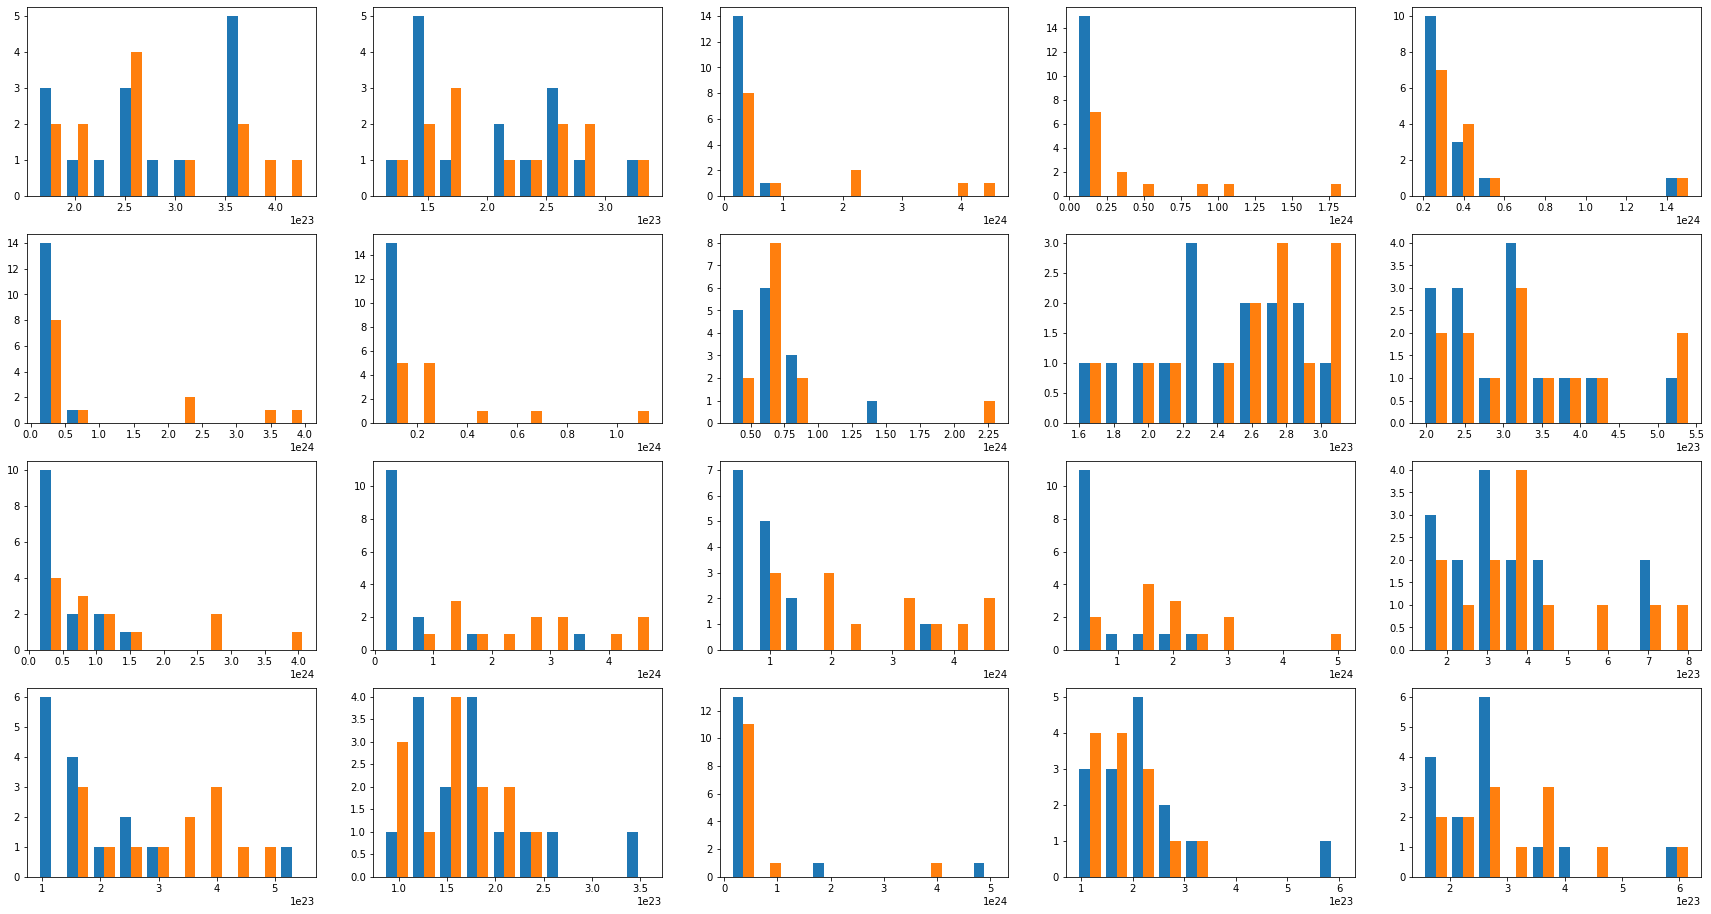

In [629]:
fig, axs = plt.subplots(4,5,figsize=(30,16))
count=0

for i in range(0,4):
    for j in range(0,5):
       
        axs[i,j].hist([AllChannelGood15[count],AllChannelMean14Refitcs[count]], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+1


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [630]:
ChiArrayTextGoodMean14Refitcs

['ChiSquared/14 Days/Mean14ChiSquaredout.out.211228_1600Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211215_1700Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211129_1800Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211225_1600Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211229_1600Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211222_1600Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211220_1600Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211128_1800Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.220101_1600Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211121_1800Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211227_1600Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.211130_1800Copy.txt.txt',
 'ChiSquared/14 Days/Mean14ChiSquaredout.out.220103_1500Copy.txt.txt']

In [634]:
AllChannelMean14Refitcs[10]

[2.7991570605801078e+23,
 1.3756776042634155e+24,
 7.789209636043886e+23,
 1.1560953400836649e+24,
 2.815394492449238e+24,
 2.514781037732228e+24,
 1.2640394617150522e+24,
 4.638159139962805e+23,
 4.1029575414538983e+24,
 3.357096127607343e+23,
 4.3199612555391204e+23,
 6.049237068789206e+23,
 7.171835452990539e+23]

In [677]:
FileTextGoodMean14Refitcs=glob.glob('fits/Good15Days/211113 Removed/MEAN*')
FileTextGoodMean14Refitcs

['fits/Good15Days/211113 Removed/MEANout.211228_1600Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211215_1700Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211129_1800Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211225_1600Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211229_1600Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211222_1600Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211220_1600Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211128_1800Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.220101_1600Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211121_1800Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211227_1600Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.211130_1800Copy.txt',
 'fits/Good15Days/211113 Removed/MEANout.220103_1500Copy.txt']

In [678]:


keys = ['D{}_pos_x','D{}_pos_y','D{}_phi_0','D{}_beam_center_x','D{}_beam_center_y','D{}_beam_sigma_x','D{}_beam_sigma_y','D{}_beam_smooth_x','D{}_beam_smooth_y']
#files = ['211215_1700', '211213_1700', '220101_1600', '211225_1600', '211229_1600', '211228_1600', '220103_1500', '211222_1600', '211227_1600', '211220_1600', '211130_1800', '211113_1900', '211128_1800', '211129_1800', '211121_1800']
params = []
for file in FileTextGoodMean14Refitcs:
    f = open(file,'r')
    startData = f.read()
    f.close()
    exec(startData)
    params.append([[startParams[k.format(j)] for k in keys] for j in range(1,9)])
params = np.array(params)
print(params)
averages = np.mean(params,axis=0)
medians= np.median(params,axis=0)
#print(averages)
avgParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        avgParams[k.format(i)] = averages[i-1,j]
#print(avgParams)
medParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        medParams[k.format(i)] = medians[i-1,j]

[[[ 0.00000000e+00  4.40000000e+00  0.00000000e+00  8.37191918e-03
   -1.38592547e-02  5.00000000e-02  5.00000000e-02  4.83722616e-02
    4.40979023e-02]
  [ 4.46646407e+00 -1.20688941e-01 -1.55602365e-01  1.63016760e-02
   -2.00058525e-02  5.00000000e-02  5.00000000e-02  4.53310785e-02
    4.49113524e-02]
  [ 2.14255741e-01 -4.42899653e+00  1.51983937e+00  4.11271970e-03
   -1.53106765e-02  5.00000000e-02  5.00000000e-02  4.79647884e-02
    5.14554369e-02]
  [-4.22384460e+00  1.74626889e-01 -1.10461562e+00 -4.69056452e-02
    1.70503880e-02  5.00000000e-02  5.00000000e-02  4.64473322e-02
    4.15511598e-02]
  [ 0.00000000e+00  4.40000000e+00  0.00000000e+00  9.58498813e-03
   -1.86834171e-02  5.00000000e-02  5.00000000e-02  4.48833788e-02
    4.32703581e-02]
  [ 4.79068340e+00 -4.34819271e-01 -2.19651914e+00  1.67299199e-02
   -2.78435895e-02  5.00000000e-02  5.00000000e-02  5.60472231e-02
    4.25599258e-02]
  [ 2.83961374e-01 -4.90988642e+00 -8.11792385e-01  7.87766486e-03
   -2.280

In [679]:
D1_pos_x=[]
D1_pos_y=[]
D1_phi_0=[]
D1_beam_center_x=[]
D1_beam_center_y=[]
D1_beam_sigma_x=[]
D1_beam_sigma_y=[]
D1_beam_smooth_x=[]
D1_beam_smooth_y=[]

D2_pos_x=[]
D2_pos_y=[]
D2_phi_0=[]
D2_beam_center_x=[]
D2_beam_center_y=[]
D2_beam_sigma_x=[]
D2_beam_sigma_y=[]
D2_beam_smooth_x=[]
D2_beam_smooth_y=[]

D3_pos_x=[]
D3_pos_y=[]
D3_phi_0=[]
D3_beam_center_x=[]
D3_beam_center_y=[]
D3_beam_sigma_x=[]
D3_beam_sigma_y=[]
D3_beam_smooth_x=[]
D3_beam_smooth_y=[]

D4_pos_x=[]
D4_pos_y=[]
D4_phi_0=[]
D4_beam_center_x=[]
D4_beam_center_y=[]
D4_beam_sigma_x=[]
D4_beam_sigma_y=[]
D4_beam_smooth_x=[]
D4_beam_smooth_y=[]

D5_pos_x=[]
D5_pos_y=[]
D5_phi_0=[]
D5_beam_center_x=[]
D5_beam_center_y=[]
D5_beam_sigma_x=[]
D5_beam_sigma_y=[]
D5_beam_smooth_x=[]
D5_beam_smooth_y=[]

D6_pos_x=[]
D6_pos_y=[]
D6_phi_0=[]
D6_beam_center_x=[]
D6_beam_center_y=[]
D6_beam_sigma_x=[]
D6_beam_sigma_y=[]
D6_beam_smooth_x=[]
D6_beam_smooth_y=[]

D7_pos_x=[]
D7_pos_y=[]
D7_phi_0=[]
D7_beam_center_x=[]
D7_beam_center_y=[]
D7_beam_sigma_x=[]
D7_beam_sigma_y=[]
D7_beam_smooth_x=[]
D7_beam_smooth_y=[]

D8_pos_x=[]
D8_pos_y=[]
D8_phi_0=[]
D8_beam_center_x=[]
D8_beam_center_y=[]
D8_beam_sigma_x=[]
D8_beam_sigma_y=[]
D8_beam_smooth_x=[]
D8_beam_smooth_y=[]

for i in range(len(params)):
    #for j in range(len(params[i])):
        D1_pos_x.append(        params[i][0][0])
        D1_pos_y.append(        params[i][0][1])
        D1_phi_0.append(        params[i][0][2])
        D1_beam_center_x.append(params[i][0][3])
        D1_beam_center_y.append(params[i][0][4])
        D1_beam_sigma_x.append( params[i][0][5])
        D1_beam_sigma_y.append( params[i][0][6])
        D1_beam_smooth_x.append(params[i][0][7])
        D1_beam_smooth_y.append(params[i][0][8])
        
        D2_pos_x.append(        params[i][1][0])
        D2_pos_y.append(        params[i][1][1])
        D2_phi_0.append(        params[i][1][2])
        D2_beam_center_x.append(params[i][1][3])
        D2_beam_center_y.append(params[i][1][4])
        D2_beam_sigma_x.append( params[i][1][5])
        D2_beam_sigma_y.append( params[i][1][6])
        D2_beam_smooth_x.append(params[i][1][7])
        D2_beam_smooth_y.append(params[i][1][8])
        
        D3_pos_x.append(        params[i][2][0])
        D3_pos_y.append(        params[i][2][1])
        D3_phi_0.append(        params[i][2][2])
        D3_beam_center_x.append(params[i][2][3])
        D3_beam_center_y.append(params[i][2][4])
        D3_beam_sigma_x.append( params[i][2][5])
        D3_beam_sigma_y.append( params[i][2][6])
        D3_beam_smooth_x.append(params[i][2][7])
        D3_beam_smooth_y.append(params[i][2][8])
         
        D4_pos_x.append(        params[i][3][0])
        D4_pos_y.append(        params[i][3][1])
        D4_phi_0.append(        params[i][3][2])
        D4_beam_center_x.append(params[i][3][3])
        D4_beam_center_y.append(params[i][3][4])
        D4_beam_sigma_x.append( params[i][3][5])
        D4_beam_sigma_y.append( params[i][3][6])
        D4_beam_smooth_x.append(params[i][3][7])
        D4_beam_smooth_y.append(params[i][3][8])
         
        D5_pos_x.append(        params[i][4][0])
        D5_pos_y.append(        params[i][4][1])
        D5_phi_0.append(        params[i][4][2])
        D5_beam_center_x.append(params[i][4][3])
        D5_beam_center_y.append(params[i][4][4])
        D5_beam_sigma_x.append( params[i][4][5])
        D5_beam_sigma_y.append( params[i][4][6])
        D5_beam_smooth_x.append(params[i][4][7])
        D5_beam_smooth_y.append(params[i][4][8])
         
        D6_pos_x.append(        params[i][5][0])
        D6_pos_y.append(        params[i][5][1])
        D6_phi_0.append(        params[i][5][2])
        D6_beam_center_x.append(params[i][5][3])
        D6_beam_center_y.append(params[i][5][4])
        D6_beam_sigma_x.append( params[i][5][5])
        D6_beam_sigma_y.append( params[i][5][6])
        D6_beam_smooth_x.append(params[i][5][7])
        D6_beam_smooth_y.append(params[i][5][8])
         
        D7_pos_x.append(        params[i][6][0])
        D7_pos_y.append(        params[i][6][1])
        D7_phi_0.append(        params[i][6][2])
        D7_beam_center_x.append(params[i][6][3])
        D7_beam_center_y.append(params[i][6][4])
        D7_beam_sigma_x.append( params[i][6][5])
        D7_beam_sigma_y.append( params[i][6][6])
        D7_beam_smooth_x.append(params[i][6][7])
        D7_beam_smooth_y.append(params[i][6][8])
         
        D8_pos_x.append(        params[i][7][0])
        D8_pos_y.append(        params[i][7][1])
        D8_phi_0.append(        params[i][7][2])
        D8_beam_center_x.append(params[i][7][3])
        D8_beam_center_y.append(params[i][7][4])
        D8_beam_sigma_x.append( params[i][7][5])
        D8_beam_sigma_y.append( params[i][7][6])
        D8_beam_smooth_x.append(params[i][7][7])
        D8_beam_smooth_y.append(params[i][7][8])
    

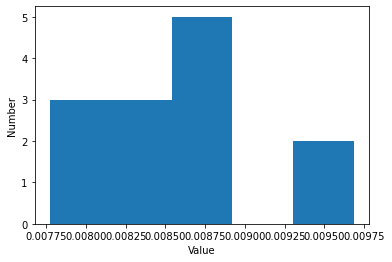

In [680]:
plt.hist(D1_beam_center_x, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');



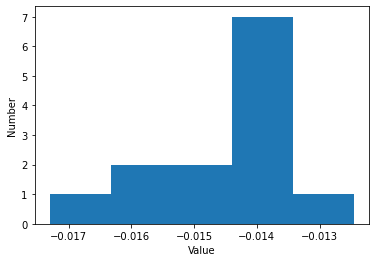

In [681]:
plt.hist(D1_beam_center_y, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');



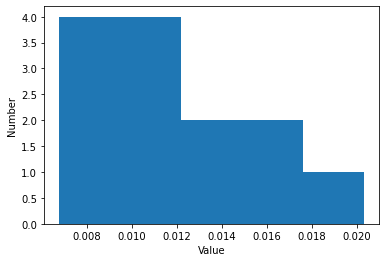

In [682]:
plt.hist(D5_beam_center_x, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');



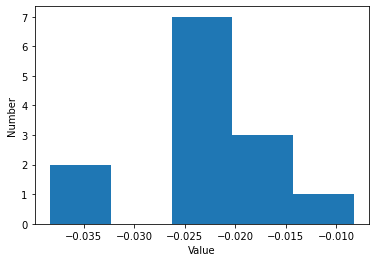

In [683]:
plt.hist(D5_beam_center_y, density=False, bins=5)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');



In [686]:
Day14RefitToOutlierChi2=[5.9688367558288005e+23
,3.279669931744054e+23
,2.005518492160753e+25
,7.005799168103051e+24
,6.547873824612331e+23
,1.7602871957297647e+25
,4.7563988093098533e+24
,9.610794986251711e+23
,5.888054065987534e+23
,2.8883030355055434e+24
,6.215565319749234e+23
,2.5426554352271914e+24
,2.1116895403943175e+24
,1.1491677092397157e+24
,7.976972787765108e+23
,2.1870495567536635e+24
,1.2013972282548681e+24
,2.6986098847248285e+24
,6.134784706370171e+23
,1.3359663748762858e+24
                        ]

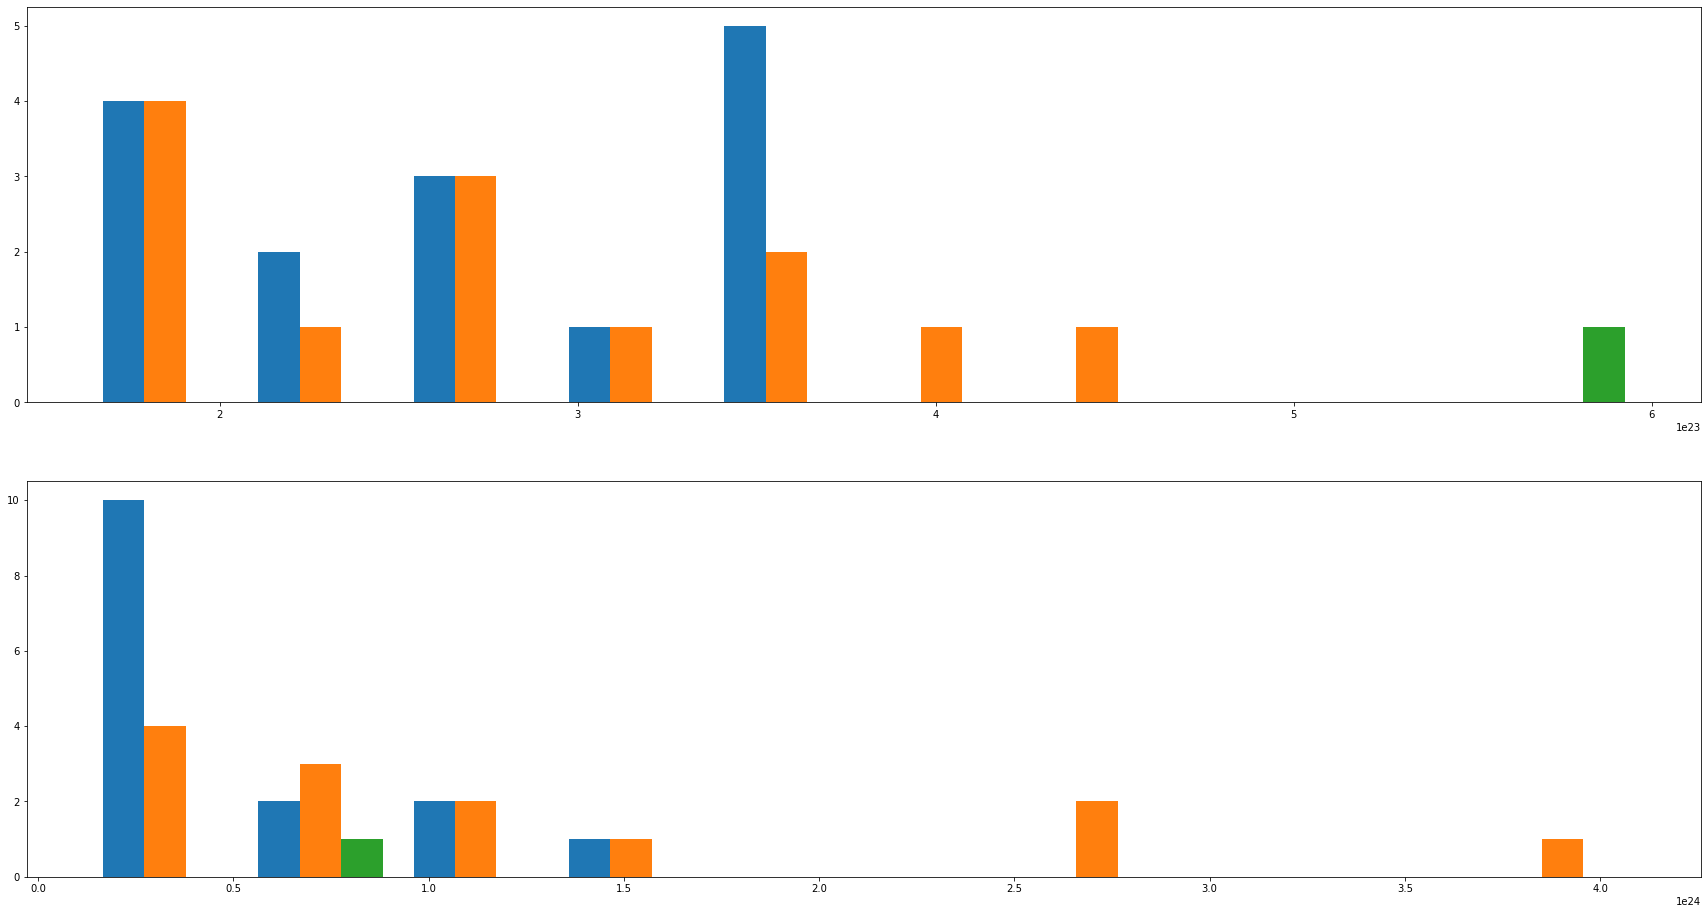

In [691]:
fig, axs = plt.subplots(2,1,figsize=(30,16))
count=0

for i in range(0,2):
    #for j in range(0,5):
       
        axs[i].hist([AllChannelGood15[count],AllChannelMean14Refitcs[count],Day14RefitToOutlierChi2[count]], density=False, bins=10)
        ax.set_title(f'Title {count}')
        count=count+10


#for ax in axs.flat:
#    ax.set(xlabel='x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [692]:
#14DayRefit Outlier 1-1 value: 5.9688367558288005e+23
#14DayRefit Outlier 5-5 value: 6.215565319749234e+23

#Previous Outlier 1-1 value: 9.197823224557641e+23
#Previous Outlier 5-5 value: 6.210249015703326e+23

In [700]:
(5.9688367558288005e+23-9.197823224557641e+23)/9.197823224557641e+23

-0.3510598529560384

In [701]:
(6.215565319749234e+23-6.210249015703326e+23)/6.210249015703326e+23

0.0008560532810303009

In [702]:
#Look at the Outlier day's D parameters and plot histogram

In [705]:
#'D1_beam_center_x': 0.012091876626665686, 'D1_beam_center_y': -0.02206753363033156
#'D5_beam_center_x': 0.013039558083674498, 'D5_beam_center_y': -0.02298513625006991

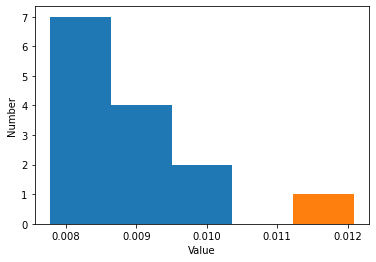

In [713]:
plt.hist([D1_beam_center_x,0.012091876626665686], density=False, bins=5,stacked=True)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');



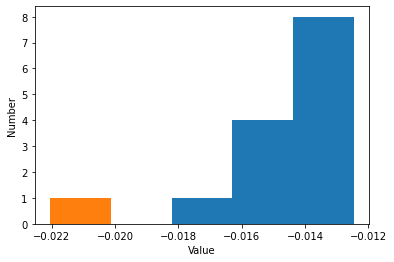

In [712]:
plt.hist([D1_beam_center_y,-0.02206753363033156], density=False, bins=5,stacked=True)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');



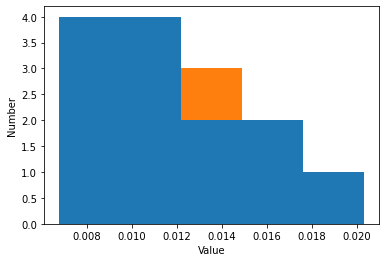

In [710]:
plt.hist([D5_beam_center_x,0.013039558083674498], density=False, bins=5, stacked=True)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');



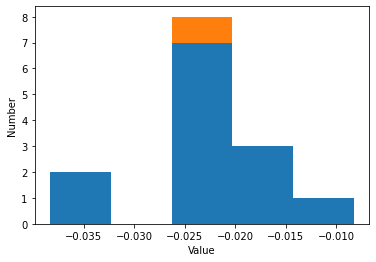

In [711]:
plt.hist([D5_beam_center_y,-0.02298513625006991], density=False, bins=5,stacked=True)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');



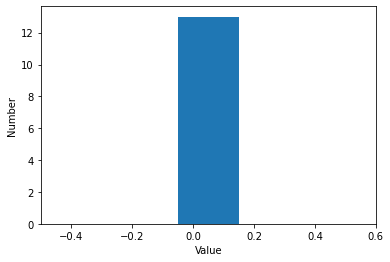

In [715]:
plt.hist([D5_beam_sigma_y], density=False, bins=5,stacked=True)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Value');

#0.05

In [703]:
#Check equations equivalency